In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

## Loading Data

In [2]:
df=pd.read_csv("Train.txt",sep=",",names=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
"wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
"dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]
)
df2=pd.read_csv("Test.txt",sep=",",names=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
"wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
"dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]
)

In [3]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [4]:
df.shape,df2.shape

((125973, 43), (22544, 43))

## Unique Value Analysis

In [5]:
def CountUnique(d):
    for (i,j) in d.iteritems():
        print(i," ",d[i].unique())
        if len(d[i].unique())==0 or len(d[i].unique())==1:
            d.drop([i],axis=1,inplace=True)
#print("Unique Values in Train Data ")

print("****************** Train Data ****************************")
CountUnique(df)
print("************* Test Data*********************************")
CountUnique(df2)

print("**********************************************")

****************** Train Data ****************************
duration   [    0  5607   507 ...  5430 11680   679]
protocol_type   ['tcp' 'udp' 'icmp']
service   ['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']
flag   ['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']
src_bytes   [  491   146     0 ...  2816 11466  2358]
dst_bytes   [    0  8153   420 ...  5424 17655 52866]
land   [0 1]
wrong_fragment   [0 3 1]
u

same_srv_rate   [1.   0.08 0.05 0.16 0.14 0.09 0.06 0.02 0.   0.17 0.1  0.01 0.03 0.28
 0.5  0.22 0.07 0.37 0.12 0.11 0.67 0.04 0.99 0.15 0.25 0.33 0.31 0.19
 0.27 0.97 0.43 0.18 0.24 0.4  0.13 0.46 0.23 0.42 0.44 0.21 0.2  0.35
 0.52 0.56 0.6  0.79 0.96 0.32 0.39 0.88 0.3  0.26 0.9  0.48 0.63 0.57
 0.75 0.36 0.98 0.51 0.87 0.93 0.62 0.45 0.73 0.34 0.92 0.8  0.83 0.89
 0.61 0.55 0.38 0.85 0.29 0.95 0.53 0.41 0.7  0.86 0.69 0.49 0.72 0.47
 0.74 0.64 0.77 0.65 0.58 0.54 0.59 0.71 0.78 0.91 0.94 0.82 0.81 0.66
 0.68 0.76 0.84]
diff_srv_rate   [0.   0.15 0.07 0.06 0.05 1.   0.08 0.5  0.1  0.67 0.02 0.31 0.01 0.11
 0.95 0.09 0.14 0.52 0.22 0.13 0.29 0.17 0.04 0.99 0.25 0.6  0.51 0.41
 0.33 0.54 0.38 0.75 0.03 0.27 0.21 0.42 0.63 0.44 0.16 0.43 0.2  0.96
 0.23 0.12 0.4  0.19 0.8  0.18 0.24 0.35 0.73 0.36 0.53 0.55 0.32 0.45
 0.76 0.37 0.3  0.83 0.39 0.97 0.98 0.28 0.26 0.57 0.56 0.77 0.59 0.78
 0.46 0.69 0.82 0.62 0.61 0.58 0.79 0.64 0.7  0.91 0.71 0.92 0.9  0.65
 0.86 0.47 0.88 0.87 0.85 0.

**********************************************


In [6]:
df.shape,df2.shape

((125973, 42), (22544, 42))

In [7]:
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_c

### From above we can say that there are no null values in the Given Data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

## Select only numerical columns

In [9]:
num_columns = df.select_dtypes(exclude = "object").columns
num_columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'last_flag'],
      dtype='object')

### Drop Duplicates 

In [10]:
df.drop_duplicates()
df2.drop_duplicates()
df.shape,df2.shape

((125973, 42), (22544, 42))

## Train Test Split

In [11]:
X_train=df.drop("attack",axis=1)
Y_train=df["attack"]
Y_train.columns=["attack"]
X_test=df2.drop("attack",axis=1)
Y_test=df2["attack"]
Y_test.columns=["attack"]

In [12]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((125973, 41), (22544, 41), (125973,), (22544,))

### Unique values in object columns

In [13]:
X_train['protocol_type'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [14]:
X_train['flag'].unique()

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

In [15]:
X_train['service'].unique()

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [16]:
X_train['service'].unique()

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [17]:
Y_train.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

## Encoding Target Variable

In [18]:
def encodeTarget(data):
    
    data=pd.DataFrame(data)
    data["attack"]=data["attack"].apply(lambda x:0 if x=="normal" else 1)
    return data
Y_train=encodeTarget(Y_train)
Y_test=encodeTarget(Y_test)


## Label Encoding target for vizualization purpose

In [19]:
attack_label={0:"Normal",1:"Attack"}
Y_train.replace(attack_label).head()


,attack
0,Normal
1,Normal
2,Attack
3,Normal
4,Normal


In [20]:
Y_train.head()

,attack
0,0
1,0
2,1
3,0
4,0


## Data Visualization

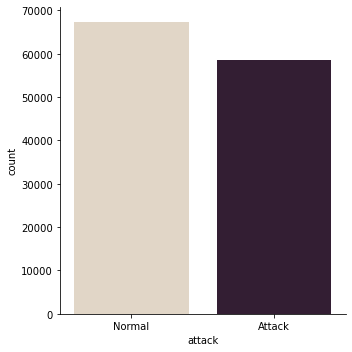

In [21]:
import seaborn as sns

sns.catplot(x="attack", kind="count", palette="ch:.25", data=Y_train.replace(attack_label))

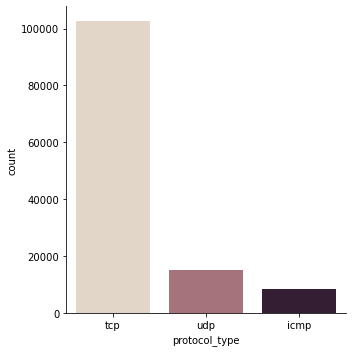

In [22]:
sns.catplot(x="protocol_type", kind="count", palette="ch:.25", data=X_train)

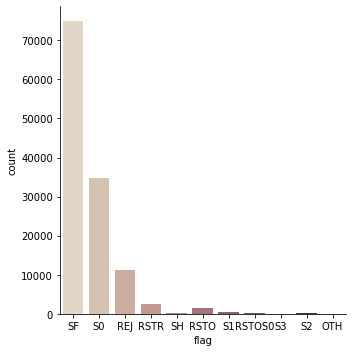

In [23]:
sns.catplot(x="flag", kind="count", palette="ch:.25", data=X_train)

<AxesSubplot:xlabel='protocol_type'>

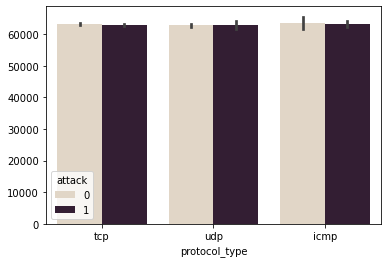

In [24]:
idx = pd.Index(range(1, 125974, 1))
sns.barplot(x="protocol_type", y=idx,hue=Y_train["attack"], palette="ch:.25", data=X_train)


<AxesSubplot:>

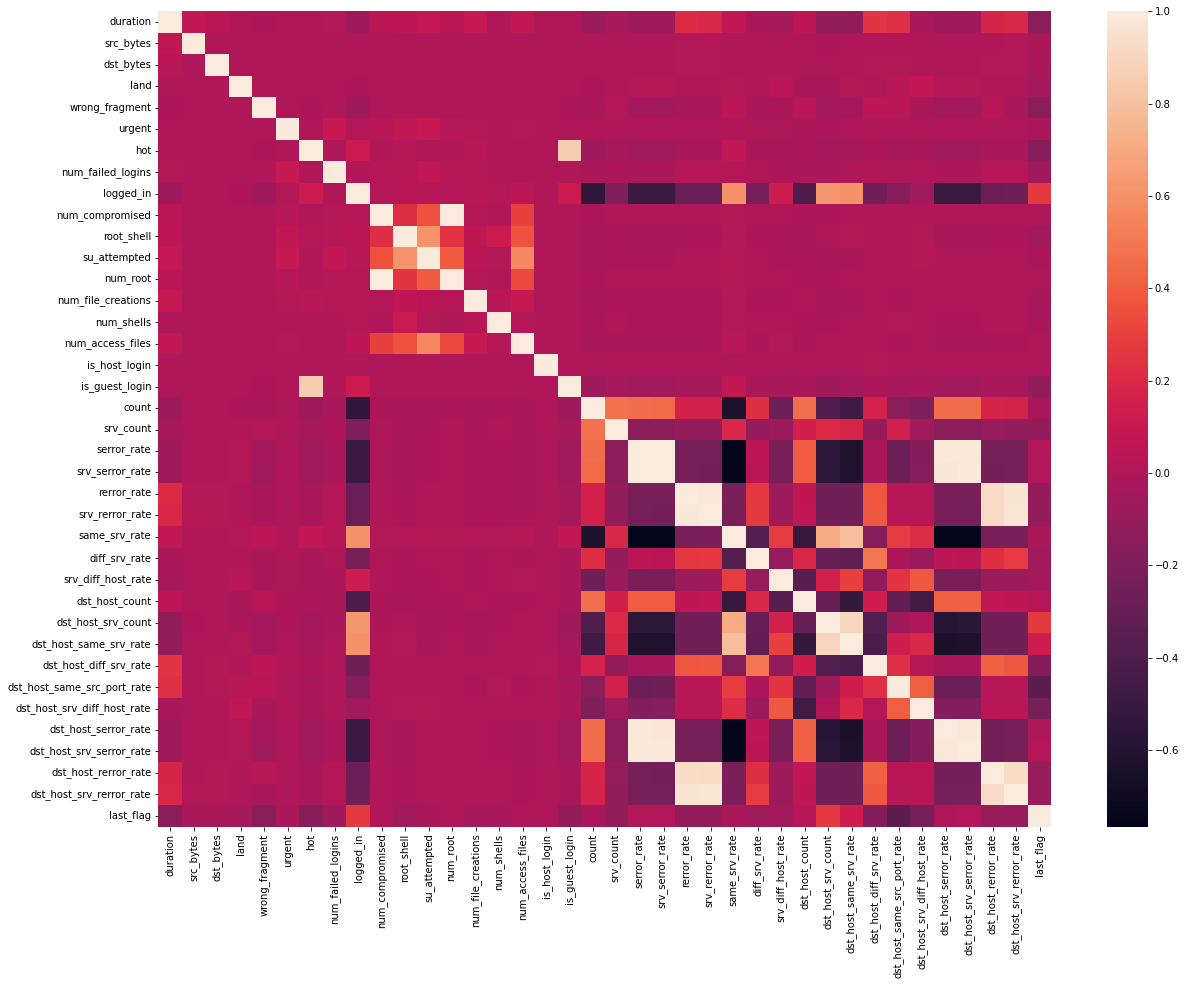

In [25]:
plt.figure(figsize=(20,15))
sns.heatmap(X_train.corr())

## Correlation Analysis

In [26]:
df["attack"]=encodeTarget(df["attack"])
#df=oneHotEncoding(df)
#df["attack"]=df["attack"].apply(lambda x:"normal" if x==0 else "attack")
corr = df.corr()
corr_target = abs(corr["attack"])
corr_target


duration                       0.048785
src_bytes                      0.005921
dst_bytes                      0.004118
land                           0.007191
wrong_fragment                 0.095905
urgent                         0.002787
hot                            0.013083
num_failed_logins              0.003755
logged_in                      0.690171
num_compromised                0.010198
root_shell                     0.020285
su_attempted                   0.022448
num_root                       0.011452
num_file_creations             0.021271
num_shells                     0.009472
num_access_files               0.036701
is_host_login                  0.002629
is_guest_login                 0.039279
count                          0.576444
srv_count                      0.000771
serror_rate                    0.650652
srv_serror_rate                0.648289
rerror_rate                    0.253397
srv_rerror_rate                0.253504
same_srv_rate                  0.751913


## Network Attack and Normal values count

In [27]:
network_Anamoly=Y_train.replace(attack_label)

count_values=dict(Counter(network_Anamoly['attack']))
print("Total Values : ",Y_train['attack'].count())
print("Normal Values : ",count_values['Normal'])
print("Network Attack Values : ",(network_Anamoly['attack'].count()-count_values['Normal']))
network_Anamoly.shape

Total Values :  125973
Normal Values :  67343
Network Attack Values :  58630


(125973, 1)

## Normalize data

In [28]:

def NormaliseData(data, training=True, rs=None, num_columns=5):
    if training == True:
       
        from sklearn.preprocessing import StandardScaler
        sc=StandardScaler()
        import joblib
        joblib.dump(sc,"scstd.sav")
        rs = sc.fit(data.loc[:,num_columns])
        
        data.loc[:,num_columns] = rs.transform(data.loc[:,num_columns])
    if training == False and rs !=None:
        data.loc[:,num_columns] = rs.transform(data.loc[:,num_columns])
    return data, rs
X_train_ns, rs=NormaliseData(X_train,num_columns = num_columns)
X_test_ns, rs =NormaliseData(X_test, training=False, rs=rs, num_columns = num_columns)
X_train_ns.shape,X_test_ns.shape


((125973, 41), (22544, 41))

## One hot Encoding on Non target Data

In [29]:
network_ohe_train=pd.get_dummies(X_train_ns,drop_first=True)
network_ohe_test=pd.get_dummies(X_test_ns,drop_first=True)
network_ohe_train.shape,network_ohe_test.shape

((125973, 119), (22544, 113))

In [30]:
network_ohe_train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,1,0,0,0,0,0
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0


In [31]:
network_ohe_test.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,1,0,0,0,0,0,0,0,0,0
1,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,1,0,0,0,0,0,0,0,0,0
2,-0.109481,-0.005551,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0
3,-0.110249,-0.007759,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0
4,-0.109865,-0.007762,-0.004915,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,1,0,0,0,0,0,0,0,0


## Feature Selection

In [32]:
def featureSelect(data,test):
    from sklearn.tree import DecisionTreeClassifier
    model_dt = DecisionTreeClassifier(criterion = 'gini',random_state=500)
    model_dt.fit(data,test)
    
    print(data.columns[model_dt.feature_importances_ >= 0.001].unique())
    return model_dt
    
X_train=featureSelect(network_ohe_train,Y_train)

X_test=network_ohe_test[network_ohe_train.columns[X_train.feature_importances_ >= 0.001]]

X_train=network_ohe_train[network_ohe_train.columns[X_train.feature_importances_ >= 0.001]]
X_train

Index(['src_bytes', 'dst_bytes', 'hot', 'logged_in', 'count', 'serror_rate',
       'dst_host_same_srv_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_srv_serror_rate', 'last_flag', 'protocol_type_tcp',
       'service_ecr_i', 'service_http', 'service_other', 'flag_S0', 'flag_S1'],
      dtype='object')


,src_bytes,dst_bytes,hot,logged_in,count,serror_rate,dst_host_same_srv_rate,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,last_flag,protocol_type_tcp,service_ecr_i,service_http,service_other,flag_S0,flag_S1
0,-0.007679,-0.004919,-0.095076,-0.809262,-0.717045,-0.637209,-0.782367,-0.289103,-0.624871,0.216426,1,0,0,0,0,0
1,-0.007737,-0.004919,-0.095076,-0.809262,-0.620982,-0.637209,-1.161030,-0.289103,-0.624871,-1.965556,0,0,0,1,0,0
2,-0.007762,-0.004919,-0.095076,-0.809262,0.339648,1.602664,-0.938287,-0.289103,1.618955,-0.219970,1,0,0,0,1,0
3,-0.007723,-0.002891,-0.095076,1.235694,-0.690846,-0.189235,1.066401,0.066252,-0.602433,0.652823,1,0,1,0,0,0
4,-0.007728,-0.004814,-0.095076,1.235694,-0.472521,-0.637209,1.066401,-0.289103,-0.624871,0.652823,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.007762,-0.004919,-0.095076,-0.809262,0.872361,1.602664,-0.938287,-0.289103,1.618955,0.216426,1,0,0,0,1,0
125969,-0.007744,-0.004883,-0.095076,-0.809262,-0.717045,-0.637209,0.977304,-0.289103,-0.624871,0.652823,0,0,0,0,0,0
125970,-0.007382,-0.004823,-0.095076,1.235694,-0.725778,-0.637209,-0.893738,-0.289103,-0.624871,-0.656367,1,0,0,0,0,0
125971,-0.007762,-0.004919,-0.095076,-0.809262,0.523041,1.602664,-1.094207,-0.289103,1.618955,0.216426,1,0,0,0,1,0


### From Columns like
'src_bytes', 'dst_bytes', 'hot', 'logged_in', 'count', 'serror_rate',
'dst_host_same_srv_rate', 'dst_host_srv_diff_host_rate',
'dst_host_srv_serror_rate', 'last_flag', 'protocol_type_tcp',
'service_ecr_i', 'service_http', 'service_other', 'flag_S0', 'flag_S1'
 ####      we can determine is our network under attack or not We can do Binomial Classification on it .

In [33]:
X_train.columns.nunique()

16

In [34]:
X_test.head()

,src_bytes,dst_bytes,hot,logged_in,count,serror_rate,dst_host_same_srv_rate,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,last_flag,protocol_type_tcp,service_ecr_i,service_http,service_other,flag_S0,flag_S1
0,-0.007762,-0.004919,-0.095076,-0.809262,1.265346,-0.637209,-1.071933,-0.289103,-0.624871,0.652823,1,0,0,0,0,0
1,-0.007762,-0.004919,-0.095076,-0.809262,0.453177,-0.637209,-1.161030,-0.289103,-0.624871,0.652823,1,0,0,0,0,0
2,-0.005551,-0.004919,-0.095076,-0.809262,-0.725778,-0.637209,0.197703,-0.111426,-0.624871,0.652823,1,0,0,0,0,0
3,-0.007759,-0.004919,-0.095076,-0.809262,-0.725778,-0.637209,1.066401,2.198385,-0.624871,-1.965556,0,0,0,0,0,0
4,-0.007762,-0.004915,-0.095076,-0.809262,-0.725778,-0.637209,-0.470526,-0.111426,-0.624871,-3.711143,1,0,0,0,0,0


## Evaluate all modes

In [35]:
def eval_model(Y_test,Y_predict):
    from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
    f1=f1_score(Y_test,Y_predict)
    prec=precision_score(Y_test,Y_predict)
    recall=recall_score(Y_test,Y_predict)
  # Calculate Confusion Matrix
  #cf_mat=confusion_matrix(Y_test,Y_predict)
        

  # Calculate Accuracy
    acc = accuracy_score(Y_test,Y_predict)
    return f1,prec,recall, acc


<class 'sklearn.linear_model._logistic.LogisticRegression'>


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 Score : 0.8682464454976303
Precision :  0.9214485654303709
Recall :  0.8208524896750565
Accuracy :  0.8581884315117104


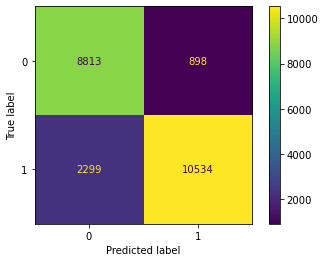

***************************

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
F1 Score : 0.832148128270495
Precision :  0.9765903842116314
Recall :  0.7249279202057196
Accuracy :  0.8335255500354861


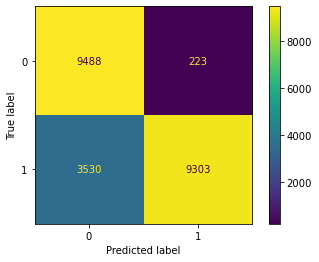

***************************

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


C:\Users\prana\AppData\Local\Temp/ipykernel_8688/174941555.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)


F1 Score : 0.8231433195468442
Precision :  0.9727977898204229
Recall :  0.7133951531208603
Accuracy :  0.8254968062455642


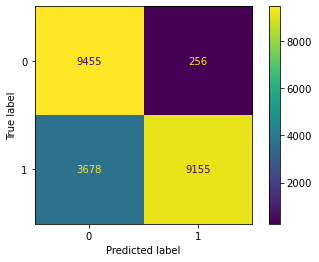

***************************

<class 'sklearn.svm._classes.SVC'>


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


F1 Score : 0.846829607723754
Precision :  0.9581734081291211
Recall :  0.7586690563391257
Accuracy :  0.8437721788502484


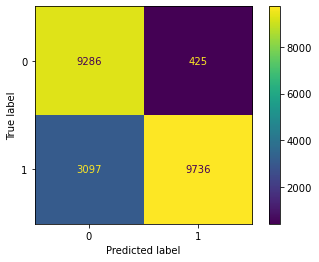

***************************

<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


F1 Score : 0.8170093795093795
Precision :  0.9696029112704698
Recall :  0.7059144393360867
Accuracy :  0.8199964513839603


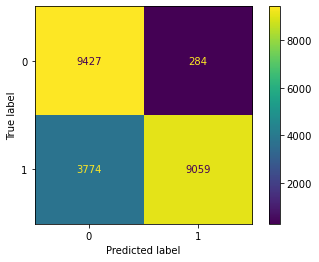

***************************

<class 'catboost.core.CatBoostClassifier'>
Learning rate set to 0.081237
0:	learn: 0.4676902	total: 157ms	remaining: 2m 36s
1:	learn: 0.3174573	total: 184ms	remaining: 1m 31s
2:	learn: 0.2202009	total: 209ms	remaining: 1m 9s
3:	learn: 0.1559924	total: 238ms	remaining: 59.3s
4:	learn: 0.1070619	total: 269ms	remaining: 53.6s
5:	learn: 0.0858038	total: 296ms	remaining: 49s
6:	learn: 0.0673476	total: 324ms	remaining: 46s
7:	learn: 0.0565468	total: 349ms	remaining: 43.3s
8:	learn: 0.0474888	total: 381ms	remaining: 42s
9:	learn: 0.0413741	total: 413ms	remaining: 40.9s
10:	learn: 0.0386473	total: 442ms	remaining: 39.8s
11:	learn: 0.0337689	total: 472ms	remaining: 38.9s
12:	learn: 0.0313023	total: 497ms	remaining: 37.8s
13:	learn: 0.0301192	total: 523ms	remaining: 36.9s
14:	learn: 0.0284859	total: 555ms	remaining: 36.4s
15:	learn: 0.0267028	total: 582ms	remaining: 35.8s
16:	learn: 0.0242135	total: 612ms	remaining: 35.4s
17:	learn: 0.0229263	total: 640ms	remaining: 

159:	learn: 0.0028679	total: 4.81s	remaining: 25.2s
160:	learn: 0.0028581	total: 4.85s	remaining: 25.3s
161:	learn: 0.0028519	total: 4.88s	remaining: 25.2s
162:	learn: 0.0028517	total: 4.9s	remaining: 25.2s
163:	learn: 0.0028410	total: 4.93s	remaining: 25.1s
164:	learn: 0.0028410	total: 4.95s	remaining: 25.1s
165:	learn: 0.0028287	total: 4.98s	remaining: 25s
166:	learn: 0.0028287	total: 5.01s	remaining: 25s
167:	learn: 0.0028146	total: 5.04s	remaining: 24.9s
168:	learn: 0.0028146	total: 5.06s	remaining: 24.9s
169:	learn: 0.0027959	total: 5.09s	remaining: 24.9s
170:	learn: 0.0027805	total: 5.12s	remaining: 24.8s
171:	learn: 0.0027674	total: 5.15s	remaining: 24.8s
172:	learn: 0.0027647	total: 5.17s	remaining: 24.7s
173:	learn: 0.0027626	total: 5.19s	remaining: 24.7s
174:	learn: 0.0027534	total: 5.23s	remaining: 24.6s
175:	learn: 0.0027364	total: 5.25s	remaining: 24.6s
176:	learn: 0.0027206	total: 5.28s	remaining: 24.6s
177:	learn: 0.0026917	total: 5.31s	remaining: 24.5s
178:	learn: 0.002

323:	learn: 0.0026398	total: 8.81s	remaining: 18.4s
324:	learn: 0.0026398	total: 8.83s	remaining: 18.3s
325:	learn: 0.0026398	total: 8.86s	remaining: 18.3s
326:	learn: 0.0026398	total: 8.88s	remaining: 18.3s
327:	learn: 0.0026398	total: 8.9s	remaining: 18.2s
328:	learn: 0.0026398	total: 8.92s	remaining: 18.2s
329:	learn: 0.0026398	total: 8.94s	remaining: 18.2s
330:	learn: 0.0026398	total: 8.96s	remaining: 18.1s
331:	learn: 0.0026398	total: 8.99s	remaining: 18.1s
332:	learn: 0.0026398	total: 9.01s	remaining: 18s
333:	learn: 0.0026398	total: 9.04s	remaining: 18s
334:	learn: 0.0026398	total: 9.07s	remaining: 18s
335:	learn: 0.0026398	total: 9.1s	remaining: 18s
336:	learn: 0.0026398	total: 9.12s	remaining: 17.9s
337:	learn: 0.0026398	total: 9.15s	remaining: 17.9s
338:	learn: 0.0026398	total: 9.17s	remaining: 17.9s
339:	learn: 0.0026398	total: 9.2s	remaining: 17.9s
340:	learn: 0.0026398	total: 9.22s	remaining: 17.8s
341:	learn: 0.0026398	total: 9.24s	remaining: 17.8s
342:	learn: 0.0026398	t

487:	learn: 0.0026398	total: 12.6s	remaining: 13.2s
488:	learn: 0.0026398	total: 12.6s	remaining: 13.2s
489:	learn: 0.0026398	total: 12.6s	remaining: 13.2s
490:	learn: 0.0026398	total: 12.7s	remaining: 13.1s
491:	learn: 0.0026398	total: 12.7s	remaining: 13.1s
492:	learn: 0.0026398	total: 12.7s	remaining: 13.1s
493:	learn: 0.0026398	total: 12.7s	remaining: 13s
494:	learn: 0.0026398	total: 12.8s	remaining: 13s
495:	learn: 0.0026398	total: 12.8s	remaining: 13s
496:	learn: 0.0026398	total: 12.8s	remaining: 13s
497:	learn: 0.0026398	total: 12.8s	remaining: 12.9s
498:	learn: 0.0026398	total: 12.8s	remaining: 12.9s
499:	learn: 0.0026398	total: 12.9s	remaining: 12.9s
500:	learn: 0.0026398	total: 12.9s	remaining: 12.8s
501:	learn: 0.0026398	total: 12.9s	remaining: 12.8s
502:	learn: 0.0026398	total: 12.9s	remaining: 12.8s
503:	learn: 0.0026398	total: 13s	remaining: 12.8s
504:	learn: 0.0026398	total: 13s	remaining: 12.7s
505:	learn: 0.0026398	total: 13s	remaining: 12.7s
506:	learn: 0.0026398	tota

648:	learn: 0.0026398	total: 16.4s	remaining: 8.86s
649:	learn: 0.0026398	total: 16.4s	remaining: 8.84s
650:	learn: 0.0026398	total: 16.4s	remaining: 8.81s
651:	learn: 0.0026398	total: 16.5s	remaining: 8.79s
652:	learn: 0.0026398	total: 16.5s	remaining: 8.76s
653:	learn: 0.0026398	total: 16.5s	remaining: 8.74s
654:	learn: 0.0026398	total: 16.5s	remaining: 8.71s
655:	learn: 0.0026398	total: 16.6s	remaining: 8.69s
656:	learn: 0.0026398	total: 16.6s	remaining: 8.66s
657:	learn: 0.0026398	total: 16.6s	remaining: 8.64s
658:	learn: 0.0026398	total: 16.6s	remaining: 8.61s
659:	learn: 0.0026398	total: 16.7s	remaining: 8.59s
660:	learn: 0.0026398	total: 16.7s	remaining: 8.56s
661:	learn: 0.0026398	total: 16.7s	remaining: 8.54s
662:	learn: 0.0026398	total: 16.7s	remaining: 8.51s
663:	learn: 0.0026398	total: 16.8s	remaining: 8.48s
664:	learn: 0.0026398	total: 16.8s	remaining: 8.46s
665:	learn: 0.0026398	total: 16.8s	remaining: 8.43s
666:	learn: 0.0026398	total: 16.8s	remaining: 8.41s
667:	learn: 

812:	learn: 0.0026398	total: 20.2s	remaining: 4.65s
813:	learn: 0.0026398	total: 20.3s	remaining: 4.63s
814:	learn: 0.0026398	total: 20.3s	remaining: 4.6s
815:	learn: 0.0026398	total: 20.3s	remaining: 4.58s
816:	learn: 0.0026398	total: 20.3s	remaining: 4.55s
817:	learn: 0.0026398	total: 20.3s	remaining: 4.53s
818:	learn: 0.0026398	total: 20.4s	remaining: 4.5s
819:	learn: 0.0026398	total: 20.4s	remaining: 4.47s
820:	learn: 0.0026398	total: 20.4s	remaining: 4.45s
821:	learn: 0.0026398	total: 20.4s	remaining: 4.42s
822:	learn: 0.0026398	total: 20.5s	remaining: 4.4s
823:	learn: 0.0026398	total: 20.5s	remaining: 4.37s
824:	learn: 0.0026398	total: 20.5s	remaining: 4.35s
825:	learn: 0.0026398	total: 20.5s	remaining: 4.32s
826:	learn: 0.0026398	total: 20.6s	remaining: 4.3s
827:	learn: 0.0026398	total: 20.6s	remaining: 4.27s
828:	learn: 0.0026398	total: 20.6s	remaining: 4.25s
829:	learn: 0.0026398	total: 20.6s	remaining: 4.22s
830:	learn: 0.0026398	total: 20.6s	remaining: 4.2s
831:	learn: 0.002

972:	learn: 0.0026398	total: 24s	remaining: 666ms
973:	learn: 0.0026398	total: 24s	remaining: 642ms
974:	learn: 0.0026398	total: 24.1s	remaining: 617ms
975:	learn: 0.0026398	total: 24.1s	remaining: 592ms
976:	learn: 0.0026398	total: 24.1s	remaining: 567ms
977:	learn: 0.0026398	total: 24.1s	remaining: 543ms
978:	learn: 0.0026398	total: 24.1s	remaining: 518ms
979:	learn: 0.0026398	total: 24.2s	remaining: 493ms
980:	learn: 0.0026398	total: 24.2s	remaining: 469ms
981:	learn: 0.0026398	total: 24.2s	remaining: 444ms
982:	learn: 0.0026398	total: 24.2s	remaining: 419ms
983:	learn: 0.0026398	total: 24.3s	remaining: 394ms
984:	learn: 0.0026398	total: 24.3s	remaining: 370ms
985:	learn: 0.0026398	total: 24.3s	remaining: 345ms
986:	learn: 0.0026398	total: 24.3s	remaining: 320ms
987:	learn: 0.0026398	total: 24.3s	remaining: 296ms
988:	learn: 0.0026398	total: 24.4s	remaining: 271ms
989:	learn: 0.0026398	total: 24.4s	remaining: 246ms
990:	learn: 0.0026398	total: 24.4s	remaining: 222ms
991:	learn: 0.00

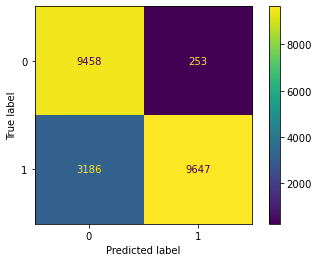

***************************

<class 'xgboost.sklearn.XGBClassifier'>
[09:02:27] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


F1 Score : 0.8294386247649744
Precision :  0.9746449237243556
Recall :  0.7218888802306553
Accuracy :  0.8309971611071683


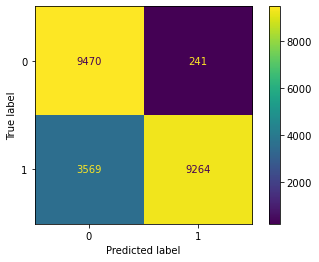

***************************

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


F1 Score : 0.8456299160697807
Precision :  0.9695687222893994
Recall :  0.749785708719707
Accuracy :  0.8441713981547196


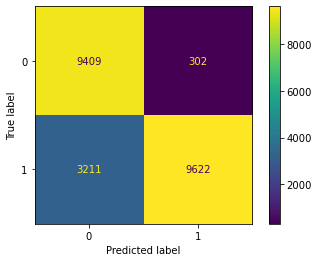

***************************



In [36]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from xgboost import XGBClassifier
import joblib
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

## Creating Model List
model_list = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),
              AdaBoostClassifier(),CatBoostClassifier(),XGBClassifier(),GradientBoostingClassifier()]


for model in model_list:
    print(model.__class__)
  # train the model
    model.fit(X_train,Y_train)
    Y_pred_train=model.predict(X_train)
    
  # test the model on X_test
    Y_predict = model.predict(X_test)
    
    ## Saving model
    model_name = type(model).__name__
    model_save=model_name+"StdSc.sav"
    joblib.dump(model,model_save)
    
    ## Evaluating Model
    f1,prec,recall, acc = eval_model(Y_test,Y_predict)
    
    #Print Results
    print("F1 Score :",f1)
    print("Precision : ",prec)
    print("Recall : ",recall)
    print("Accuracy : ",acc)
    
    plot_confusion_matrix(model, X_test, Y_test)  
    plt.show()
    print("***************************")
    print()

## Applying ANN(Artificial Neural Network)

In [37]:
n_features = X_train.shape[1]
n_features

16

In [38]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping
model1 = Sequential()
model1.add(Dense(64, activation='relu', input_shape=(n_features,)))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
##increased acc after this
model1.add(Dense(64, activation='relu'))
model1.add(Dense(10, activation='relu'))

#model1.add(Dense(64, activation='relu'))
#model1.add(Dense(10, activation='relu'))



# model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [39]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1088      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 10)                6

## Compiling ANN model 

In [40]:

# compile the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # mse mae

In [41]:
es = EarlyStopping(monitor='loss', mode='min',patience=5, verbose=1)

In [42]:
# fit the model (traning)
history = model1.fit( X_train, Y_train, epochs=200,validation_split=0.3, batch_size=128, verbose=2,callbacks=[es],shuffle=False)


Epoch 1/200
689/689 - 4s - loss: 0.0740 - accuracy: 0.9788 - val_loss: 0.0302 - val_accuracy: 0.9890 - 4s/epoch - 5ms/step
Epoch 2/200
689/689 - 2s - loss: 0.0297 - accuracy: 0.9886 - val_loss: 0.0256 - val_accuracy: 0.9905 - 2s/epoch - 3ms/step
Epoch 3/200
689/689 - 2s - loss: 0.0264 - accuracy: 0.9896 - val_loss: 0.0236 - val_accuracy: 0.9911 - 2s/epoch - 3ms/step
Epoch 4/200
689/689 - 2s - loss: 0.0247 - accuracy: 0.9902 - val_loss: 0.0228 - val_accuracy: 0.9915 - 2s/epoch - 3ms/step
Epoch 5/200
689/689 - 2s - loss: 0.0236 - accuracy: 0.9907 - val_loss: 0.0222 - val_accuracy: 0.9920 - 2s/epoch - 3ms/step
Epoch 6/200
689/689 - 2s - loss: 0.0239 - accuracy: 0.9906 - val_loss: 0.0221 - val_accuracy: 0.9923 - 2s/epoch - 3ms/step
Epoch 7/200
689/689 - 2s - loss: 0.0214 - accuracy: 0.9913 - val_loss: 0.0215 - val_accuracy: 0.9922 - 2s/epoch - 3ms/step
Epoch 8/200
689/689 - 2s - loss: 0.0207 - accuracy: 0.9916 - val_loss: 0.0208 - val_accuracy: 0.9925 - 2s/epoch - 3ms/step
Epoch 9/200
689/

## Evaluate Model

In [43]:
# evaluate the model
loss, acc = model1.evaluate(X_test, Y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.864


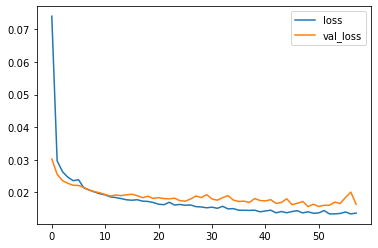

In [44]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["loss","val_loss"])

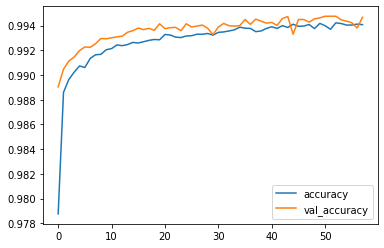

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["accuracy","val_accuracy"])

In [46]:
from sklearn.metrics import classification_report
y_predicted = model1.predict(X_test)
y_predicted = np.round(y_predicted)   
print("Classification Report: \n", classification_report(y_predicted,Y_test))

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.96      0.78      0.86     11974
         1.0       0.79      0.96      0.87     10570

    accuracy                           0.86     22544
   macro avg       0.88      0.87      0.86     22544
weighted avg       0.88      0.86      0.86     22544



In [47]:
model1.save("ANN.h5")

## Adaboost FineTuning

Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.1, n_estimators=100; total time=  42.6s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.1, n_estimators=100; total time= 1.2min


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.1, n_estimators=100; total time=  33.7s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.1, n_estimators=150; total time= 1.4min


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.1, n_estimators=150; total time= 2.4min


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.1, n_estimators=150; total time=  55.1s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.1, n_estimators=200; total time= 1.8min


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.1, n_estimators=200; total time= 2.5min


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.1, n_estimators=200; total time= 1.1min


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.09, n_estimators=100; total time=  17.3s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.09, n_estimators=100; total time=  46.5s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.09, n_estimators=100; total time=  23.2s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.09, n_estimators=150; total time=  26.1s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.09, n_estimators=150; total time= 1.5min


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.09, n_estimators=150; total time=  34.5s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.09, n_estimators=200; total time=  37.8s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.09, n_estimators=200; total time= 2.0min


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.09, n_estimators=200; total time=  48.1s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.9, n_estimators=100; total time=  12.8s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.9, n_estimators=100; total time=  28.8s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.9, n_estimators=100; total time=  20.8s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.9, n_estimators=150; total time=  20.1s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.9, n_estimators=150; total time=  47.9s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.9, n_estimators=150; total time=  37.2s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.9, n_estimators=200; total time=  27.8s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.9, n_estimators=200; total time=  59.8s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.9, n_estimators=200; total time=  46.1s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.01, n_estimators=100; total time=  35.3s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.01, n_estimators=100; total time=  37.6s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.01, n_estimators=100; total time=  35.5s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.01, n_estimators=150; total time=  53.5s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.01, n_estimators=150; total time=  55.2s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.01, n_estimators=150; total time=  52.6s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.01, n_estimators=200; total time= 1.1min


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.01, n_estimators=200; total time= 1.2min


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.01, n_estimators=200; total time= 1.2min


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


{'base_estimator': DecisionTreeClassifier(), 'learning_rate': 0.01, 'n_estimators': 100}
[0.99877752 0.99849174 0.99853937 0.99872195 0.99865844 0.99861081
 0.99881721 0.99884896 0.9988569  0.99897597 0.99882515 0.99878545]
0.9987424553938807
F1 Score : 0.8350436925834641
Precision :  0.9825986078886311
Recall :  0.7260188576326658
Accuracy :  0.8367193044712562


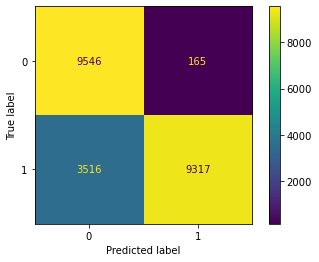

['Adboost_SC2.sav']

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid = { 
    'n_estimators': [100,150,200],
    'base_estimator' : [DecisionTreeClassifier()],
    'learning_rate':[0.1,0.09,0.9,0.01],
    }

ada = AdaBoostClassifier(random_state=500)

CV_abc = GridSearchCV(estimator=ada, param_grid=param_grid,\
                      
                       cv=3,verbose=2)

CV_abc.fit(X_train, Y_train)

print(CV_abc.best_params_)
print(CV_abc.cv_results_['mean_test_score'])
print(sum(CV_abc.cv_results_['mean_test_score'])/ len(CV_abc.cv_results_['mean_test_score']))


Y_predict = CV_abc.predict(X_test)
    

f1,prec,recall, acc = eval_model(Y_test,Y_predict)
print("F1 Score :",f1)
print("Precision : ",prec)
print("Recall : ",recall)
print("Accuracy : ",acc)

plot_confusion_matrix(CV_abc, X_test, Y_test)  
plt.show()
joblib.dump(CV_abc,"Adboost_SC2.sav")

## Finetunning Catboost

Fitting 3 folds for each of 7 candidates, totalling 21 fits
0:	learn: 0.4540195	total: 31.3ms	remaining: 46.9s
1:	learn: 0.3031761	total: 58.3ms	remaining: 43.6s
2:	learn: 0.1788321	total: 89.1ms	remaining: 44.5s
3:	learn: 0.1145954	total: 119ms	remaining: 44.3s
4:	learn: 0.0782821	total: 153ms	remaining: 45.8s
5:	learn: 0.0571862	total: 185ms	remaining: 46s
6:	learn: 0.0461998	total: 218ms	remaining: 46.5s
7:	learn: 0.0403611	total: 244ms	remaining: 45.6s
8:	learn: 0.0333309	total: 274ms	remaining: 45.4s
9:	learn: 0.0301824	total: 306ms	remaining: 45.6s
10:	learn: 0.0270644	total: 337ms	remaining: 45.6s
11:	learn: 0.0232598	total: 367ms	remaining: 45.5s
12:	learn: 0.0216041	total: 394ms	remaining: 45.1s
13:	learn: 0.0199219	total: 426ms	remaining: 45.2s
14:	learn: 0.0181446	total: 453ms	remaining: 44.9s
15:	learn: 0.0163187	total: 478ms	remaining: 44.3s
16:	learn: 0.0152092	total: 505ms	remaining: 44s
17:	learn: 0.0138260	total: 533ms	remaining: 43.8s
18:	learn: 0.0129556	total: 561ms

169:	learn: 0.0022610	total: 4.12s	remaining: 32.3s
170:	learn: 0.0022611	total: 4.14s	remaining: 32.2s
171:	learn: 0.0022610	total: 4.16s	remaining: 32.1s
172:	learn: 0.0022611	total: 4.18s	remaining: 32.1s
173:	learn: 0.0022611	total: 4.2s	remaining: 32s
174:	learn: 0.0022611	total: 4.22s	remaining: 32s
175:	learn: 0.0022608	total: 4.24s	remaining: 31.9s
176:	learn: 0.0022607	total: 4.26s	remaining: 31.9s
177:	learn: 0.0022608	total: 4.28s	remaining: 31.8s
178:	learn: 0.0022607	total: 4.3s	remaining: 31.8s
179:	learn: 0.0022609	total: 4.33s	remaining: 31.7s
180:	learn: 0.0022607	total: 4.35s	remaining: 31.7s
181:	learn: 0.0022606	total: 4.36s	remaining: 31.6s
182:	learn: 0.0022606	total: 4.38s	remaining: 31.5s
183:	learn: 0.0022608	total: 4.4s	remaining: 31.5s
184:	learn: 0.0022605	total: 4.42s	remaining: 31.4s
185:	learn: 0.0022479	total: 4.44s	remaining: 31.4s
186:	learn: 0.0022306	total: 4.47s	remaining: 31.4s
187:	learn: 0.0022057	total: 4.49s	remaining: 31.4s
188:	learn: 0.00217

334:	learn: 0.0021052	total: 7.31s	remaining: 25.4s
335:	learn: 0.0021052	total: 7.33s	remaining: 25.4s
336:	learn: 0.0021052	total: 7.35s	remaining: 25.4s
337:	learn: 0.0021052	total: 7.37s	remaining: 25.3s
338:	learn: 0.0021052	total: 7.39s	remaining: 25.3s
339:	learn: 0.0021052	total: 7.41s	remaining: 25.3s
340:	learn: 0.0021052	total: 7.43s	remaining: 25.2s
341:	learn: 0.0021052	total: 7.45s	remaining: 25.2s
342:	learn: 0.0021052	total: 7.46s	remaining: 25.2s
343:	learn: 0.0021052	total: 7.49s	remaining: 25.2s
344:	learn: 0.0021052	total: 7.51s	remaining: 25.1s
345:	learn: 0.0021052	total: 7.53s	remaining: 25.1s
346:	learn: 0.0021052	total: 7.54s	remaining: 25.1s
347:	learn: 0.0021052	total: 7.57s	remaining: 25s
348:	learn: 0.0021052	total: 7.58s	remaining: 25s
349:	learn: 0.0021052	total: 7.6s	remaining: 25s
350:	learn: 0.0021052	total: 7.62s	remaining: 25s
351:	learn: 0.0021052	total: 7.64s	remaining: 24.9s
352:	learn: 0.0021052	total: 7.66s	remaining: 24.9s
353:	learn: 0.0021052

503:	learn: 0.0021052	total: 10.4s	remaining: 20.6s
504:	learn: 0.0021052	total: 10.5s	remaining: 20.6s
505:	learn: 0.0021052	total: 10.5s	remaining: 20.6s
506:	learn: 0.0021052	total: 10.5s	remaining: 20.5s
507:	learn: 0.0021052	total: 10.5s	remaining: 20.5s
508:	learn: 0.0021052	total: 10.5s	remaining: 20.5s
509:	learn: 0.0021052	total: 10.5s	remaining: 20.5s
510:	learn: 0.0021052	total: 10.6s	remaining: 20.4s
511:	learn: 0.0021052	total: 10.6s	remaining: 20.4s
512:	learn: 0.0021052	total: 10.6s	remaining: 20.4s
513:	learn: 0.0021052	total: 10.6s	remaining: 20.4s
514:	learn: 0.0021052	total: 10.6s	remaining: 20.3s
515:	learn: 0.0021052	total: 10.7s	remaining: 20.3s
516:	learn: 0.0021052	total: 10.7s	remaining: 20.3s
517:	learn: 0.0021052	total: 10.7s	remaining: 20.3s
518:	learn: 0.0021052	total: 10.7s	remaining: 20.2s
519:	learn: 0.0021052	total: 10.7s	remaining: 20.2s
520:	learn: 0.0021052	total: 10.7s	remaining: 20.2s
521:	learn: 0.0021052	total: 10.8s	remaining: 20.2s
522:	learn: 

670:	learn: 0.0021052	total: 13.5s	remaining: 16.7s
671:	learn: 0.0021052	total: 13.6s	remaining: 16.7s
672:	learn: 0.0021052	total: 13.6s	remaining: 16.7s
673:	learn: 0.0021052	total: 13.6s	remaining: 16.7s
674:	learn: 0.0021052	total: 13.6s	remaining: 16.6s
675:	learn: 0.0021052	total: 13.6s	remaining: 16.6s
676:	learn: 0.0021052	total: 13.6s	remaining: 16.6s
677:	learn: 0.0021052	total: 13.7s	remaining: 16.6s
678:	learn: 0.0021052	total: 13.7s	remaining: 16.5s
679:	learn: 0.0021052	total: 13.7s	remaining: 16.5s
680:	learn: 0.0021052	total: 13.7s	remaining: 16.5s
681:	learn: 0.0021052	total: 13.7s	remaining: 16.5s
682:	learn: 0.0021052	total: 13.7s	remaining: 16.4s
683:	learn: 0.0021052	total: 13.8s	remaining: 16.4s
684:	learn: 0.0021052	total: 13.8s	remaining: 16.4s
685:	learn: 0.0021052	total: 13.8s	remaining: 16.4s
686:	learn: 0.0021052	total: 13.8s	remaining: 16.3s
687:	learn: 0.0021052	total: 13.8s	remaining: 16.3s
688:	learn: 0.0021052	total: 13.8s	remaining: 16.3s
689:	learn: 

830:	learn: 0.0021052	total: 16.4s	remaining: 13.2s
831:	learn: 0.0021052	total: 16.4s	remaining: 13.2s
832:	learn: 0.0021052	total: 16.4s	remaining: 13.1s
833:	learn: 0.0021052	total: 16.4s	remaining: 13.1s
834:	learn: 0.0021052	total: 16.4s	remaining: 13.1s
835:	learn: 0.0021052	total: 16.5s	remaining: 13.1s
836:	learn: 0.0021052	total: 16.5s	remaining: 13.1s
837:	learn: 0.0021052	total: 16.5s	remaining: 13s
838:	learn: 0.0021052	total: 16.5s	remaining: 13s
839:	learn: 0.0021052	total: 16.5s	remaining: 13s
840:	learn: 0.0021052	total: 16.5s	remaining: 13s
841:	learn: 0.0021052	total: 16.6s	remaining: 12.9s
842:	learn: 0.0021052	total: 16.6s	remaining: 12.9s
843:	learn: 0.0021052	total: 16.6s	remaining: 12.9s
844:	learn: 0.0021052	total: 16.6s	remaining: 12.9s
845:	learn: 0.0021052	total: 16.6s	remaining: 12.9s
846:	learn: 0.0021052	total: 16.6s	remaining: 12.8s
847:	learn: 0.0021052	total: 16.7s	remaining: 12.8s
848:	learn: 0.0021052	total: 16.7s	remaining: 12.8s
849:	learn: 0.002105

997:	learn: 0.0021052	total: 19.4s	remaining: 9.73s
998:	learn: 0.0021052	total: 19.4s	remaining: 9.71s
999:	learn: 0.0021052	total: 19.4s	remaining: 9.69s
1000:	learn: 0.0021052	total: 19.4s	remaining: 9.67s
1001:	learn: 0.0021052	total: 19.4s	remaining: 9.65s
1002:	learn: 0.0021052	total: 19.4s	remaining: 9.63s
1003:	learn: 0.0021052	total: 19.5s	remaining: 9.61s
1004:	learn: 0.0021052	total: 19.5s	remaining: 9.59s
1005:	learn: 0.0021052	total: 19.5s	remaining: 9.57s
1006:	learn: 0.0021052	total: 19.5s	remaining: 9.55s
1007:	learn: 0.0021052	total: 19.5s	remaining: 9.53s
1008:	learn: 0.0021052	total: 19.5s	remaining: 9.51s
1009:	learn: 0.0021052	total: 19.6s	remaining: 9.49s
1010:	learn: 0.0021052	total: 19.6s	remaining: 9.47s
1011:	learn: 0.0021052	total: 19.6s	remaining: 9.45s
1012:	learn: 0.0021052	total: 19.6s	remaining: 9.43s
1013:	learn: 0.0021052	total: 19.6s	remaining: 9.41s
1014:	learn: 0.0021052	total: 19.6s	remaining: 9.39s
1015:	learn: 0.0021052	total: 19.7s	remaining: 9.

1155:	learn: 0.0021052	total: 22.2s	remaining: 6.6s
1156:	learn: 0.0021052	total: 22.2s	remaining: 6.58s
1157:	learn: 0.0021052	total: 22.2s	remaining: 6.56s
1158:	learn: 0.0021052	total: 22.2s	remaining: 6.54s
1159:	learn: 0.0021052	total: 22.2s	remaining: 6.52s
1160:	learn: 0.0021052	total: 22.3s	remaining: 6.5s
1161:	learn: 0.0021052	total: 22.3s	remaining: 6.48s
1162:	learn: 0.0021052	total: 22.3s	remaining: 6.46s
1163:	learn: 0.0021052	total: 22.3s	remaining: 6.44s
1164:	learn: 0.0021052	total: 22.3s	remaining: 6.42s
1165:	learn: 0.0021052	total: 22.4s	remaining: 6.4s
1166:	learn: 0.0021052	total: 22.4s	remaining: 6.38s
1167:	learn: 0.0021052	total: 22.4s	remaining: 6.36s
1168:	learn: 0.0021052	total: 22.4s	remaining: 6.34s
1169:	learn: 0.0021052	total: 22.4s	remaining: 6.32s
1170:	learn: 0.0021052	total: 22.4s	remaining: 6.3s
1171:	learn: 0.0021052	total: 22.5s	remaining: 6.28s
1172:	learn: 0.0021052	total: 22.5s	remaining: 6.26s
1173:	learn: 0.0021052	total: 22.5s	remaining: 6.2

1315:	learn: 0.0021052	total: 25s	remaining: 3.5s
1316:	learn: 0.0021052	total: 25s	remaining: 3.48s
1317:	learn: 0.0021052	total: 25.1s	remaining: 3.46s
1318:	learn: 0.0021052	total: 25.1s	remaining: 3.44s
1319:	learn: 0.0021052	total: 25.1s	remaining: 3.42s
1320:	learn: 0.0021052	total: 25.1s	remaining: 3.4s
1321:	learn: 0.0021052	total: 25.1s	remaining: 3.38s
1322:	learn: 0.0021052	total: 25.1s	remaining: 3.36s
1323:	learn: 0.0021052	total: 25.2s	remaining: 3.35s
1324:	learn: 0.0021052	total: 25.2s	remaining: 3.33s
1325:	learn: 0.0021052	total: 25.2s	remaining: 3.31s
1326:	learn: 0.0021052	total: 25.2s	remaining: 3.29s
1327:	learn: 0.0021052	total: 25.2s	remaining: 3.27s
1328:	learn: 0.0021052	total: 25.2s	remaining: 3.25s
1329:	learn: 0.0021052	total: 25.3s	remaining: 3.23s
1330:	learn: 0.0021052	total: 25.3s	remaining: 3.21s
1331:	learn: 0.0021052	total: 25.3s	remaining: 3.19s
1332:	learn: 0.0021052	total: 25.3s	remaining: 3.17s
1333:	learn: 0.0021052	total: 25.3s	remaining: 3.15s

1476:	learn: 0.0021052	total: 27.9s	remaining: 434ms
1477:	learn: 0.0021052	total: 27.9s	remaining: 415ms
1478:	learn: 0.0021052	total: 27.9s	remaining: 397ms
1479:	learn: 0.0021052	total: 27.9s	remaining: 378ms
1480:	learn: 0.0021052	total: 28s	remaining: 359ms
1481:	learn: 0.0021052	total: 28s	remaining: 340ms
1482:	learn: 0.0021052	total: 28s	remaining: 321ms
1483:	learn: 0.0021052	total: 28s	remaining: 302ms
1484:	learn: 0.0021052	total: 28s	remaining: 283ms
1485:	learn: 0.0021052	total: 28.1s	remaining: 264ms
1486:	learn: 0.0021052	total: 28.1s	remaining: 245ms
1487:	learn: 0.0021052	total: 28.1s	remaining: 227ms
1488:	learn: 0.0021052	total: 28.1s	remaining: 208ms
1489:	learn: 0.0021052	total: 28.1s	remaining: 189ms
1490:	learn: 0.0021052	total: 28.1s	remaining: 170ms
1491:	learn: 0.0021052	total: 28.2s	remaining: 151ms
1492:	learn: 0.0021052	total: 28.2s	remaining: 132ms
1493:	learn: 0.0021052	total: 28.2s	remaining: 113ms
1494:	learn: 0.0021052	total: 28.2s	remaining: 94.4ms
14

140:	learn: 0.0019756	total: 3.33s	remaining: 32.1s
141:	learn: 0.0019756	total: 3.35s	remaining: 32s
142:	learn: 0.0019755	total: 3.37s	remaining: 31.9s
143:	learn: 0.0019755	total: 3.39s	remaining: 31.9s
144:	learn: 0.0019755	total: 3.4s	remaining: 31.8s
145:	learn: 0.0019755	total: 3.43s	remaining: 31.8s
146:	learn: 0.0019755	total: 3.44s	remaining: 31.7s
147:	learn: 0.0019755	total: 3.46s	remaining: 31.6s
148:	learn: 0.0019755	total: 3.48s	remaining: 31.6s
149:	learn: 0.0019755	total: 3.5s	remaining: 31.5s
150:	learn: 0.0019755	total: 3.52s	remaining: 31.4s
151:	learn: 0.0019755	total: 3.53s	remaining: 31.3s
152:	learn: 0.0019755	total: 3.55s	remaining: 31.3s
153:	learn: 0.0019755	total: 3.57s	remaining: 31.2s
154:	learn: 0.0019755	total: 3.59s	remaining: 31.1s
155:	learn: 0.0019755	total: 3.61s	remaining: 31.1s
156:	learn: 0.0019755	total: 3.63s	remaining: 31s
157:	learn: 0.0019755	total: 3.64s	remaining: 30.9s
158:	learn: 0.0019755	total: 3.66s	remaining: 30.9s
159:	learn: 0.0019

303:	learn: 0.0019755	total: 6.36s	remaining: 25s
304:	learn: 0.0019755	total: 6.38s	remaining: 25s
305:	learn: 0.0019755	total: 6.4s	remaining: 25s
306:	learn: 0.0019755	total: 6.42s	remaining: 24.9s
307:	learn: 0.0019755	total: 6.44s	remaining: 24.9s
308:	learn: 0.0019755	total: 6.46s	remaining: 24.9s
309:	learn: 0.0019755	total: 6.48s	remaining: 24.9s
310:	learn: 0.0019755	total: 6.5s	remaining: 24.8s
311:	learn: 0.0019755	total: 6.52s	remaining: 24.8s
312:	learn: 0.0019755	total: 6.53s	remaining: 24.8s
313:	learn: 0.0019755	total: 6.55s	remaining: 24.7s
314:	learn: 0.0019755	total: 6.57s	remaining: 24.7s
315:	learn: 0.0019755	total: 6.58s	remaining: 24.7s
316:	learn: 0.0019755	total: 6.6s	remaining: 24.6s
317:	learn: 0.0019755	total: 6.62s	remaining: 24.6s
318:	learn: 0.0019755	total: 6.64s	remaining: 24.6s
319:	learn: 0.0019755	total: 6.66s	remaining: 24.5s
320:	learn: 0.0019755	total: 6.68s	remaining: 24.5s
321:	learn: 0.0019755	total: 6.69s	remaining: 24.5s
322:	learn: 0.0019755

470:	learn: 0.0019755	total: 9.46s	remaining: 20.7s
471:	learn: 0.0019755	total: 9.48s	remaining: 20.6s
472:	learn: 0.0019755	total: 9.5s	remaining: 20.6s
473:	learn: 0.0019755	total: 9.52s	remaining: 20.6s
474:	learn: 0.0019755	total: 9.54s	remaining: 20.6s
475:	learn: 0.0019755	total: 9.55s	remaining: 20.6s
476:	learn: 0.0019755	total: 9.57s	remaining: 20.5s
477:	learn: 0.0019755	total: 9.59s	remaining: 20.5s
478:	learn: 0.0019755	total: 9.61s	remaining: 20.5s
479:	learn: 0.0019755	total: 9.63s	remaining: 20.5s
480:	learn: 0.0019755	total: 9.65s	remaining: 20.4s
481:	learn: 0.0019755	total: 9.67s	remaining: 20.4s
482:	learn: 0.0019755	total: 9.69s	remaining: 20.4s
483:	learn: 0.0019755	total: 9.71s	remaining: 20.4s
484:	learn: 0.0019755	total: 9.73s	remaining: 20.4s
485:	learn: 0.0019755	total: 9.75s	remaining: 20.3s
486:	learn: 0.0019755	total: 9.77s	remaining: 20.3s
487:	learn: 0.0019755	total: 9.79s	remaining: 20.3s
488:	learn: 0.0019755	total: 9.81s	remaining: 20.3s
489:	learn: 0

634:	learn: 0.0019755	total: 12.6s	remaining: 17.1s
635:	learn: 0.0019755	total: 12.6s	remaining: 17.1s
636:	learn: 0.0019755	total: 12.6s	remaining: 17.1s
637:	learn: 0.0019755	total: 12.6s	remaining: 17s
638:	learn: 0.0019755	total: 12.6s	remaining: 17s
639:	learn: 0.0019755	total: 12.7s	remaining: 17s
640:	learn: 0.0019755	total: 12.7s	remaining: 17s
641:	learn: 0.0019755	total: 12.7s	remaining: 17s
642:	learn: 0.0019755	total: 12.7s	remaining: 16.9s
643:	learn: 0.0019755	total: 12.7s	remaining: 16.9s
644:	learn: 0.0019755	total: 12.7s	remaining: 16.9s
645:	learn: 0.0019755	total: 12.8s	remaining: 16.9s
646:	learn: 0.0019755	total: 12.8s	remaining: 16.9s
647:	learn: 0.0019755	total: 12.8s	remaining: 16.9s
648:	learn: 0.0019755	total: 12.8s	remaining: 16.8s
649:	learn: 0.0019755	total: 12.9s	remaining: 16.8s
650:	learn: 0.0019755	total: 12.9s	remaining: 16.8s
651:	learn: 0.0019755	total: 12.9s	remaining: 16.8s
652:	learn: 0.0019755	total: 12.9s	remaining: 16.8s
653:	learn: 0.0019755	

799:	learn: 0.0019755	total: 15.7s	remaining: 13.7s
800:	learn: 0.0019755	total: 15.7s	remaining: 13.7s
801:	learn: 0.0019755	total: 15.7s	remaining: 13.7s
802:	learn: 0.0019755	total: 15.7s	remaining: 13.6s
803:	learn: 0.0019755	total: 15.7s	remaining: 13.6s
804:	learn: 0.0019755	total: 15.8s	remaining: 13.6s
805:	learn: 0.0019755	total: 15.8s	remaining: 13.6s
806:	learn: 0.0019755	total: 15.8s	remaining: 13.6s
807:	learn: 0.0019755	total: 15.8s	remaining: 13.5s
808:	learn: 0.0019755	total: 15.8s	remaining: 13.5s
809:	learn: 0.0019755	total: 15.9s	remaining: 13.5s
810:	learn: 0.0019755	total: 15.9s	remaining: 13.5s
811:	learn: 0.0019755	total: 15.9s	remaining: 13.5s
812:	learn: 0.0019755	total: 15.9s	remaining: 13.5s
813:	learn: 0.0019755	total: 15.9s	remaining: 13.4s
814:	learn: 0.0019755	total: 16s	remaining: 13.4s
815:	learn: 0.0019755	total: 16s	remaining: 13.4s
816:	learn: 0.0019755	total: 16s	remaining: 13.4s
817:	learn: 0.0019755	total: 16s	remaining: 13.4s
818:	learn: 0.001975

964:	learn: 0.0019755	total: 18.8s	remaining: 10.4s
965:	learn: 0.0019755	total: 18.8s	remaining: 10.4s
966:	learn: 0.0019755	total: 18.8s	remaining: 10.4s
967:	learn: 0.0019755	total: 18.8s	remaining: 10.3s
968:	learn: 0.0019755	total: 18.8s	remaining: 10.3s
969:	learn: 0.0019755	total: 18.8s	remaining: 10.3s
970:	learn: 0.0019755	total: 18.9s	remaining: 10.3s
971:	learn: 0.0019755	total: 18.9s	remaining: 10.3s
972:	learn: 0.0019755	total: 18.9s	remaining: 10.2s
973:	learn: 0.0019755	total: 18.9s	remaining: 10.2s
974:	learn: 0.0019755	total: 18.9s	remaining: 10.2s
975:	learn: 0.0019755	total: 19s	remaining: 10.2s
976:	learn: 0.0019755	total: 19s	remaining: 10.2s
977:	learn: 0.0019755	total: 19s	remaining: 10.1s
978:	learn: 0.0019755	total: 19s	remaining: 10.1s
979:	learn: 0.0019755	total: 19s	remaining: 10.1s
980:	learn: 0.0019755	total: 19.1s	remaining: 10.1s
981:	learn: 0.0019755	total: 19.1s	remaining: 10.1s
982:	learn: 0.0019755	total: 19.1s	remaining: 10s
983:	learn: 0.0019755	to

1123:	learn: 0.0019755	total: 21.8s	remaining: 7.28s
1124:	learn: 0.0019755	total: 21.8s	remaining: 7.26s
1125:	learn: 0.0019755	total: 21.8s	remaining: 7.24s
1126:	learn: 0.0019755	total: 21.8s	remaining: 7.22s
1127:	learn: 0.0019755	total: 21.8s	remaining: 7.2s
1128:	learn: 0.0019755	total: 21.9s	remaining: 7.18s
1129:	learn: 0.0019755	total: 21.9s	remaining: 7.17s
1130:	learn: 0.0019755	total: 21.9s	remaining: 7.14s
1131:	learn: 0.0019755	total: 21.9s	remaining: 7.13s
1132:	learn: 0.0019755	total: 21.9s	remaining: 7.11s
1133:	learn: 0.0019755	total: 22s	remaining: 7.09s
1134:	learn: 0.0019755	total: 22s	remaining: 7.07s
1135:	learn: 0.0019755	total: 22s	remaining: 7.05s
1136:	learn: 0.0019755	total: 22s	remaining: 7.03s
1137:	learn: 0.0019755	total: 22s	remaining: 7.01s
1138:	learn: 0.0019755	total: 22s	remaining: 6.99s
1139:	learn: 0.0019755	total: 22.1s	remaining: 6.97s
1140:	learn: 0.0019755	total: 22.1s	remaining: 6.95s
1141:	learn: 0.0019755	total: 22.1s	remaining: 6.93s
1142:	

1282:	learn: 0.0019755	total: 24.8s	remaining: 4.19s
1283:	learn: 0.0019755	total: 24.8s	remaining: 4.17s
1284:	learn: 0.0019755	total: 24.8s	remaining: 4.15s
1285:	learn: 0.0019755	total: 24.8s	remaining: 4.13s
1286:	learn: 0.0019755	total: 24.8s	remaining: 4.11s
1287:	learn: 0.0019755	total: 24.9s	remaining: 4.09s
1288:	learn: 0.0019755	total: 24.9s	remaining: 4.07s
1289:	learn: 0.0019755	total: 24.9s	remaining: 4.05s
1290:	learn: 0.0019755	total: 24.9s	remaining: 4.03s
1291:	learn: 0.0019755	total: 24.9s	remaining: 4.01s
1292:	learn: 0.0019755	total: 24.9s	remaining: 3.99s
1293:	learn: 0.0019755	total: 25s	remaining: 3.97s
1294:	learn: 0.0019755	total: 25s	remaining: 3.95s
1295:	learn: 0.0019755	total: 25s	remaining: 3.94s
1296:	learn: 0.0019755	total: 25s	remaining: 3.92s
1297:	learn: 0.0019755	total: 25s	remaining: 3.9s
1298:	learn: 0.0019755	total: 25.1s	remaining: 3.88s
1299:	learn: 0.0019755	total: 25.1s	remaining: 3.86s
1300:	learn: 0.0019755	total: 25.1s	remaining: 3.84s
1301

1445:	learn: 0.0019755	total: 27.8s	remaining: 1.04s
1446:	learn: 0.0019755	total: 27.8s	remaining: 1.02s
1447:	learn: 0.0019755	total: 27.8s	remaining: 1s
1448:	learn: 0.0019755	total: 27.9s	remaining: 981ms
1449:	learn: 0.0019755	total: 27.9s	remaining: 962ms
1450:	learn: 0.0019755	total: 27.9s	remaining: 942ms
1451:	learn: 0.0019755	total: 27.9s	remaining: 923ms
1452:	learn: 0.0019755	total: 27.9s	remaining: 904ms
1453:	learn: 0.0019755	total: 28s	remaining: 885ms
1454:	learn: 0.0019755	total: 28s	remaining: 865ms
1455:	learn: 0.0019755	total: 28s	remaining: 846ms
1456:	learn: 0.0019755	total: 28s	remaining: 827ms
1457:	learn: 0.0019755	total: 28s	remaining: 808ms
1458:	learn: 0.0019755	total: 28.1s	remaining: 788ms
1459:	learn: 0.0019755	total: 28.1s	remaining: 769ms
1460:	learn: 0.0019755	total: 28.1s	remaining: 750ms
1461:	learn: 0.0019755	total: 28.1s	remaining: 731ms
1462:	learn: 0.0019755	total: 28.1s	remaining: 711ms
1463:	learn: 0.0019755	total: 28.1s	remaining: 692ms
1464:	

110:	learn: 0.0022207	total: 2.69s	remaining: 33.6s
111:	learn: 0.0022207	total: 2.71s	remaining: 33.5s
112:	learn: 0.0022110	total: 2.73s	remaining: 33.6s
113:	learn: 0.0022110	total: 2.76s	remaining: 33.6s
114:	learn: 0.0021938	total: 2.79s	remaining: 33.6s
115:	learn: 0.0021790	total: 2.82s	remaining: 33.6s
116:	learn: 0.0021791	total: 2.84s	remaining: 33.5s
117:	learn: 0.0021791	total: 2.85s	remaining: 33.4s
118:	learn: 0.0021682	total: 2.88s	remaining: 33.4s
119:	learn: 0.0021557	total: 2.9s	remaining: 33.3s
120:	learn: 0.0021444	total: 2.92s	remaining: 33.3s
121:	learn: 0.0021187	total: 2.95s	remaining: 33.3s
122:	learn: 0.0021187	total: 2.97s	remaining: 33.2s
123:	learn: 0.0021188	total: 2.99s	remaining: 33.1s
124:	learn: 0.0021188	total: 3.01s	remaining: 33.1s
125:	learn: 0.0021188	total: 3.02s	remaining: 33s
126:	learn: 0.0021188	total: 3.04s	remaining: 32.9s
127:	learn: 0.0021015	total: 3.06s	remaining: 32.9s
128:	learn: 0.0020850	total: 3.09s	remaining: 32.8s
129:	learn: 0.0

271:	learn: 0.0019142	total: 5.79s	remaining: 26.1s
272:	learn: 0.0019142	total: 5.8s	remaining: 26.1s
273:	learn: 0.0019142	total: 5.82s	remaining: 26.1s
274:	learn: 0.0019142	total: 5.84s	remaining: 26s
275:	learn: 0.0019142	total: 5.86s	remaining: 26s
276:	learn: 0.0019142	total: 5.88s	remaining: 26s
277:	learn: 0.0019142	total: 5.9s	remaining: 25.9s
278:	learn: 0.0019142	total: 5.92s	remaining: 25.9s
279:	learn: 0.0019142	total: 5.94s	remaining: 25.9s
280:	learn: 0.0019142	total: 5.96s	remaining: 25.8s
281:	learn: 0.0019142	total: 5.97s	remaining: 25.8s
282:	learn: 0.0019142	total: 5.99s	remaining: 25.8s
283:	learn: 0.0019142	total: 6.01s	remaining: 25.7s
284:	learn: 0.0019142	total: 6.03s	remaining: 25.7s
285:	learn: 0.0019142	total: 6.05s	remaining: 25.7s
286:	learn: 0.0019142	total: 6.07s	remaining: 25.7s
287:	learn: 0.0019142	total: 6.09s	remaining: 25.6s
288:	learn: 0.0019142	total: 6.11s	remaining: 25.6s
289:	learn: 0.0019142	total: 6.13s	remaining: 25.6s
290:	learn: 0.001914

432:	learn: 0.0019142	total: 8.77s	remaining: 21.6s
433:	learn: 0.0019142	total: 8.78s	remaining: 21.6s
434:	learn: 0.0019142	total: 8.8s	remaining: 21.5s
435:	learn: 0.0019142	total: 8.82s	remaining: 21.5s
436:	learn: 0.0019142	total: 8.83s	remaining: 21.5s
437:	learn: 0.0019142	total: 8.85s	remaining: 21.5s
438:	learn: 0.0019142	total: 8.87s	remaining: 21.4s
439:	learn: 0.0019142	total: 8.89s	remaining: 21.4s
440:	learn: 0.0019142	total: 8.9s	remaining: 21.4s
441:	learn: 0.0019142	total: 8.92s	remaining: 21.4s
442:	learn: 0.0019142	total: 8.94s	remaining: 21.3s
443:	learn: 0.0019142	total: 8.96s	remaining: 21.3s
444:	learn: 0.0019142	total: 8.98s	remaining: 21.3s
445:	learn: 0.0019142	total: 9s	remaining: 21.3s
446:	learn: 0.0019142	total: 9.02s	remaining: 21.2s
447:	learn: 0.0019142	total: 9.04s	remaining: 21.2s
448:	learn: 0.0019142	total: 9.06s	remaining: 21.2s
449:	learn: 0.0019142	total: 9.07s	remaining: 21.2s
450:	learn: 0.0019142	total: 9.09s	remaining: 21.1s
451:	learn: 0.001

596:	learn: 0.0019142	total: 11.8s	remaining: 17.9s
597:	learn: 0.0019142	total: 11.8s	remaining: 17.8s
598:	learn: 0.0019142	total: 11.8s	remaining: 17.8s
599:	learn: 0.0019142	total: 11.9s	remaining: 17.8s
600:	learn: 0.0019142	total: 11.9s	remaining: 17.8s
601:	learn: 0.0019142	total: 11.9s	remaining: 17.8s
602:	learn: 0.0019142	total: 11.9s	remaining: 17.7s
603:	learn: 0.0019142	total: 11.9s	remaining: 17.7s
604:	learn: 0.0019142	total: 12s	remaining: 17.7s
605:	learn: 0.0019142	total: 12s	remaining: 17.7s
606:	learn: 0.0019142	total: 12s	remaining: 17.6s
607:	learn: 0.0019142	total: 12s	remaining: 17.6s
608:	learn: 0.0019142	total: 12s	remaining: 17.6s
609:	learn: 0.0019142	total: 12s	remaining: 17.6s
610:	learn: 0.0019142	total: 12.1s	remaining: 17.6s
611:	learn: 0.0019142	total: 12.1s	remaining: 17.5s
612:	learn: 0.0019142	total: 12.1s	remaining: 17.5s
613:	learn: 0.0019142	total: 12.1s	remaining: 17.5s
614:	learn: 0.0019142	total: 12.1s	remaining: 17.5s
615:	learn: 0.0019142	to

762:	learn: 0.0019142	total: 14.9s	remaining: 14.4s
763:	learn: 0.0019142	total: 14.9s	remaining: 14.3s
764:	learn: 0.0019142	total: 14.9s	remaining: 14.3s
765:	learn: 0.0019142	total: 14.9s	remaining: 14.3s
766:	learn: 0.0019142	total: 14.9s	remaining: 14.3s
767:	learn: 0.0019142	total: 15s	remaining: 14.3s
768:	learn: 0.0019142	total: 15s	remaining: 14.2s
769:	learn: 0.0019142	total: 15s	remaining: 14.2s
770:	learn: 0.0019142	total: 15s	remaining: 14.2s
771:	learn: 0.0019142	total: 15s	remaining: 14.2s
772:	learn: 0.0019142	total: 15s	remaining: 14.1s
773:	learn: 0.0019142	total: 15.1s	remaining: 14.1s
774:	learn: 0.0019142	total: 15.1s	remaining: 14.1s
775:	learn: 0.0019142	total: 15.1s	remaining: 14.1s
776:	learn: 0.0019142	total: 15.1s	remaining: 14.1s
777:	learn: 0.0019142	total: 15.1s	remaining: 14s
778:	learn: 0.0019142	total: 15.1s	remaining: 14s
779:	learn: 0.0019142	total: 15.2s	remaining: 14s
780:	learn: 0.0019142	total: 15.2s	remaining: 14s
781:	learn: 0.0019142	total: 15.

921:	learn: 0.0019142	total: 17.8s	remaining: 11.2s
922:	learn: 0.0019142	total: 17.8s	remaining: 11.1s
923:	learn: 0.0019142	total: 17.8s	remaining: 11.1s
924:	learn: 0.0019142	total: 17.8s	remaining: 11.1s
925:	learn: 0.0019142	total: 17.9s	remaining: 11.1s
926:	learn: 0.0019142	total: 17.9s	remaining: 11.1s
927:	learn: 0.0019142	total: 17.9s	remaining: 11s
928:	learn: 0.0019142	total: 17.9s	remaining: 11s
929:	learn: 0.0019142	total: 17.9s	remaining: 11s
930:	learn: 0.0019142	total: 18s	remaining: 11s
931:	learn: 0.0019142	total: 18s	remaining: 11s
932:	learn: 0.0019142	total: 18s	remaining: 10.9s
933:	learn: 0.0019142	total: 18s	remaining: 10.9s
934:	learn: 0.0019142	total: 18s	remaining: 10.9s
935:	learn: 0.0019142	total: 18.1s	remaining: 10.9s
936:	learn: 0.0019142	total: 18.1s	remaining: 10.9s
937:	learn: 0.0019142	total: 18.1s	remaining: 10.8s
938:	learn: 0.0019142	total: 18.1s	remaining: 10.8s
939:	learn: 0.0019142	total: 18.1s	remaining: 10.8s
940:	learn: 0.0019142	total: 18.

1084:	learn: 0.0019142	total: 20.8s	remaining: 7.96s
1085:	learn: 0.0019142	total: 20.8s	remaining: 7.93s
1086:	learn: 0.0019142	total: 20.8s	remaining: 7.92s
1087:	learn: 0.0019142	total: 20.9s	remaining: 7.9s
1088:	learn: 0.0019142	total: 20.9s	remaining: 7.88s
1089:	learn: 0.0019142	total: 20.9s	remaining: 7.86s
1090:	learn: 0.0019142	total: 20.9s	remaining: 7.84s
1091:	learn: 0.0019142	total: 20.9s	remaining: 7.82s
1092:	learn: 0.0019142	total: 20.9s	remaining: 7.8s
1093:	learn: 0.0019142	total: 21s	remaining: 7.78s
1094:	learn: 0.0019142	total: 21s	remaining: 7.76s
1095:	learn: 0.0019142	total: 21s	remaining: 7.74s
1096:	learn: 0.0019142	total: 21s	remaining: 7.72s
1097:	learn: 0.0019142	total: 21s	remaining: 7.7s
1098:	learn: 0.0019142	total: 21.1s	remaining: 7.68s
1099:	learn: 0.0019142	total: 21.1s	remaining: 7.67s
1100:	learn: 0.0019142	total: 21.1s	remaining: 7.64s
1101:	learn: 0.0019142	total: 21.1s	remaining: 7.63s
1102:	learn: 0.0019142	total: 21.1s	remaining: 7.61s
1103:	

1245:	learn: 0.0019142	total: 23.8s	remaining: 4.84s
1246:	learn: 0.0019142	total: 23.8s	remaining: 4.83s
1247:	learn: 0.0019142	total: 23.8s	remaining: 4.81s
1248:	learn: 0.0019142	total: 23.8s	remaining: 4.79s
1249:	learn: 0.0019142	total: 23.8s	remaining: 4.77s
1250:	learn: 0.0019142	total: 23.9s	remaining: 4.75s
1251:	learn: 0.0019142	total: 23.9s	remaining: 4.73s
1252:	learn: 0.0019142	total: 23.9s	remaining: 4.71s
1253:	learn: 0.0019142	total: 23.9s	remaining: 4.69s
1254:	learn: 0.0019142	total: 23.9s	remaining: 4.67s
1255:	learn: 0.0019142	total: 24s	remaining: 4.65s
1256:	learn: 0.0019142	total: 24s	remaining: 4.63s
1257:	learn: 0.0019142	total: 24s	remaining: 4.62s
1258:	learn: 0.0019142	total: 24s	remaining: 4.59s
1259:	learn: 0.0019142	total: 24s	remaining: 4.58s
1260:	learn: 0.0019142	total: 24s	remaining: 4.56s
1261:	learn: 0.0019142	total: 24.1s	remaining: 4.54s
1262:	learn: 0.0019142	total: 24.1s	remaining: 4.52s
1263:	learn: 0.0019142	total: 24.1s	remaining: 4.5s
1264:	

1403:	learn: 0.0019142	total: 26.7s	remaining: 1.82s
1404:	learn: 0.0019142	total: 26.7s	remaining: 1.8s
1405:	learn: 0.0019142	total: 26.7s	remaining: 1.79s
1406:	learn: 0.0019142	total: 26.7s	remaining: 1.77s
1407:	learn: 0.0019142	total: 26.8s	remaining: 1.75s
1408:	learn: 0.0019142	total: 26.8s	remaining: 1.73s
1409:	learn: 0.0019142	total: 26.8s	remaining: 1.71s
1410:	learn: 0.0019142	total: 26.8s	remaining: 1.69s
1411:	learn: 0.0019142	total: 26.8s	remaining: 1.67s
1412:	learn: 0.0019142	total: 26.9s	remaining: 1.65s
1413:	learn: 0.0019142	total: 26.9s	remaining: 1.63s
1414:	learn: 0.0019142	total: 26.9s	remaining: 1.61s
1415:	learn: 0.0019142	total: 26.9s	remaining: 1.6s
1416:	learn: 0.0019142	total: 26.9s	remaining: 1.58s
1417:	learn: 0.0019142	total: 26.9s	remaining: 1.56s
1418:	learn: 0.0019142	total: 27s	remaining: 1.54s
1419:	learn: 0.0019142	total: 27s	remaining: 1.52s
1420:	learn: 0.0019142	total: 27s	remaining: 1.5s
1421:	learn: 0.0019142	total: 27s	remaining: 1.48s
1422

67:	learn: 0.0022138	total: 1.57s	remaining: 33.1s
68:	learn: 0.0021887	total: 1.59s	remaining: 33.1s
69:	learn: 0.0021886	total: 1.62s	remaining: 33.1s
70:	learn: 0.0021692	total: 1.64s	remaining: 33s
71:	learn: 0.0021692	total: 1.66s	remaining: 32.9s
72:	learn: 0.0021694	total: 1.68s	remaining: 32.8s
73:	learn: 0.0021691	total: 1.7s	remaining: 32.7s
74:	learn: 0.0021691	total: 1.72s	remaining: 32.6s
75:	learn: 0.0021317	total: 1.74s	remaining: 32.6s
76:	learn: 0.0020718	total: 1.76s	remaining: 32.6s
77:	learn: 0.0020502	total: 1.79s	remaining: 32.6s
78:	learn: 0.0020503	total: 1.8s	remaining: 32.5s
79:	learn: 0.0020502	total: 1.82s	remaining: 32.4s
80:	learn: 0.0020501	total: 1.84s	remaining: 32.3s
81:	learn: 0.0020189	total: 1.87s	remaining: 32.3s
82:	learn: 0.0020187	total: 1.89s	remaining: 32.3s
83:	learn: 0.0020187	total: 1.91s	remaining: 32.2s
84:	learn: 0.0020191	total: 1.93s	remaining: 32.1s
85:	learn: 0.0020191	total: 1.95s	remaining: 32s
86:	learn: 0.0020186	total: 1.96s	rem

234:	learn: 0.0020186	total: 4.63s	remaining: 24.9s
235:	learn: 0.0020186	total: 4.64s	remaining: 24.9s
236:	learn: 0.0020186	total: 4.66s	remaining: 24.8s
237:	learn: 0.0020186	total: 4.68s	remaining: 24.8s
238:	learn: 0.0020186	total: 4.7s	remaining: 24.8s
239:	learn: 0.0020186	total: 4.71s	remaining: 24.7s
240:	learn: 0.0020186	total: 4.73s	remaining: 24.7s
241:	learn: 0.0020186	total: 4.75s	remaining: 24.7s
242:	learn: 0.0020186	total: 4.77s	remaining: 24.7s
243:	learn: 0.0020186	total: 4.78s	remaining: 24.6s
244:	learn: 0.0020186	total: 4.8s	remaining: 24.6s
245:	learn: 0.0020186	total: 4.82s	remaining: 24.6s
246:	learn: 0.0020186	total: 4.83s	remaining: 24.5s
247:	learn: 0.0020186	total: 4.85s	remaining: 24.5s
248:	learn: 0.0020186	total: 4.87s	remaining: 24.5s
249:	learn: 0.0020186	total: 4.89s	remaining: 24.4s
250:	learn: 0.0020186	total: 4.91s	remaining: 24.4s
251:	learn: 0.0020186	total: 4.92s	remaining: 24.4s
252:	learn: 0.0020186	total: 4.94s	remaining: 24.3s
253:	learn: 0.

395:	learn: 0.0020186	total: 7.46s	remaining: 20.8s
396:	learn: 0.0020186	total: 7.48s	remaining: 20.8s
397:	learn: 0.0020186	total: 7.5s	remaining: 20.8s
398:	learn: 0.0020186	total: 7.52s	remaining: 20.8s
399:	learn: 0.0020186	total: 7.54s	remaining: 20.7s
400:	learn: 0.0020186	total: 7.56s	remaining: 20.7s
401:	learn: 0.0020186	total: 7.58s	remaining: 20.7s
402:	learn: 0.0020186	total: 7.6s	remaining: 20.7s
403:	learn: 0.0020186	total: 7.62s	remaining: 20.7s
404:	learn: 0.0020186	total: 7.63s	remaining: 20.6s
405:	learn: 0.0020186	total: 7.65s	remaining: 20.6s
406:	learn: 0.0020186	total: 7.67s	remaining: 20.6s
407:	learn: 0.0020186	total: 7.68s	remaining: 20.6s
408:	learn: 0.0020186	total: 7.7s	remaining: 20.5s
409:	learn: 0.0020186	total: 7.72s	remaining: 20.5s
410:	learn: 0.0020186	total: 7.73s	remaining: 20.5s
411:	learn: 0.0020186	total: 7.75s	remaining: 20.5s
412:	learn: 0.0020186	total: 7.76s	remaining: 20.4s
413:	learn: 0.0020186	total: 7.78s	remaining: 20.4s
414:	learn: 0.0

563:	learn: 0.0020186	total: 10.5s	remaining: 17.4s
564:	learn: 0.0020186	total: 10.5s	remaining: 17.4s
565:	learn: 0.0020186	total: 10.5s	remaining: 17.4s
566:	learn: 0.0020186	total: 10.6s	remaining: 17.4s
567:	learn: 0.0020186	total: 10.6s	remaining: 17.3s
568:	learn: 0.0020186	total: 10.6s	remaining: 17.3s
569:	learn: 0.0020186	total: 10.6s	remaining: 17.3s
570:	learn: 0.0020186	total: 10.6s	remaining: 17.3s
571:	learn: 0.0020186	total: 10.6s	remaining: 17.3s
572:	learn: 0.0020186	total: 10.7s	remaining: 17.2s
573:	learn: 0.0020186	total: 10.7s	remaining: 17.2s
574:	learn: 0.0020186	total: 10.7s	remaining: 17.2s
575:	learn: 0.0020186	total: 10.7s	remaining: 17.2s
576:	learn: 0.0020186	total: 10.7s	remaining: 17.2s
577:	learn: 0.0020186	total: 10.7s	remaining: 17.1s
578:	learn: 0.0020186	total: 10.8s	remaining: 17.1s
579:	learn: 0.0020186	total: 10.8s	remaining: 17.1s
580:	learn: 0.0020186	total: 10.8s	remaining: 17.1s
581:	learn: 0.0020186	total: 10.8s	remaining: 17.1s
582:	learn: 

728:	learn: 0.0020186	total: 13.5s	remaining: 14.3s
729:	learn: 0.0020186	total: 13.5s	remaining: 14.2s
730:	learn: 0.0020186	total: 13.5s	remaining: 14.2s
731:	learn: 0.0020186	total: 13.5s	remaining: 14.2s
732:	learn: 0.0020186	total: 13.6s	remaining: 14.2s
733:	learn: 0.0020186	total: 13.6s	remaining: 14.2s
734:	learn: 0.0020186	total: 13.6s	remaining: 14.1s
735:	learn: 0.0020186	total: 13.6s	remaining: 14.1s
736:	learn: 0.0020186	total: 13.6s	remaining: 14.1s
737:	learn: 0.0020186	total: 13.6s	remaining: 14.1s
738:	learn: 0.0020186	total: 13.7s	remaining: 14.1s
739:	learn: 0.0020186	total: 13.7s	remaining: 14s
740:	learn: 0.0020186	total: 13.7s	remaining: 14s
741:	learn: 0.0020186	total: 13.7s	remaining: 14s
742:	learn: 0.0020186	total: 13.7s	remaining: 14s
743:	learn: 0.0020186	total: 13.7s	remaining: 14s
744:	learn: 0.0020186	total: 13.8s	remaining: 13.9s
745:	learn: 0.0020186	total: 13.8s	remaining: 13.9s
746:	learn: 0.0020186	total: 13.8s	remaining: 13.9s
747:	learn: 0.0020186	

895:	learn: 0.0020186	total: 16.5s	remaining: 11.1s
896:	learn: 0.0020186	total: 16.5s	remaining: 11.1s
897:	learn: 0.0020186	total: 16.6s	remaining: 11.1s
898:	learn: 0.0020186	total: 16.6s	remaining: 11.1s
899:	learn: 0.0020186	total: 16.6s	remaining: 11.1s
900:	learn: 0.0020186	total: 16.6s	remaining: 11.1s
901:	learn: 0.0020186	total: 16.6s	remaining: 11s
902:	learn: 0.0020186	total: 16.7s	remaining: 11s
903:	learn: 0.0020186	total: 16.7s	remaining: 11s
904:	learn: 0.0020186	total: 16.7s	remaining: 11s
905:	learn: 0.0020186	total: 16.7s	remaining: 11s
906:	learn: 0.0020186	total: 16.7s	remaining: 10.9s
907:	learn: 0.0020186	total: 16.8s	remaining: 10.9s
908:	learn: 0.0020186	total: 16.8s	remaining: 10.9s
909:	learn: 0.0020186	total: 16.8s	remaining: 10.9s
910:	learn: 0.0020186	total: 16.8s	remaining: 10.9s
911:	learn: 0.0020186	total: 16.8s	remaining: 10.9s
912:	learn: 0.0020186	total: 16.8s	remaining: 10.8s
913:	learn: 0.0020186	total: 16.9s	remaining: 10.8s
914:	learn: 0.0020186	

1061:	learn: 0.0020186	total: 19.5s	remaining: 8.05s
1062:	learn: 0.0020186	total: 19.5s	remaining: 8.03s
1063:	learn: 0.0020186	total: 19.6s	remaining: 8.01s
1064:	learn: 0.0020186	total: 19.6s	remaining: 8s
1065:	learn: 0.0020186	total: 19.6s	remaining: 7.98s
1066:	learn: 0.0020186	total: 19.6s	remaining: 7.96s
1067:	learn: 0.0020186	total: 19.6s	remaining: 7.94s
1068:	learn: 0.0020186	total: 19.6s	remaining: 7.92s
1069:	learn: 0.0020186	total: 19.7s	remaining: 7.9s
1070:	learn: 0.0020186	total: 19.7s	remaining: 7.88s
1071:	learn: 0.0020186	total: 19.7s	remaining: 7.87s
1072:	learn: 0.0020186	total: 19.7s	remaining: 7.85s
1073:	learn: 0.0020186	total: 19.7s	remaining: 7.83s
1074:	learn: 0.0020186	total: 19.8s	remaining: 7.81s
1075:	learn: 0.0020186	total: 19.8s	remaining: 7.79s
1076:	learn: 0.0020186	total: 19.8s	remaining: 7.77s
1077:	learn: 0.0020186	total: 19.8s	remaining: 7.75s
1078:	learn: 0.0020186	total: 19.8s	remaining: 7.74s
1079:	learn: 0.0020186	total: 19.8s	remaining: 7.7

1218:	learn: 0.0020186	total: 22.3s	remaining: 5.15s
1219:	learn: 0.0020186	total: 22.4s	remaining: 5.13s
1220:	learn: 0.0020186	total: 22.4s	remaining: 5.11s
1221:	learn: 0.0020186	total: 22.4s	remaining: 5.09s
1222:	learn: 0.0020186	total: 22.4s	remaining: 5.08s
1223:	learn: 0.0020186	total: 22.4s	remaining: 5.06s
1224:	learn: 0.0020186	total: 22.5s	remaining: 5.04s
1225:	learn: 0.0020186	total: 22.5s	remaining: 5.02s
1226:	learn: 0.0020186	total: 22.5s	remaining: 5.01s
1227:	learn: 0.0020186	total: 22.5s	remaining: 4.99s
1228:	learn: 0.0020186	total: 22.5s	remaining: 4.97s
1229:	learn: 0.0020186	total: 22.6s	remaining: 4.95s
1230:	learn: 0.0020186	total: 22.6s	remaining: 4.93s
1231:	learn: 0.0020186	total: 22.6s	remaining: 4.92s
1232:	learn: 0.0020186	total: 22.6s	remaining: 4.9s
1233:	learn: 0.0020186	total: 22.6s	remaining: 4.88s
1234:	learn: 0.0020186	total: 22.6s	remaining: 4.86s
1235:	learn: 0.0020186	total: 22.7s	remaining: 4.84s
1236:	learn: 0.0020186	total: 22.7s	remaining: 

1385:	learn: 0.0020186	total: 25.4s	remaining: 2.09s
1386:	learn: 0.0020186	total: 25.4s	remaining: 2.07s
1387:	learn: 0.0020186	total: 25.4s	remaining: 2.05s
1388:	learn: 0.0020186	total: 25.4s	remaining: 2.03s
1389:	learn: 0.0020186	total: 25.4s	remaining: 2.01s
1390:	learn: 0.0020186	total: 25.5s	remaining: 1.99s
1391:	learn: 0.0020186	total: 25.5s	remaining: 1.98s
1392:	learn: 0.0020186	total: 25.5s	remaining: 1.96s
1393:	learn: 0.0020186	total: 25.5s	remaining: 1.94s
1394:	learn: 0.0020186	total: 25.5s	remaining: 1.92s
1395:	learn: 0.0020186	total: 25.5s	remaining: 1.9s
1396:	learn: 0.0020186	total: 25.6s	remaining: 1.88s
1397:	learn: 0.0020186	total: 25.6s	remaining: 1.87s
1398:	learn: 0.0020186	total: 25.6s	remaining: 1.85s
1399:	learn: 0.0020186	total: 25.6s	remaining: 1.83s
1400:	learn: 0.0020186	total: 25.6s	remaining: 1.81s
1401:	learn: 0.0020186	total: 25.7s	remaining: 1.79s
1402:	learn: 0.0020186	total: 25.7s	remaining: 1.77s
1403:	learn: 0.0020186	total: 25.7s	remaining: 

45:	learn: 0.0027413	total: 1.08s	remaining: 34.1s
46:	learn: 0.0027033	total: 1.1s	remaining: 34.1s
47:	learn: 0.0026563	total: 1.13s	remaining: 34.1s
48:	learn: 0.0025912	total: 1.15s	remaining: 34.1s
49:	learn: 0.0025733	total: 1.17s	remaining: 34s
50:	learn: 0.0025408	total: 1.19s	remaining: 33.9s
51:	learn: 0.0025031	total: 1.22s	remaining: 33.9s
52:	learn: 0.0024101	total: 1.24s	remaining: 33.9s
53:	learn: 0.0024101	total: 1.26s	remaining: 33.8s
54:	learn: 0.0023493	total: 1.29s	remaining: 33.9s
55:	learn: 0.0023492	total: 1.31s	remaining: 33.7s
56:	learn: 0.0023124	total: 1.33s	remaining: 33.7s
57:	learn: 0.0022780	total: 1.36s	remaining: 33.8s
58:	learn: 0.0022434	total: 1.38s	remaining: 33.8s
59:	learn: 0.0022136	total: 1.41s	remaining: 33.8s
60:	learn: 0.0021532	total: 1.43s	remaining: 33.8s
61:	learn: 0.0021381	total: 1.46s	remaining: 33.8s
62:	learn: 0.0021101	total: 1.48s	remaining: 33.8s
63:	learn: 0.0021101	total: 1.5s	remaining: 33.7s
64:	learn: 0.0020969	total: 1.53s	r

208:	learn: 0.0017270	total: 4.16s	remaining: 25.7s
209:	learn: 0.0017270	total: 4.18s	remaining: 25.7s
210:	learn: 0.0017270	total: 4.2s	remaining: 25.6s
211:	learn: 0.0017270	total: 4.21s	remaining: 25.6s
212:	learn: 0.0017270	total: 4.23s	remaining: 25.6s
213:	learn: 0.0017270	total: 4.25s	remaining: 25.5s
214:	learn: 0.0017270	total: 4.26s	remaining: 25.5s
215:	learn: 0.0017270	total: 4.28s	remaining: 25.5s
216:	learn: 0.0017270	total: 4.3s	remaining: 25.4s
217:	learn: 0.0017270	total: 4.32s	remaining: 25.4s
218:	learn: 0.0017270	total: 4.33s	remaining: 25.3s
219:	learn: 0.0017270	total: 4.35s	remaining: 25.3s
220:	learn: 0.0017270	total: 4.36s	remaining: 25.2s
221:	learn: 0.0017270	total: 4.38s	remaining: 25.2s
222:	learn: 0.0017270	total: 4.39s	remaining: 25.2s
223:	learn: 0.0017270	total: 4.41s	remaining: 25.1s
224:	learn: 0.0017270	total: 4.43s	remaining: 25.1s
225:	learn: 0.0017270	total: 4.45s	remaining: 25.1s
226:	learn: 0.0017270	total: 4.47s	remaining: 25s
227:	learn: 0.00

377:	learn: 0.0017270	total: 7.14s	remaining: 21.2s
378:	learn: 0.0017270	total: 7.16s	remaining: 21.2s
379:	learn: 0.0017270	total: 7.18s	remaining: 21.2s
380:	learn: 0.0017270	total: 7.2s	remaining: 21.1s
381:	learn: 0.0017270	total: 7.21s	remaining: 21.1s
382:	learn: 0.0017270	total: 7.23s	remaining: 21.1s
383:	learn: 0.0017270	total: 7.25s	remaining: 21.1s
384:	learn: 0.0017270	total: 7.27s	remaining: 21.1s
385:	learn: 0.0017270	total: 7.29s	remaining: 21s
386:	learn: 0.0017270	total: 7.31s	remaining: 21s
387:	learn: 0.0017270	total: 7.33s	remaining: 21s
388:	learn: 0.0017270	total: 7.35s	remaining: 21s
389:	learn: 0.0017270	total: 7.37s	remaining: 21s
390:	learn: 0.0017270	total: 7.39s	remaining: 21s
391:	learn: 0.0017270	total: 7.41s	remaining: 20.9s
392:	learn: 0.0017270	total: 7.42s	remaining: 20.9s
393:	learn: 0.0017270	total: 7.44s	remaining: 20.9s
394:	learn: 0.0017270	total: 7.46s	remaining: 20.9s
395:	learn: 0.0017270	total: 7.48s	remaining: 20.8s
396:	learn: 0.0017270	tot

547:	learn: 0.0017270	total: 10.1s	remaining: 17.6s
548:	learn: 0.0017270	total: 10.2s	remaining: 17.6s
549:	learn: 0.0017270	total: 10.2s	remaining: 17.6s
550:	learn: 0.0017270	total: 10.2s	remaining: 17.5s
551:	learn: 0.0017270	total: 10.2s	remaining: 17.5s
552:	learn: 0.0017270	total: 10.2s	remaining: 17.5s
553:	learn: 0.0017270	total: 10.2s	remaining: 17.5s
554:	learn: 0.0017270	total: 10.3s	remaining: 17.5s
555:	learn: 0.0017270	total: 10.3s	remaining: 17.4s
556:	learn: 0.0017270	total: 10.3s	remaining: 17.4s
557:	learn: 0.0017270	total: 10.3s	remaining: 17.4s
558:	learn: 0.0017270	total: 10.3s	remaining: 17.4s
559:	learn: 0.0017270	total: 10.3s	remaining: 17.4s
560:	learn: 0.0017270	total: 10.4s	remaining: 17.3s
561:	learn: 0.0017270	total: 10.4s	remaining: 17.3s
562:	learn: 0.0017270	total: 10.4s	remaining: 17.3s
563:	learn: 0.0017270	total: 10.4s	remaining: 17.3s
564:	learn: 0.0017270	total: 10.4s	remaining: 17.3s
565:	learn: 0.0017270	total: 10.5s	remaining: 17.3s
566:	learn: 

710:	learn: 0.0017270	total: 13s	remaining: 14.4s
711:	learn: 0.0017270	total: 13s	remaining: 14.4s
712:	learn: 0.0017270	total: 13s	remaining: 14.4s
713:	learn: 0.0017270	total: 13.1s	remaining: 14.4s
714:	learn: 0.0017270	total: 13.1s	remaining: 14.4s
715:	learn: 0.0017270	total: 13.1s	remaining: 14.3s
716:	learn: 0.0017270	total: 13.1s	remaining: 14.3s
717:	learn: 0.0017270	total: 13.1s	remaining: 14.3s
718:	learn: 0.0017270	total: 13.1s	remaining: 14.3s
719:	learn: 0.0017270	total: 13.2s	remaining: 14.3s
720:	learn: 0.0017270	total: 13.2s	remaining: 14.2s
721:	learn: 0.0017270	total: 13.2s	remaining: 14.2s
722:	learn: 0.0017270	total: 13.2s	remaining: 14.2s
723:	learn: 0.0017270	total: 13.2s	remaining: 14.2s
724:	learn: 0.0017270	total: 13.3s	remaining: 14.2s
725:	learn: 0.0017270	total: 13.3s	remaining: 14.1s
726:	learn: 0.0017270	total: 13.3s	remaining: 14.1s
727:	learn: 0.0017270	total: 13.3s	remaining: 14.1s
728:	learn: 0.0017270	total: 13.3s	remaining: 14.1s
729:	learn: 0.0017

871:	learn: 0.0017270	total: 15.9s	remaining: 11.4s
872:	learn: 0.0017270	total: 15.9s	remaining: 11.4s
873:	learn: 0.0017270	total: 15.9s	remaining: 11.4s
874:	learn: 0.0017270	total: 15.9s	remaining: 11.4s
875:	learn: 0.0017270	total: 15.9s	remaining: 11.3s
876:	learn: 0.0017270	total: 15.9s	remaining: 11.3s
877:	learn: 0.0017270	total: 16s	remaining: 11.3s
878:	learn: 0.0017270	total: 16s	remaining: 11.3s
879:	learn: 0.0017270	total: 16s	remaining: 11.3s
880:	learn: 0.0017270	total: 16s	remaining: 11.3s
881:	learn: 0.0017270	total: 16s	remaining: 11.2s
882:	learn: 0.0017270	total: 16.1s	remaining: 11.2s
883:	learn: 0.0017270	total: 16.1s	remaining: 11.2s
884:	learn: 0.0017270	total: 16.1s	remaining: 11.2s
885:	learn: 0.0017270	total: 16.1s	remaining: 11.2s
886:	learn: 0.0017270	total: 16.1s	remaining: 11.1s
887:	learn: 0.0017270	total: 16.1s	remaining: 11.1s
888:	learn: 0.0017270	total: 16.2s	remaining: 11.1s
889:	learn: 0.0017270	total: 16.2s	remaining: 11.1s
890:	learn: 0.0017270	

1040:	learn: 0.0017270	total: 18.9s	remaining: 8.34s
1041:	learn: 0.0017270	total: 18.9s	remaining: 8.32s
1042:	learn: 0.0017270	total: 18.9s	remaining: 8.3s
1043:	learn: 0.0017270	total: 19s	remaining: 8.28s
1044:	learn: 0.0017270	total: 19s	remaining: 8.26s
1045:	learn: 0.0017270	total: 19s	remaining: 8.24s
1046:	learn: 0.0017270	total: 19s	remaining: 8.23s
1047:	learn: 0.0017270	total: 19s	remaining: 8.21s
1048:	learn: 0.0017270	total: 19s	remaining: 8.19s
1049:	learn: 0.0017270	total: 19.1s	remaining: 8.17s
1050:	learn: 0.0017270	total: 19.1s	remaining: 8.15s
1051:	learn: 0.0017270	total: 19.1s	remaining: 8.13s
1052:	learn: 0.0017270	total: 19.1s	remaining: 8.12s
1053:	learn: 0.0017270	total: 19.1s	remaining: 8.1s
1054:	learn: 0.0017270	total: 19.2s	remaining: 8.08s
1055:	learn: 0.0017270	total: 19.2s	remaining: 8.06s
1056:	learn: 0.0017270	total: 19.2s	remaining: 8.04s
1057:	learn: 0.0017270	total: 19.2s	remaining: 8.03s
1058:	learn: 0.0017270	total: 19.2s	remaining: 8.01s
1059:	l

1205:	learn: 0.0017270	total: 21.9s	remaining: 5.34s
1206:	learn: 0.0017270	total: 21.9s	remaining: 5.33s
1207:	learn: 0.0017270	total: 22s	remaining: 5.31s
1208:	learn: 0.0017270	total: 22s	remaining: 5.29s
1209:	learn: 0.0017270	total: 22s	remaining: 5.27s
1210:	learn: 0.0017270	total: 22s	remaining: 5.25s
1211:	learn: 0.0017270	total: 22s	remaining: 5.23s
1212:	learn: 0.0017270	total: 22s	remaining: 5.22s
1213:	learn: 0.0017270	total: 22.1s	remaining: 5.2s
1214:	learn: 0.0017270	total: 22.1s	remaining: 5.18s
1215:	learn: 0.0017270	total: 22.1s	remaining: 5.16s
1216:	learn: 0.0017270	total: 22.1s	remaining: 5.14s
1217:	learn: 0.0017270	total: 22.1s	remaining: 5.12s
1218:	learn: 0.0017270	total: 22.2s	remaining: 5.11s
1219:	learn: 0.0017270	total: 22.2s	remaining: 5.09s
1220:	learn: 0.0017270	total: 22.2s	remaining: 5.07s
1221:	learn: 0.0017270	total: 22.2s	remaining: 5.05s
1222:	learn: 0.0017270	total: 22.2s	remaining: 5.04s
1223:	learn: 0.0017270	total: 22.3s	remaining: 5.02s
1224:	

1365:	learn: 0.0017270	total: 25s	remaining: 2.45s
1366:	learn: 0.0017270	total: 25s	remaining: 2.43s
1367:	learn: 0.0017270	total: 25s	remaining: 2.41s
1368:	learn: 0.0017270	total: 25s	remaining: 2.4s
1369:	learn: 0.0017270	total: 25.1s	remaining: 2.38s
1370:	learn: 0.0017270	total: 25.1s	remaining: 2.36s
1371:	learn: 0.0017270	total: 25.1s	remaining: 2.34s
1372:	learn: 0.0017270	total: 25.1s	remaining: 2.32s
1373:	learn: 0.0017270	total: 25.1s	remaining: 2.31s
1374:	learn: 0.0017270	total: 25.2s	remaining: 2.29s
1375:	learn: 0.0017270	total: 25.2s	remaining: 2.27s
1376:	learn: 0.0017270	total: 25.2s	remaining: 2.25s
1377:	learn: 0.0017270	total: 25.2s	remaining: 2.23s
1378:	learn: 0.0017270	total: 25.2s	remaining: 2.21s
1379:	learn: 0.0017270	total: 25.3s	remaining: 2.2s
1380:	learn: 0.0017270	total: 25.3s	remaining: 2.18s
1381:	learn: 0.0017270	total: 25.3s	remaining: 2.16s
1382:	learn: 0.0017270	total: 25.3s	remaining: 2.14s
1383:	learn: 0.0017270	total: 25.3s	remaining: 2.12s
138

21:	learn: 0.0057717	total: 523ms	remaining: 35.1s
22:	learn: 0.0055785	total: 550ms	remaining: 35.3s
23:	learn: 0.0054791	total: 572ms	remaining: 35.2s
24:	learn: 0.0050738	total: 599ms	remaining: 35.4s
25:	learn: 0.0049251	total: 623ms	remaining: 35.3s
26:	learn: 0.0046685	total: 646ms	remaining: 35.3s
27:	learn: 0.0045857	total: 671ms	remaining: 35.3s
28:	learn: 0.0044346	total: 697ms	remaining: 35.3s
29:	learn: 0.0043055	total: 722ms	remaining: 35.4s
30:	learn: 0.0042723	total: 746ms	remaining: 35.3s
31:	learn: 0.0041469	total: 770ms	remaining: 35.3s
32:	learn: 0.0040196	total: 796ms	remaining: 35.4s
33:	learn: 0.0037859	total: 827ms	remaining: 35.7s
34:	learn: 0.0037064	total: 855ms	remaining: 35.8s
35:	learn: 0.0036434	total: 880ms	remaining: 35.8s
36:	learn: 0.0035119	total: 904ms	remaining: 35.7s
37:	learn: 0.0034336	total: 927ms	remaining: 35.7s
38:	learn: 0.0033998	total: 952ms	remaining: 35.6s
39:	learn: 0.0033225	total: 978ms	remaining: 35.7s
40:	learn: 0.0031979	total: 1.0

190:	learn: 0.0020779	total: 3.83s	remaining: 26.3s
191:	learn: 0.0020779	total: 3.85s	remaining: 26.2s
192:	learn: 0.0020779	total: 3.87s	remaining: 26.2s
193:	learn: 0.0020779	total: 3.88s	remaining: 26.2s
194:	learn: 0.0020779	total: 3.9s	remaining: 26.1s
195:	learn: 0.0020779	total: 3.92s	remaining: 26.1s
196:	learn: 0.0020779	total: 3.94s	remaining: 26.1s
197:	learn: 0.0020779	total: 3.96s	remaining: 26s
198:	learn: 0.0020779	total: 3.98s	remaining: 26s
199:	learn: 0.0020779	total: 4s	remaining: 26s
200:	learn: 0.0020779	total: 4.01s	remaining: 25.9s
201:	learn: 0.0020779	total: 4.03s	remaining: 25.9s
202:	learn: 0.0020779	total: 4.05s	remaining: 25.9s
203:	learn: 0.0020779	total: 4.06s	remaining: 25.8s
204:	learn: 0.0020779	total: 4.08s	remaining: 25.8s
205:	learn: 0.0020779	total: 4.1s	remaining: 25.8s
206:	learn: 0.0020779	total: 4.12s	remaining: 25.7s
207:	learn: 0.0020779	total: 4.14s	remaining: 25.7s
208:	learn: 0.0020779	total: 4.15s	remaining: 25.7s
209:	learn: 0.0020779	t

357:	learn: 0.0020779	total: 6.84s	remaining: 21.8s
358:	learn: 0.0020779	total: 6.85s	remaining: 21.8s
359:	learn: 0.0020779	total: 6.87s	remaining: 21.8s
360:	learn: 0.0020779	total: 6.89s	remaining: 21.7s
361:	learn: 0.0020779	total: 6.91s	remaining: 21.7s
362:	learn: 0.0020779	total: 6.93s	remaining: 21.7s
363:	learn: 0.0020779	total: 6.95s	remaining: 21.7s
364:	learn: 0.0020779	total: 6.97s	remaining: 21.7s
365:	learn: 0.0020779	total: 6.98s	remaining: 21.6s
366:	learn: 0.0020779	total: 7s	remaining: 21.6s
367:	learn: 0.0020779	total: 7.02s	remaining: 21.6s
368:	learn: 0.0020779	total: 7.04s	remaining: 21.6s
369:	learn: 0.0020779	total: 7.06s	remaining: 21.5s
370:	learn: 0.0020779	total: 7.07s	remaining: 21.5s
371:	learn: 0.0020779	total: 7.09s	remaining: 21.5s
372:	learn: 0.0020779	total: 7.11s	remaining: 21.5s
373:	learn: 0.0020779	total: 7.13s	remaining: 21.5s
374:	learn: 0.0020779	total: 7.15s	remaining: 21.4s
375:	learn: 0.0020779	total: 7.17s	remaining: 21.4s
376:	learn: 0.0

525:	learn: 0.0020779	total: 9.84s	remaining: 18.2s
526:	learn: 0.0020779	total: 9.86s	remaining: 18.2s
527:	learn: 0.0020779	total: 9.88s	remaining: 18.2s
528:	learn: 0.0020779	total: 9.89s	remaining: 18.2s
529:	learn: 0.0020779	total: 9.91s	remaining: 18.1s
530:	learn: 0.0020779	total: 9.93s	remaining: 18.1s
531:	learn: 0.0020779	total: 9.94s	remaining: 18.1s
532:	learn: 0.0020779	total: 9.96s	remaining: 18.1s
533:	learn: 0.0020779	total: 9.98s	remaining: 18s
534:	learn: 0.0020779	total: 9.99s	remaining: 18s
535:	learn: 0.0020779	total: 10s	remaining: 18s
536:	learn: 0.0020779	total: 10s	remaining: 18s
537:	learn: 0.0020779	total: 10s	remaining: 18s
538:	learn: 0.0020779	total: 10.1s	remaining: 17.9s
539:	learn: 0.0020779	total: 10.1s	remaining: 17.9s
540:	learn: 0.0020779	total: 10.1s	remaining: 17.9s
541:	learn: 0.0020779	total: 10.1s	remaining: 17.9s
542:	learn: 0.0020779	total: 10.1s	remaining: 17.9s
543:	learn: 0.0020779	total: 10.2s	remaining: 17.9s
544:	learn: 0.0020779	total:

693:	learn: 0.0020779	total: 12.9s	remaining: 14.9s
694:	learn: 0.0020779	total: 12.9s	remaining: 14.9s
695:	learn: 0.0020779	total: 12.9s	remaining: 14.9s
696:	learn: 0.0020779	total: 12.9s	remaining: 14.9s
697:	learn: 0.0020779	total: 12.9s	remaining: 14.9s
698:	learn: 0.0020779	total: 13s	remaining: 14.8s
699:	learn: 0.0020779	total: 13s	remaining: 14.8s
700:	learn: 0.0020779	total: 13s	remaining: 14.8s
701:	learn: 0.0020779	total: 13s	remaining: 14.8s
702:	learn: 0.0020779	total: 13s	remaining: 14.8s
703:	learn: 0.0020779	total: 13s	remaining: 14.7s
704:	learn: 0.0020779	total: 13.1s	remaining: 14.7s
705:	learn: 0.0020779	total: 13.1s	remaining: 14.7s
706:	learn: 0.0020779	total: 13.1s	remaining: 14.7s
707:	learn: 0.0020779	total: 13.1s	remaining: 14.7s
708:	learn: 0.0020779	total: 13.1s	remaining: 14.7s
709:	learn: 0.0020779	total: 13.1s	remaining: 14.6s
710:	learn: 0.0020779	total: 13.2s	remaining: 14.6s
711:	learn: 0.0020779	total: 13.2s	remaining: 14.6s
712:	learn: 0.0020779	to

861:	learn: 0.0020779	total: 15.9s	remaining: 11.8s
862:	learn: 0.0020779	total: 15.9s	remaining: 11.8s
863:	learn: 0.0020779	total: 15.9s	remaining: 11.7s
864:	learn: 0.0020779	total: 16s	remaining: 11.7s
865:	learn: 0.0020779	total: 16s	remaining: 11.7s
866:	learn: 0.0020779	total: 16s	remaining: 11.7s
867:	learn: 0.0020779	total: 16s	remaining: 11.7s
868:	learn: 0.0020779	total: 16s	remaining: 11.6s
869:	learn: 0.0020779	total: 16.1s	remaining: 11.6s
870:	learn: 0.0020779	total: 16.1s	remaining: 11.6s
871:	learn: 0.0020779	total: 16.1s	remaining: 11.6s
872:	learn: 0.0020779	total: 16.1s	remaining: 11.6s
873:	learn: 0.0020779	total: 16.1s	remaining: 11.6s
874:	learn: 0.0020779	total: 16.1s	remaining: 11.5s
875:	learn: 0.0020779	total: 16.2s	remaining: 11.5s
876:	learn: 0.0020779	total: 16.2s	remaining: 11.5s
877:	learn: 0.0020779	total: 16.2s	remaining: 11.5s
878:	learn: 0.0020779	total: 16.2s	remaining: 11.5s
879:	learn: 0.0020779	total: 16.2s	remaining: 11.4s
880:	learn: 0.0020779	

1030:	learn: 0.0020779	total: 18.9s	remaining: 8.61s
1031:	learn: 0.0020779	total: 19s	remaining: 8.6s
1032:	learn: 0.0020779	total: 19s	remaining: 8.58s
1033:	learn: 0.0020779	total: 19s	remaining: 8.56s
1034:	learn: 0.0020779	total: 19s	remaining: 8.54s
1035:	learn: 0.0020779	total: 19s	remaining: 8.52s
1036:	learn: 0.0020779	total: 19s	remaining: 8.5s
1037:	learn: 0.0020779	total: 19.1s	remaining: 8.48s
1038:	learn: 0.0020779	total: 19.1s	remaining: 8.46s
1039:	learn: 0.0020779	total: 19.1s	remaining: 8.45s
1040:	learn: 0.0020779	total: 19.1s	remaining: 8.43s
1041:	learn: 0.0020779	total: 19.1s	remaining: 8.41s
1042:	learn: 0.0020779	total: 19.2s	remaining: 8.39s
1043:	learn: 0.0020779	total: 19.2s	remaining: 8.37s
1044:	learn: 0.0020779	total: 19.2s	remaining: 8.35s
1045:	learn: 0.0020779	total: 19.2s	remaining: 8.34s
1046:	learn: 0.0020779	total: 19.2s	remaining: 8.32s
1047:	learn: 0.0020779	total: 19.2s	remaining: 8.3s
1048:	learn: 0.0020779	total: 19.3s	remaining: 8.28s
1049:	le

1192:	learn: 0.0020779	total: 21.8s	remaining: 5.61s
1193:	learn: 0.0020779	total: 21.8s	remaining: 5.59s
1194:	learn: 0.0020779	total: 21.8s	remaining: 5.58s
1195:	learn: 0.0020779	total: 21.9s	remaining: 5.56s
1196:	learn: 0.0020779	total: 21.9s	remaining: 5.54s
1197:	learn: 0.0020779	total: 21.9s	remaining: 5.52s
1198:	learn: 0.0020779	total: 21.9s	remaining: 5.5s
1199:	learn: 0.0020779	total: 21.9s	remaining: 5.49s
1200:	learn: 0.0020779	total: 22s	remaining: 5.47s
1201:	learn: 0.0020779	total: 22s	remaining: 5.45s
1202:	learn: 0.0020779	total: 22s	remaining: 5.43s
1203:	learn: 0.0020779	total: 22s	remaining: 5.41s
1204:	learn: 0.0020779	total: 22s	remaining: 5.4s
1205:	learn: 0.0020779	total: 22.1s	remaining: 5.38s
1206:	learn: 0.0020779	total: 22.1s	remaining: 5.36s
1207:	learn: 0.0020779	total: 22.1s	remaining: 5.34s
1208:	learn: 0.0020779	total: 22.1s	remaining: 5.32s
1209:	learn: 0.0020779	total: 22.1s	remaining: 5.3s
1210:	learn: 0.0020779	total: 22.1s	remaining: 5.29s
1211:	

1352:	learn: 0.0020779	total: 24.7s	remaining: 2.68s
1353:	learn: 0.0020779	total: 24.7s	remaining: 2.67s
1354:	learn: 0.0020779	total: 24.8s	remaining: 2.65s
1355:	learn: 0.0020779	total: 24.8s	remaining: 2.63s
1356:	learn: 0.0020779	total: 24.8s	remaining: 2.61s
1357:	learn: 0.0020779	total: 24.8s	remaining: 2.59s
1358:	learn: 0.0020779	total: 24.8s	remaining: 2.58s
1359:	learn: 0.0020779	total: 24.8s	remaining: 2.56s
1360:	learn: 0.0020779	total: 24.9s	remaining: 2.54s
1361:	learn: 0.0020779	total: 24.9s	remaining: 2.52s
1362:	learn: 0.0020779	total: 24.9s	remaining: 2.5s
1363:	learn: 0.0020779	total: 24.9s	remaining: 2.48s
1364:	learn: 0.0020779	total: 24.9s	remaining: 2.47s
1365:	learn: 0.0020779	total: 25s	remaining: 2.45s
1366:	learn: 0.0020779	total: 25s	remaining: 2.43s
1367:	learn: 0.0020779	total: 25s	remaining: 2.41s
1368:	learn: 0.0020779	total: 25s	remaining: 2.39s
1369:	learn: 0.0020779	total: 25s	remaining: 2.38s
1370:	learn: 0.0020779	total: 25.1s	remaining: 2.36s
1371

11:	learn: 0.0269569	total: 339ms	remaining: 42.1s
12:	learn: 0.0233566	total: 365ms	remaining: 41.8s
13:	learn: 0.0216155	total: 399ms	remaining: 42.3s
14:	learn: 0.0197425	total: 423ms	remaining: 41.9s
15:	learn: 0.0186796	total: 452ms	remaining: 41.9s
16:	learn: 0.0171010	total: 478ms	remaining: 41.7s
17:	learn: 0.0160777	total: 505ms	remaining: 41.5s
18:	learn: 0.0150777	total: 531ms	remaining: 41.4s
19:	learn: 0.0142666	total: 568ms	remaining: 42s
20:	learn: 0.0132969	total: 595ms	remaining: 41.9s
21:	learn: 0.0124484	total: 628ms	remaining: 42.2s
22:	learn: 0.0117034	total: 656ms	remaining: 42.1s
23:	learn: 0.0111602	total: 680ms	remaining: 41.8s
24:	learn: 0.0109134	total: 706ms	remaining: 41.7s
25:	learn: 0.0104079	total: 734ms	remaining: 41.6s
26:	learn: 0.0102756	total: 765ms	remaining: 41.7s
27:	learn: 0.0100399	total: 797ms	remaining: 41.9s
28:	learn: 0.0095713	total: 829ms	remaining: 42s
29:	learn: 0.0090436	total: 862ms	remaining: 42.2s
30:	learn: 0.0087405	total: 887ms	r

175:	learn: 0.0020798	total: 4.39s	remaining: 33s
176:	learn: 0.0020798	total: 4.41s	remaining: 33s
177:	learn: 0.0020798	total: 4.43s	remaining: 32.9s
178:	learn: 0.0020798	total: 4.45s	remaining: 32.8s
179:	learn: 0.0020798	total: 4.47s	remaining: 32.8s
180:	learn: 0.0020798	total: 4.49s	remaining: 32.7s
181:	learn: 0.0020798	total: 4.5s	remaining: 32.6s
182:	learn: 0.0020798	total: 4.52s	remaining: 32.5s
183:	learn: 0.0020798	total: 4.54s	remaining: 32.5s
184:	learn: 0.0020798	total: 4.55s	remaining: 32.4s
185:	learn: 0.0020798	total: 4.58s	remaining: 32.3s
186:	learn: 0.0020798	total: 4.6s	remaining: 32.3s
187:	learn: 0.0020798	total: 4.62s	remaining: 32.3s
188:	learn: 0.0020798	total: 4.64s	remaining: 32.2s
189:	learn: 0.0020798	total: 4.66s	remaining: 32.1s
190:	learn: 0.0020798	total: 4.68s	remaining: 32.1s
191:	learn: 0.0020798	total: 4.7s	remaining: 32s
192:	learn: 0.0020798	total: 4.71s	remaining: 31.9s
193:	learn: 0.0020798	total: 4.73s	remaining: 31.9s
194:	learn: 0.0020798

334:	learn: 0.0020798	total: 7.41s	remaining: 25.8s
335:	learn: 0.0020798	total: 7.43s	remaining: 25.7s
336:	learn: 0.0020798	total: 7.45s	remaining: 25.7s
337:	learn: 0.0020798	total: 7.46s	remaining: 25.7s
338:	learn: 0.0020798	total: 7.48s	remaining: 25.6s
339:	learn: 0.0020798	total: 7.5s	remaining: 25.6s
340:	learn: 0.0020798	total: 7.52s	remaining: 25.6s
341:	learn: 0.0020798	total: 7.53s	remaining: 25.5s
342:	learn: 0.0020798	total: 7.55s	remaining: 25.5s
343:	learn: 0.0020798	total: 7.57s	remaining: 25.4s
344:	learn: 0.0020798	total: 7.59s	remaining: 25.4s
345:	learn: 0.0020798	total: 7.61s	remaining: 25.4s
346:	learn: 0.0020798	total: 7.63s	remaining: 25.4s
347:	learn: 0.0020798	total: 7.65s	remaining: 25.3s
348:	learn: 0.0020798	total: 7.67s	remaining: 25.3s
349:	learn: 0.0020798	total: 7.69s	remaining: 25.3s
350:	learn: 0.0020798	total: 7.71s	remaining: 25.2s
351:	learn: 0.0020798	total: 7.72s	remaining: 25.2s
352:	learn: 0.0020798	total: 7.74s	remaining: 25.2s
353:	learn: 0

498:	learn: 0.0020798	total: 10.5s	remaining: 21.1s
499:	learn: 0.0020798	total: 10.5s	remaining: 21s
500:	learn: 0.0020798	total: 10.5s	remaining: 21s
501:	learn: 0.0020798	total: 10.6s	remaining: 21s
502:	learn: 0.0020798	total: 10.6s	remaining: 21s
503:	learn: 0.0020798	total: 10.6s	remaining: 20.9s
504:	learn: 0.0020798	total: 10.6s	remaining: 20.9s
505:	learn: 0.0020798	total: 10.6s	remaining: 20.9s
506:	learn: 0.0020798	total: 10.7s	remaining: 20.9s
507:	learn: 0.0020798	total: 10.7s	remaining: 20.8s
508:	learn: 0.0020798	total: 10.7s	remaining: 20.8s
509:	learn: 0.0020798	total: 10.7s	remaining: 20.8s
510:	learn: 0.0020798	total: 10.7s	remaining: 20.8s
511:	learn: 0.0020798	total: 10.7s	remaining: 20.7s
512:	learn: 0.0020798	total: 10.8s	remaining: 20.7s
513:	learn: 0.0020798	total: 10.8s	remaining: 20.7s
514:	learn: 0.0020798	total: 10.8s	remaining: 20.7s
515:	learn: 0.0020798	total: 10.8s	remaining: 20.6s
516:	learn: 0.0020798	total: 10.8s	remaining: 20.6s
517:	learn: 0.002079

665:	learn: 0.0020798	total: 13.8s	remaining: 17.3s
666:	learn: 0.0020798	total: 13.8s	remaining: 17.3s
667:	learn: 0.0020798	total: 13.9s	remaining: 17.3s
668:	learn: 0.0020798	total: 13.9s	remaining: 17.2s
669:	learn: 0.0020798	total: 13.9s	remaining: 17.2s
670:	learn: 0.0020798	total: 13.9s	remaining: 17.2s
671:	learn: 0.0020798	total: 13.9s	remaining: 17.2s
672:	learn: 0.0020798	total: 14s	remaining: 17.1s
673:	learn: 0.0020798	total: 14s	remaining: 17.1s
674:	learn: 0.0020798	total: 14s	remaining: 17.1s
675:	learn: 0.0020798	total: 14s	remaining: 17.1s
676:	learn: 0.0020798	total: 14s	remaining: 17.1s
677:	learn: 0.0020798	total: 14.1s	remaining: 17s
678:	learn: 0.0020798	total: 14.1s	remaining: 17s
679:	learn: 0.0020798	total: 14.1s	remaining: 17s
680:	learn: 0.0020798	total: 14.1s	remaining: 17s
681:	learn: 0.0020798	total: 14.2s	remaining: 17s
682:	learn: 0.0020798	total: 14.2s	remaining: 17s
683:	learn: 0.0020798	total: 14.2s	remaining: 16.9s
684:	learn: 0.0020798	total: 14.2s

824:	learn: 0.0020798	total: 16.9s	remaining: 13.8s
825:	learn: 0.0020798	total: 16.9s	remaining: 13.8s
826:	learn: 0.0020798	total: 16.9s	remaining: 13.8s
827:	learn: 0.0020798	total: 17s	remaining: 13.8s
828:	learn: 0.0020798	total: 17s	remaining: 13.7s
829:	learn: 0.0020798	total: 17s	remaining: 13.7s
830:	learn: 0.0020798	total: 17s	remaining: 13.7s
831:	learn: 0.0020798	total: 17s	remaining: 13.7s
832:	learn: 0.0020798	total: 17.1s	remaining: 13.7s
833:	learn: 0.0020798	total: 17.1s	remaining: 13.6s
834:	learn: 0.0020798	total: 17.1s	remaining: 13.6s
835:	learn: 0.0020798	total: 17.1s	remaining: 13.6s
836:	learn: 0.0020798	total: 17.1s	remaining: 13.6s
837:	learn: 0.0020798	total: 17.1s	remaining: 13.5s
838:	learn: 0.0020798	total: 17.2s	remaining: 13.5s
839:	learn: 0.0020798	total: 17.2s	remaining: 13.5s
840:	learn: 0.0020798	total: 17.2s	remaining: 13.5s
841:	learn: 0.0020798	total: 17.2s	remaining: 13.5s
842:	learn: 0.0020798	total: 17.2s	remaining: 13.4s
843:	learn: 0.0020798	

986:	learn: 0.0020798	total: 20s	remaining: 10.4s
987:	learn: 0.0020798	total: 20s	remaining: 10.4s
988:	learn: 0.0020798	total: 20s	remaining: 10.4s
989:	learn: 0.0020798	total: 20.1s	remaining: 10.3s
990:	learn: 0.0020798	total: 20.1s	remaining: 10.3s
991:	learn: 0.0020798	total: 20.1s	remaining: 10.3s
992:	learn: 0.0020798	total: 20.1s	remaining: 10.3s
993:	learn: 0.0020798	total: 20.1s	remaining: 10.3s
994:	learn: 0.0020798	total: 20.2s	remaining: 10.2s
995:	learn: 0.0020798	total: 20.2s	remaining: 10.2s
996:	learn: 0.0020798	total: 20.2s	remaining: 10.2s
997:	learn: 0.0020798	total: 20.2s	remaining: 10.2s
998:	learn: 0.0020798	total: 20.2s	remaining: 10.1s
999:	learn: 0.0020798	total: 20.2s	remaining: 10.1s
1000:	learn: 0.0020798	total: 20.3s	remaining: 10.1s
1001:	learn: 0.0020798	total: 20.3s	remaining: 10.1s
1002:	learn: 0.0020798	total: 20.3s	remaining: 10.1s
1003:	learn: 0.0020798	total: 20.3s	remaining: 10s
1004:	learn: 0.0020798	total: 20.3s	remaining: 10s
1005:	learn: 0.00

1147:	learn: 0.0020798	total: 23s	remaining: 7.06s
1148:	learn: 0.0020798	total: 23.1s	remaining: 7.04s
1149:	learn: 0.0020798	total: 23.1s	remaining: 7.02s
1150:	learn: 0.0020798	total: 23.1s	remaining: 7s
1151:	learn: 0.0020798	total: 23.1s	remaining: 6.98s
1152:	learn: 0.0020798	total: 23.1s	remaining: 6.96s
1153:	learn: 0.0020798	total: 23.1s	remaining: 6.94s
1154:	learn: 0.0020798	total: 23.2s	remaining: 6.92s
1155:	learn: 0.0020798	total: 23.2s	remaining: 6.9s
1156:	learn: 0.0020798	total: 23.2s	remaining: 6.88s
1157:	learn: 0.0020798	total: 23.2s	remaining: 6.86s
1158:	learn: 0.0020798	total: 23.2s	remaining: 6.84s
1159:	learn: 0.0020798	total: 23.3s	remaining: 6.82s
1160:	learn: 0.0020798	total: 23.3s	remaining: 6.8s
1161:	learn: 0.0020798	total: 23.3s	remaining: 6.78s
1162:	learn: 0.0020798	total: 23.3s	remaining: 6.75s
1163:	learn: 0.0020798	total: 23.3s	remaining: 6.74s
1164:	learn: 0.0020798	total: 23.4s	remaining: 6.72s
1165:	learn: 0.0020798	total: 23.4s	remaining: 6.7s
1

1313:	learn: 0.0020798	total: 26.2s	remaining: 3.7s
1314:	learn: 0.0020798	total: 26.2s	remaining: 3.68s
1315:	learn: 0.0020798	total: 26.2s	remaining: 3.66s
1316:	learn: 0.0020798	total: 26.2s	remaining: 3.64s
1317:	learn: 0.0020798	total: 26.2s	remaining: 3.62s
1318:	learn: 0.0020798	total: 26.3s	remaining: 3.6s
1319:	learn: 0.0020798	total: 26.3s	remaining: 3.58s
1320:	learn: 0.0020798	total: 26.3s	remaining: 3.56s
1321:	learn: 0.0020798	total: 26.3s	remaining: 3.54s
1322:	learn: 0.0020798	total: 26.3s	remaining: 3.52s
1323:	learn: 0.0020798	total: 26.4s	remaining: 3.5s
1324:	learn: 0.0020798	total: 26.4s	remaining: 3.48s
1325:	learn: 0.0020798	total: 26.4s	remaining: 3.46s
1326:	learn: 0.0020798	total: 26.4s	remaining: 3.44s
1327:	learn: 0.0020798	total: 26.4s	remaining: 3.42s
1328:	learn: 0.0020798	total: 26.4s	remaining: 3.4s
1329:	learn: 0.0020798	total: 26.5s	remaining: 3.38s
1330:	learn: 0.0020798	total: 26.5s	remaining: 3.36s
1331:	learn: 0.0020798	total: 26.5s	remaining: 3.3

1476:	learn: 0.0020798	total: 29.2s	remaining: 455ms
1477:	learn: 0.0020798	total: 29.3s	remaining: 435ms
1478:	learn: 0.0020798	total: 29.3s	remaining: 416ms
1479:	learn: 0.0020798	total: 29.3s	remaining: 396ms
1480:	learn: 0.0020798	total: 29.3s	remaining: 376ms
1481:	learn: 0.0020798	total: 29.3s	remaining: 356ms
1482:	learn: 0.0020798	total: 29.3s	remaining: 336ms
1483:	learn: 0.0020798	total: 29.4s	remaining: 317ms
1484:	learn: 0.0020798	total: 29.4s	remaining: 297ms
1485:	learn: 0.0020798	total: 29.4s	remaining: 277ms
1486:	learn: 0.0020798	total: 29.4s	remaining: 257ms
1487:	learn: 0.0020798	total: 29.4s	remaining: 237ms
1488:	learn: 0.0020798	total: 29.4s	remaining: 218ms
1489:	learn: 0.0020798	total: 29.5s	remaining: 198ms
1490:	learn: 0.0020798	total: 29.5s	remaining: 178ms
1491:	learn: 0.0020798	total: 29.5s	remaining: 158ms
1492:	learn: 0.0020798	total: 29.5s	remaining: 139ms
1493:	learn: 0.0020798	total: 29.6s	remaining: 119ms
1494:	learn: 0.0020798	total: 29.6s	remaining:

140:	learn: 0.0021126	total: 3.28s	remaining: 31.6s
141:	learn: 0.0021102	total: 3.3s	remaining: 31.6s
142:	learn: 0.0021102	total: 3.32s	remaining: 31.5s
143:	learn: 0.0020932	total: 3.34s	remaining: 31.5s
144:	learn: 0.0020930	total: 3.36s	remaining: 31.4s
145:	learn: 0.0020931	total: 3.38s	remaining: 31.4s
146:	learn: 0.0020748	total: 3.4s	remaining: 31.3s
147:	learn: 0.0020700	total: 3.42s	remaining: 31.3s
148:	learn: 0.0020570	total: 3.45s	remaining: 31.3s
149:	learn: 0.0020411	total: 3.47s	remaining: 31.2s
150:	learn: 0.0020300	total: 3.5s	remaining: 31.3s
151:	learn: 0.0020139	total: 3.53s	remaining: 31.3s
152:	learn: 0.0019856	total: 3.56s	remaining: 31.3s
153:	learn: 0.0019638	total: 3.58s	remaining: 31.3s
154:	learn: 0.0019640	total: 3.6s	remaining: 31.2s
155:	learn: 0.0019544	total: 3.63s	remaining: 31.2s
156:	learn: 0.0019546	total: 3.65s	remaining: 31.2s
157:	learn: 0.0019544	total: 3.67s	remaining: 31.1s
158:	learn: 0.0019542	total: 3.68s	remaining: 31.1s
159:	learn: 0.00

304:	learn: 0.0019393	total: 6.56s	remaining: 25.7s
305:	learn: 0.0019393	total: 6.58s	remaining: 25.7s
306:	learn: 0.0019393	total: 6.6s	remaining: 25.6s
307:	learn: 0.0019393	total: 6.62s	remaining: 25.6s
308:	learn: 0.0019393	total: 6.63s	remaining: 25.6s
309:	learn: 0.0019393	total: 6.65s	remaining: 25.5s
310:	learn: 0.0019393	total: 6.67s	remaining: 25.5s
311:	learn: 0.0019393	total: 6.69s	remaining: 25.5s
312:	learn: 0.0019393	total: 6.71s	remaining: 25.4s
313:	learn: 0.0019393	total: 6.72s	remaining: 25.4s
314:	learn: 0.0019393	total: 6.74s	remaining: 25.4s
315:	learn: 0.0019393	total: 6.76s	remaining: 25.3s
316:	learn: 0.0019393	total: 6.78s	remaining: 25.3s
317:	learn: 0.0019393	total: 6.8s	remaining: 25.3s
318:	learn: 0.0019393	total: 6.82s	remaining: 25.2s
319:	learn: 0.0019393	total: 6.84s	remaining: 25.2s
320:	learn: 0.0019393	total: 6.86s	remaining: 25.2s
321:	learn: 0.0019393	total: 6.88s	remaining: 25.2s
322:	learn: 0.0019393	total: 6.9s	remaining: 25.1s
323:	learn: 0.0

469:	learn: 0.0019393	total: 9.82s	remaining: 21.5s
470:	learn: 0.0019393	total: 9.84s	remaining: 21.5s
471:	learn: 0.0019393	total: 9.86s	remaining: 21.5s
472:	learn: 0.0019393	total: 9.89s	remaining: 21.5s
473:	learn: 0.0019393	total: 9.91s	remaining: 21.5s
474:	learn: 0.0019393	total: 9.94s	remaining: 21.4s
475:	learn: 0.0019393	total: 9.96s	remaining: 21.4s
476:	learn: 0.0019393	total: 9.98s	remaining: 21.4s
477:	learn: 0.0019393	total: 10s	remaining: 21.4s
478:	learn: 0.0019393	total: 10s	remaining: 21.4s
479:	learn: 0.0019393	total: 10s	remaining: 21.3s
480:	learn: 0.0019393	total: 10.1s	remaining: 21.3s
481:	learn: 0.0019393	total: 10.1s	remaining: 21.3s
482:	learn: 0.0019393	total: 10.1s	remaining: 21.3s
483:	learn: 0.0019393	total: 10.1s	remaining: 21.2s
484:	learn: 0.0019393	total: 10.1s	remaining: 21.2s
485:	learn: 0.0019393	total: 10.2s	remaining: 21.2s
486:	learn: 0.0019393	total: 10.2s	remaining: 21.2s
487:	learn: 0.0019393	total: 10.2s	remaining: 21.2s
488:	learn: 0.0019

632:	learn: 0.0019393	total: 13s	remaining: 17.9s
633:	learn: 0.0019393	total: 13.1s	remaining: 17.8s
634:	learn: 0.0019393	total: 13.1s	remaining: 17.8s
635:	learn: 0.0019393	total: 13.1s	remaining: 17.8s
636:	learn: 0.0019393	total: 13.1s	remaining: 17.8s
637:	learn: 0.0019393	total: 13.1s	remaining: 17.8s
638:	learn: 0.0019393	total: 13.2s	remaining: 17.7s
639:	learn: 0.0019393	total: 13.2s	remaining: 17.7s
640:	learn: 0.0019393	total: 13.2s	remaining: 17.7s
641:	learn: 0.0019393	total: 13.2s	remaining: 17.7s
642:	learn: 0.0019393	total: 13.2s	remaining: 17.7s
643:	learn: 0.0019393	total: 13.3s	remaining: 17.6s
644:	learn: 0.0019393	total: 13.3s	remaining: 17.6s
645:	learn: 0.0019393	total: 13.3s	remaining: 17.6s
646:	learn: 0.0019393	total: 13.3s	remaining: 17.6s
647:	learn: 0.0019393	total: 13.3s	remaining: 17.6s
648:	learn: 0.0019393	total: 13.4s	remaining: 17.5s
649:	learn: 0.0019393	total: 13.4s	remaining: 17.5s
650:	learn: 0.0019393	total: 13.4s	remaining: 17.5s
651:	learn: 0.

791:	learn: 0.0019393	total: 16.2s	remaining: 14.5s
792:	learn: 0.0019393	total: 16.2s	remaining: 14.5s
793:	learn: 0.0019393	total: 16.2s	remaining: 14.4s
794:	learn: 0.0019393	total: 16.3s	remaining: 14.4s
795:	learn: 0.0019393	total: 16.3s	remaining: 14.4s
796:	learn: 0.0019393	total: 16.3s	remaining: 14.4s
797:	learn: 0.0019393	total: 16.3s	remaining: 14.3s
798:	learn: 0.0019393	total: 16.3s	remaining: 14.3s
799:	learn: 0.0019393	total: 16.3s	remaining: 14.3s
800:	learn: 0.0019393	total: 16.4s	remaining: 14.3s
801:	learn: 0.0019393	total: 16.4s	remaining: 14.3s
802:	learn: 0.0019393	total: 16.4s	remaining: 14.2s
803:	learn: 0.0019393	total: 16.4s	remaining: 14.2s
804:	learn: 0.0019393	total: 16.4s	remaining: 14.2s
805:	learn: 0.0019393	total: 16.5s	remaining: 14.2s
806:	learn: 0.0019393	total: 16.5s	remaining: 14.2s
807:	learn: 0.0019393	total: 16.5s	remaining: 14.1s
808:	learn: 0.0019393	total: 16.5s	remaining: 14.1s
809:	learn: 0.0019393	total: 16.6s	remaining: 14.1s
810:	learn: 

957:	learn: 0.0019393	total: 19.4s	remaining: 11s
958:	learn: 0.0019393	total: 19.4s	remaining: 11s
959:	learn: 0.0019393	total: 19.5s	remaining: 10.9s
960:	learn: 0.0019393	total: 19.5s	remaining: 10.9s
961:	learn: 0.0019393	total: 19.5s	remaining: 10.9s
962:	learn: 0.0019393	total: 19.5s	remaining: 10.9s
963:	learn: 0.0019393	total: 19.5s	remaining: 10.9s
964:	learn: 0.0019393	total: 19.6s	remaining: 10.8s
965:	learn: 0.0019393	total: 19.6s	remaining: 10.8s
966:	learn: 0.0019393	total: 19.6s	remaining: 10.8s
967:	learn: 0.0019393	total: 19.6s	remaining: 10.8s
968:	learn: 0.0019393	total: 19.6s	remaining: 10.8s
969:	learn: 0.0019393	total: 19.7s	remaining: 10.7s
970:	learn: 0.0019393	total: 19.7s	remaining: 10.7s
971:	learn: 0.0019393	total: 19.7s	remaining: 10.7s
972:	learn: 0.0019393	total: 19.7s	remaining: 10.7s
973:	learn: 0.0019393	total: 19.8s	remaining: 10.7s
974:	learn: 0.0019393	total: 19.8s	remaining: 10.6s
975:	learn: 0.0019393	total: 19.8s	remaining: 10.6s
976:	learn: 0.00

1116:	learn: 0.0019393	total: 22.5s	remaining: 7.72s
1117:	learn: 0.0019393	total: 22.5s	remaining: 7.7s
1118:	learn: 0.0019393	total: 22.6s	remaining: 7.68s
1119:	learn: 0.0019393	total: 22.6s	remaining: 7.66s
1120:	learn: 0.0019393	total: 22.6s	remaining: 7.64s
1121:	learn: 0.0019393	total: 22.6s	remaining: 7.62s
1122:	learn: 0.0019393	total: 22.6s	remaining: 7.6s
1123:	learn: 0.0019393	total: 22.7s	remaining: 7.58s
1124:	learn: 0.0019393	total: 22.7s	remaining: 7.56s
1125:	learn: 0.0019393	total: 22.7s	remaining: 7.54s
1126:	learn: 0.0019393	total: 22.7s	remaining: 7.52s
1127:	learn: 0.0019393	total: 22.7s	remaining: 7.5s
1128:	learn: 0.0019393	total: 22.8s	remaining: 7.48s
1129:	learn: 0.0019393	total: 22.8s	remaining: 7.46s
1130:	learn: 0.0019393	total: 22.8s	remaining: 7.44s
1131:	learn: 0.0019393	total: 22.8s	remaining: 7.42s
1132:	learn: 0.0019393	total: 22.8s	remaining: 7.39s
1133:	learn: 0.0019393	total: 22.8s	remaining: 7.37s
1134:	learn: 0.0019393	total: 22.9s	remaining: 7.

1272:	learn: 0.0019393	total: 25.6s	remaining: 4.56s
1273:	learn: 0.0019393	total: 25.6s	remaining: 4.54s
1274:	learn: 0.0019393	total: 25.6s	remaining: 4.52s
1275:	learn: 0.0019393	total: 25.6s	remaining: 4.5s
1276:	learn: 0.0019393	total: 25.6s	remaining: 4.48s
1277:	learn: 0.0019393	total: 25.7s	remaining: 4.46s
1278:	learn: 0.0019393	total: 25.7s	remaining: 4.44s
1279:	learn: 0.0019393	total: 25.7s	remaining: 4.42s
1280:	learn: 0.0019393	total: 25.7s	remaining: 4.4s
1281:	learn: 0.0019393	total: 25.7s	remaining: 4.38s
1282:	learn: 0.0019393	total: 25.8s	remaining: 4.36s
1283:	learn: 0.0019393	total: 25.8s	remaining: 4.33s
1284:	learn: 0.0019393	total: 25.8s	remaining: 4.32s
1285:	learn: 0.0019393	total: 25.8s	remaining: 4.29s
1286:	learn: 0.0019393	total: 25.8s	remaining: 4.27s
1287:	learn: 0.0019393	total: 25.9s	remaining: 4.25s
1288:	learn: 0.0019393	total: 25.9s	remaining: 4.24s
1289:	learn: 0.0019393	total: 25.9s	remaining: 4.21s
1290:	learn: 0.0019393	total: 25.9s	remaining: 4

1438:	learn: 0.0019393	total: 28.8s	remaining: 1.22s
1439:	learn: 0.0019393	total: 28.8s	remaining: 1.2s
1440:	learn: 0.0019393	total: 28.8s	remaining: 1.18s
1441:	learn: 0.0019393	total: 28.8s	remaining: 1.16s
1442:	learn: 0.0019393	total: 28.8s	remaining: 1.14s
1443:	learn: 0.0019393	total: 28.9s	remaining: 1.12s
1444:	learn: 0.0019393	total: 28.9s	remaining: 1.1s
1445:	learn: 0.0019393	total: 28.9s	remaining: 1.08s
1446:	learn: 0.0019393	total: 28.9s	remaining: 1.06s
1447:	learn: 0.0019393	total: 28.9s	remaining: 1.04s
1448:	learn: 0.0019393	total: 28.9s	remaining: 1.02s
1449:	learn: 0.0019393	total: 29s	remaining: 999ms
1450:	learn: 0.0019393	total: 29s	remaining: 979ms
1451:	learn: 0.0019393	total: 29s	remaining: 959ms
1452:	learn: 0.0019393	total: 29s	remaining: 939ms
1453:	learn: 0.0019393	total: 29s	remaining: 919ms
1454:	learn: 0.0019393	total: 29.1s	remaining: 899ms
1455:	learn: 0.0019393	total: 29.1s	remaining: 879ms
1456:	learn: 0.0019393	total: 29.1s	remaining: 859ms
1457:

98:	learn: 0.0027527	total: 2.4s	remaining: 34s
99:	learn: 0.0027434	total: 2.42s	remaining: 33.9s
100:	learn: 0.0027230	total: 2.44s	remaining: 33.9s
101:	learn: 0.0027166	total: 2.47s	remaining: 33.8s
102:	learn: 0.0026987	total: 2.49s	remaining: 33.8s
103:	learn: 0.0026831	total: 2.51s	remaining: 33.7s
104:	learn: 0.0026603	total: 2.54s	remaining: 33.7s
105:	learn: 0.0026343	total: 2.56s	remaining: 33.7s
106:	learn: 0.0026187	total: 2.58s	remaining: 33.7s
107:	learn: 0.0025845	total: 2.61s	remaining: 33.6s
108:	learn: 0.0025561	total: 2.63s	remaining: 33.6s
109:	learn: 0.0025559	total: 2.65s	remaining: 33.5s
110:	learn: 0.0025249	total: 2.67s	remaining: 33.5s
111:	learn: 0.0024977	total: 2.7s	remaining: 33.5s
112:	learn: 0.0024824	total: 2.73s	remaining: 33.5s
113:	learn: 0.0024718	total: 2.75s	remaining: 33.4s
114:	learn: 0.0024560	total: 2.77s	remaining: 33.3s
115:	learn: 0.0024298	total: 2.79s	remaining: 33.3s
116:	learn: 0.0024183	total: 2.82s	remaining: 33.3s
117:	learn: 0.0023

257:	learn: 0.0020029	total: 5.77s	remaining: 27.8s
258:	learn: 0.0020030	total: 5.79s	remaining: 27.7s
259:	learn: 0.0020031	total: 5.81s	remaining: 27.7s
260:	learn: 0.0020031	total: 5.83s	remaining: 27.7s
261:	learn: 0.0020030	total: 5.85s	remaining: 27.7s
262:	learn: 0.0020031	total: 5.87s	remaining: 27.6s
263:	learn: 0.0020031	total: 5.89s	remaining: 27.6s
264:	learn: 0.0020029	total: 5.91s	remaining: 27.5s
265:	learn: 0.0020030	total: 5.93s	remaining: 27.5s
266:	learn: 0.0020031	total: 5.95s	remaining: 27.5s
267:	learn: 0.0020030	total: 5.97s	remaining: 27.5s
268:	learn: 0.0020031	total: 5.99s	remaining: 27.4s
269:	learn: 0.0020030	total: 6.01s	remaining: 27.4s
270:	learn: 0.0020030	total: 6.03s	remaining: 27.4s
271:	learn: 0.0020030	total: 6.05s	remaining: 27.3s
272:	learn: 0.0020031	total: 6.07s	remaining: 27.3s
273:	learn: 0.0020030	total: 6.09s	remaining: 27.2s
274:	learn: 0.0020029	total: 6.11s	remaining: 27.2s
275:	learn: 0.0020029	total: 6.12s	remaining: 27.2s
276:	learn: 

421:	learn: 0.0020028	total: 8.83s	remaining: 22.6s
422:	learn: 0.0020028	total: 8.85s	remaining: 22.5s
423:	learn: 0.0020028	total: 8.87s	remaining: 22.5s
424:	learn: 0.0020028	total: 8.88s	remaining: 22.5s
425:	learn: 0.0020028	total: 8.9s	remaining: 22.4s
426:	learn: 0.0020028	total: 8.92s	remaining: 22.4s
427:	learn: 0.0020028	total: 8.94s	remaining: 22.4s
428:	learn: 0.0020028	total: 8.96s	remaining: 22.4s
429:	learn: 0.0020028	total: 8.97s	remaining: 22.3s
430:	learn: 0.0020028	total: 9s	remaining: 22.3s
431:	learn: 0.0020028	total: 9.02s	remaining: 22.3s
432:	learn: 0.0020028	total: 9.03s	remaining: 22.3s
433:	learn: 0.0020028	total: 9.05s	remaining: 22.2s
434:	learn: 0.0020028	total: 9.07s	remaining: 22.2s
435:	learn: 0.0020028	total: 9.09s	remaining: 22.2s
436:	learn: 0.0020028	total: 9.11s	remaining: 22.2s
437:	learn: 0.0020028	total: 9.13s	remaining: 22.1s
438:	learn: 0.0020028	total: 9.14s	remaining: 22.1s
439:	learn: 0.0020028	total: 9.16s	remaining: 22.1s
440:	learn: 0.00

587:	learn: 0.0020028	total: 12s	remaining: 18.5s
588:	learn: 0.0020028	total: 12s	remaining: 18.5s
589:	learn: 0.0020028	total: 12s	remaining: 18.5s
590:	learn: 0.0020028	total: 12s	remaining: 18.5s
591:	learn: 0.0020028	total: 12s	remaining: 18.5s
592:	learn: 0.0020028	total: 12s	remaining: 18.4s
593:	learn: 0.0020028	total: 12.1s	remaining: 18.4s
594:	learn: 0.0020028	total: 12.1s	remaining: 18.4s
595:	learn: 0.0020028	total: 12.1s	remaining: 18.4s
596:	learn: 0.0020028	total: 12.1s	remaining: 18.3s
597:	learn: 0.0020028	total: 12.1s	remaining: 18.3s
598:	learn: 0.0020028	total: 12.2s	remaining: 18.3s
599:	learn: 0.0020028	total: 12.2s	remaining: 18.3s
600:	learn: 0.0020028	total: 12.2s	remaining: 18.2s
601:	learn: 0.0020028	total: 12.2s	remaining: 18.2s
602:	learn: 0.0020028	total: 12.2s	remaining: 18.2s
603:	learn: 0.0020028	total: 12.2s	remaining: 18.2s
604:	learn: 0.0020028	total: 12.3s	remaining: 18.1s
605:	learn: 0.0020028	total: 12.3s	remaining: 18.1s
606:	learn: 0.0020028	to

756:	learn: 0.0020027	total: 15s	remaining: 14.8s
757:	learn: 0.0020027	total: 15.1s	remaining: 14.7s
758:	learn: 0.0020027	total: 15.1s	remaining: 14.7s
759:	learn: 0.0020027	total: 15.1s	remaining: 14.7s
760:	learn: 0.0020027	total: 15.1s	remaining: 14.7s
761:	learn: 0.0020027	total: 15.1s	remaining: 14.7s
762:	learn: 0.0020027	total: 15.1s	remaining: 14.6s
763:	learn: 0.0020027	total: 15.2s	remaining: 14.6s
764:	learn: 0.0020027	total: 15.2s	remaining: 14.6s
765:	learn: 0.0020027	total: 15.2s	remaining: 14.6s
766:	learn: 0.0020027	total: 15.2s	remaining: 14.5s
767:	learn: 0.0020027	total: 15.2s	remaining: 14.5s
768:	learn: 0.0020027	total: 15.3s	remaining: 14.5s
769:	learn: 0.0020027	total: 15.3s	remaining: 14.5s
770:	learn: 0.0020027	total: 15.3s	remaining: 14.5s
771:	learn: 0.0020027	total: 15.3s	remaining: 14.4s
772:	learn: 0.0020027	total: 15.3s	remaining: 14.4s
773:	learn: 0.0020027	total: 15.3s	remaining: 14.4s
774:	learn: 0.0020027	total: 15.4s	remaining: 14.4s
775:	learn: 0.

921:	learn: 0.0020027	total: 18.1s	remaining: 11.3s
922:	learn: 0.0020027	total: 18.1s	remaining: 11.3s
923:	learn: 0.0020027	total: 18.1s	remaining: 11.3s
924:	learn: 0.0020027	total: 18.1s	remaining: 11.3s
925:	learn: 0.0020027	total: 18.1s	remaining: 11.2s
926:	learn: 0.0020027	total: 18.2s	remaining: 11.2s
927:	learn: 0.0020027	total: 18.2s	remaining: 11.2s
928:	learn: 0.0020027	total: 18.2s	remaining: 11.2s
929:	learn: 0.0020027	total: 18.2s	remaining: 11.2s
930:	learn: 0.0020027	total: 18.2s	remaining: 11.1s
931:	learn: 0.0020027	total: 18.3s	remaining: 11.1s
932:	learn: 0.0020027	total: 18.3s	remaining: 11.1s
933:	learn: 0.0020027	total: 18.3s	remaining: 11.1s
934:	learn: 0.0020027	total: 18.3s	remaining: 11.1s
935:	learn: 0.0020027	total: 18.3s	remaining: 11s
936:	learn: 0.0020029	total: 18.3s	remaining: 11s
937:	learn: 0.0020029	total: 18.4s	remaining: 11s
938:	learn: 0.0020029	total: 18.4s	remaining: 11s
939:	learn: 0.0020029	total: 18.4s	remaining: 11s
940:	learn: 0.0020029	

1087:	learn: 0.0020027	total: 21.1s	remaining: 8s
1088:	learn: 0.0020027	total: 21.1s	remaining: 7.98s
1089:	learn: 0.0020027	total: 21.2s	remaining: 7.96s
1090:	learn: 0.0020027	total: 21.2s	remaining: 7.94s
1091:	learn: 0.0020027	total: 21.2s	remaining: 7.92s
1092:	learn: 0.0020027	total: 21.2s	remaining: 7.9s
1093:	learn: 0.0020027	total: 21.2s	remaining: 7.88s
1094:	learn: 0.0020027	total: 21.2s	remaining: 7.86s
1095:	learn: 0.0020027	total: 21.3s	remaining: 7.84s
1096:	learn: 0.0020027	total: 21.3s	remaining: 7.82s
1097:	learn: 0.0020027	total: 21.3s	remaining: 7.8s
1098:	learn: 0.0020027	total: 21.3s	remaining: 7.78s
1099:	learn: 0.0020027	total: 21.3s	remaining: 7.76s
1100:	learn: 0.0020027	total: 21.4s	remaining: 7.74s
1101:	learn: 0.0020027	total: 21.4s	remaining: 7.72s
1102:	learn: 0.0020027	total: 21.4s	remaining: 7.7s
1103:	learn: 0.0020027	total: 21.4s	remaining: 7.68s
1104:	learn: 0.0020027	total: 21.4s	remaining: 7.66s
1105:	learn: 0.0020027	total: 21.4s	remaining: 7.64s

1246:	learn: 0.0020027	total: 24s	remaining: 4.87s
1247:	learn: 0.0020027	total: 24s	remaining: 4.85s
1248:	learn: 0.0020027	total: 24s	remaining: 4.83s
1249:	learn: 0.0020027	total: 24s	remaining: 4.81s
1250:	learn: 0.0020027	total: 24.1s	remaining: 4.79s
1251:	learn: 0.0020027	total: 24.1s	remaining: 4.77s
1252:	learn: 0.0020027	total: 24.1s	remaining: 4.75s
1253:	learn: 0.0020027	total: 24.1s	remaining: 4.73s
1254:	learn: 0.0020027	total: 24.1s	remaining: 4.71s
1255:	learn: 0.0020027	total: 24.1s	remaining: 4.69s
1256:	learn: 0.0020027	total: 24.2s	remaining: 4.67s
1257:	learn: 0.0020027	total: 24.2s	remaining: 4.65s
1258:	learn: 0.0020027	total: 24.2s	remaining: 4.63s
1259:	learn: 0.0020027	total: 24.2s	remaining: 4.61s
1260:	learn: 0.0020027	total: 24.2s	remaining: 4.59s
1261:	learn: 0.0020027	total: 24.3s	remaining: 4.57s
1262:	learn: 0.0020027	total: 24.3s	remaining: 4.55s
1263:	learn: 0.0020027	total: 24.3s	remaining: 4.54s
1264:	learn: 0.0020027	total: 24.3s	remaining: 4.51s
1

1411:	learn: 0.0020027	total: 27s	remaining: 1.68s
1412:	learn: 0.0020027	total: 27s	remaining: 1.67s
1413:	learn: 0.0020027	total: 27.1s	remaining: 1.65s
1414:	learn: 0.0020027	total: 27.1s	remaining: 1.63s
1415:	learn: 0.0020027	total: 27.1s	remaining: 1.61s
1416:	learn: 0.0020027	total: 27.1s	remaining: 1.59s
1417:	learn: 0.0020027	total: 27.1s	remaining: 1.57s
1418:	learn: 0.0020027	total: 27.1s	remaining: 1.55s
1419:	learn: 0.0020027	total: 27.2s	remaining: 1.53s
1420:	learn: 0.0020027	total: 27.2s	remaining: 1.51s
1421:	learn: 0.0020027	total: 27.2s	remaining: 1.49s
1422:	learn: 0.0020027	total: 27.2s	remaining: 1.47s
1423:	learn: 0.0020027	total: 27.2s	remaining: 1.45s
1424:	learn: 0.0020027	total: 27.3s	remaining: 1.43s
1425:	learn: 0.0020027	total: 27.3s	remaining: 1.42s
1426:	learn: 0.0020027	total: 27.3s	remaining: 1.4s
1427:	learn: 0.0020027	total: 27.3s	remaining: 1.38s
1428:	learn: 0.0020027	total: 27.3s	remaining: 1.36s
1429:	learn: 0.0020027	total: 27.3s	remaining: 1.34

73:	learn: 0.0018750	total: 1.47s	remaining: 28.3s
74:	learn: 0.0018750	total: 1.49s	remaining: 28.3s
75:	learn: 0.0018750	total: 1.51s	remaining: 28.3s
76:	learn: 0.0018750	total: 1.53s	remaining: 28.3s
77:	learn: 0.0018750	total: 1.55s	remaining: 28.2s
78:	learn: 0.0018750	total: 1.56s	remaining: 28.2s
79:	learn: 0.0018750	total: 1.59s	remaining: 28.2s
80:	learn: 0.0018750	total: 1.6s	remaining: 28.1s
81:	learn: 0.0018750	total: 1.62s	remaining: 28s
82:	learn: 0.0018750	total: 1.64s	remaining: 28s
83:	learn: 0.0018750	total: 1.65s	remaining: 27.9s
84:	learn: 0.0018750	total: 1.67s	remaining: 27.9s
85:	learn: 0.0018750	total: 1.69s	remaining: 27.8s
86:	learn: 0.0018750	total: 1.71s	remaining: 27.7s
87:	learn: 0.0018750	total: 1.72s	remaining: 27.7s
88:	learn: 0.0018750	total: 1.74s	remaining: 27.6s
89:	learn: 0.0018750	total: 1.76s	remaining: 27.5s
90:	learn: 0.0018750	total: 1.77s	remaining: 27.5s
91:	learn: 0.0018750	total: 1.8s	remaining: 27.5s
92:	learn: 0.0018750	total: 1.81s	rem

238:	learn: 0.0018704	total: 4.48s	remaining: 23.6s
239:	learn: 0.0018704	total: 4.5s	remaining: 23.6s
240:	learn: 0.0018704	total: 4.52s	remaining: 23.6s
241:	learn: 0.0018704	total: 4.53s	remaining: 23.6s
242:	learn: 0.0018704	total: 4.55s	remaining: 23.5s
243:	learn: 0.0018704	total: 4.57s	remaining: 23.5s
244:	learn: 0.0018704	total: 4.58s	remaining: 23.5s
245:	learn: 0.0018704	total: 4.6s	remaining: 23.5s
246:	learn: 0.0018704	total: 4.62s	remaining: 23.4s
247:	learn: 0.0018704	total: 4.63s	remaining: 23.4s
248:	learn: 0.0018704	total: 4.65s	remaining: 23.4s
249:	learn: 0.0018704	total: 4.67s	remaining: 23.4s
250:	learn: 0.0018704	total: 4.69s	remaining: 23.4s
251:	learn: 0.0018704	total: 4.71s	remaining: 23.3s
252:	learn: 0.0018704	total: 4.73s	remaining: 23.3s
253:	learn: 0.0018704	total: 4.75s	remaining: 23.3s
254:	learn: 0.0018704	total: 4.77s	remaining: 23.3s
255:	learn: 0.0018704	total: 4.78s	remaining: 23.2s
256:	learn: 0.0018704	total: 4.8s	remaining: 23.2s
257:	learn: 0.0

401:	learn: 0.0018704	total: 7.36s	remaining: 20.1s
402:	learn: 0.0018704	total: 7.38s	remaining: 20.1s
403:	learn: 0.0018704	total: 7.4s	remaining: 20.1s
404:	learn: 0.0018704	total: 7.41s	remaining: 20s
405:	learn: 0.0018704	total: 7.43s	remaining: 20s
406:	learn: 0.0018704	total: 7.45s	remaining: 20s
407:	learn: 0.0018704	total: 7.46s	remaining: 20s
408:	learn: 0.0018704	total: 7.48s	remaining: 20s
409:	learn: 0.0018704	total: 7.5s	remaining: 19.9s
410:	learn: 0.0018704	total: 7.52s	remaining: 19.9s
411:	learn: 0.0018704	total: 7.54s	remaining: 19.9s
412:	learn: 0.0018704	total: 7.55s	remaining: 19.9s
413:	learn: 0.0018704	total: 7.57s	remaining: 19.9s
414:	learn: 0.0018704	total: 7.59s	remaining: 19.8s
415:	learn: 0.0018704	total: 7.61s	remaining: 19.8s
416:	learn: 0.0018704	total: 7.62s	remaining: 19.8s
417:	learn: 0.0018704	total: 7.64s	remaining: 19.8s
418:	learn: 0.0018704	total: 7.66s	remaining: 19.8s
419:	learn: 0.0018704	total: 7.68s	remaining: 19.7s
420:	learn: 0.0018704	to

562:	learn: 0.0018704	total: 10.2s	remaining: 17s
563:	learn: 0.0018704	total: 10.2s	remaining: 17s
564:	learn: 0.0018704	total: 10.3s	remaining: 17s
565:	learn: 0.0018704	total: 10.3s	remaining: 17s
566:	learn: 0.0018704	total: 10.3s	remaining: 16.9s
567:	learn: 0.0018704	total: 10.3s	remaining: 16.9s
568:	learn: 0.0018704	total: 10.3s	remaining: 16.9s
569:	learn: 0.0018704	total: 10.4s	remaining: 16.9s
570:	learn: 0.0018704	total: 10.4s	remaining: 16.9s
571:	learn: 0.0018704	total: 10.4s	remaining: 16.9s
572:	learn: 0.0018704	total: 10.4s	remaining: 16.8s
573:	learn: 0.0018704	total: 10.4s	remaining: 16.8s
574:	learn: 0.0018704	total: 10.4s	remaining: 16.8s
575:	learn: 0.0018704	total: 10.5s	remaining: 16.8s
576:	learn: 0.0018704	total: 10.5s	remaining: 16.8s
577:	learn: 0.0018704	total: 10.5s	remaining: 16.7s
578:	learn: 0.0018704	total: 10.5s	remaining: 16.7s
579:	learn: 0.0018704	total: 10.5s	remaining: 16.7s
580:	learn: 0.0018704	total: 10.5s	remaining: 16.7s
581:	learn: 0.001870

721:	learn: 0.0018704	total: 13.1s	remaining: 14.1s
722:	learn: 0.0018704	total: 13.1s	remaining: 14.1s
723:	learn: 0.0018704	total: 13.1s	remaining: 14.1s
724:	learn: 0.0018704	total: 13.2s	remaining: 14.1s
725:	learn: 0.0018704	total: 13.2s	remaining: 14.1s
726:	learn: 0.0018704	total: 13.2s	remaining: 14s
727:	learn: 0.0018704	total: 13.2s	remaining: 14s
728:	learn: 0.0018704	total: 13.2s	remaining: 14s
729:	learn: 0.0018704	total: 13.3s	remaining: 14s
730:	learn: 0.0018704	total: 13.3s	remaining: 14s
731:	learn: 0.0018704	total: 13.3s	remaining: 13.9s
732:	learn: 0.0018704	total: 13.3s	remaining: 13.9s
733:	learn: 0.0018704	total: 13.3s	remaining: 13.9s
734:	learn: 0.0018704	total: 13.3s	remaining: 13.9s
735:	learn: 0.0018704	total: 13.4s	remaining: 13.9s
736:	learn: 0.0018704	total: 13.4s	remaining: 13.9s
737:	learn: 0.0018704	total: 13.4s	remaining: 13.8s
738:	learn: 0.0018704	total: 13.4s	remaining: 13.8s
739:	learn: 0.0018704	total: 13.4s	remaining: 13.8s
740:	learn: 0.0018704	

888:	learn: 0.0018704	total: 16.1s	remaining: 11.1s
889:	learn: 0.0018704	total: 16.1s	remaining: 11s
890:	learn: 0.0018704	total: 16.1s	remaining: 11s
891:	learn: 0.0018704	total: 16.2s	remaining: 11s
892:	learn: 0.0018704	total: 16.2s	remaining: 11s
893:	learn: 0.0018704	total: 16.2s	remaining: 11s
894:	learn: 0.0018704	total: 16.2s	remaining: 11s
895:	learn: 0.0018704	total: 16.2s	remaining: 10.9s
896:	learn: 0.0018704	total: 16.3s	remaining: 10.9s
897:	learn: 0.0018704	total: 16.3s	remaining: 10.9s
898:	learn: 0.0018704	total: 16.3s	remaining: 10.9s
899:	learn: 0.0018704	total: 16.3s	remaining: 10.9s
900:	learn: 0.0018704	total: 16.3s	remaining: 10.9s
901:	learn: 0.0018704	total: 16.3s	remaining: 10.8s
902:	learn: 0.0018704	total: 16.4s	remaining: 10.8s
903:	learn: 0.0018704	total: 16.4s	remaining: 10.8s
904:	learn: 0.0018704	total: 16.4s	remaining: 10.8s
905:	learn: 0.0018704	total: 16.4s	remaining: 10.8s
906:	learn: 0.0018704	total: 16.4s	remaining: 10.7s
907:	learn: 0.0018704	to

1047:	learn: 0.0018704	total: 19s	remaining: 8.19s
1048:	learn: 0.0018704	total: 19s	remaining: 8.17s
1049:	learn: 0.0018704	total: 19s	remaining: 8.15s
1050:	learn: 0.0018704	total: 19s	remaining: 8.13s
1051:	learn: 0.0018704	total: 19.1s	remaining: 8.12s
1052:	learn: 0.0018704	total: 19.1s	remaining: 8.1s
1053:	learn: 0.0018704	total: 19.1s	remaining: 8.08s
1054:	learn: 0.0018704	total: 19.1s	remaining: 8.06s
1055:	learn: 0.0018704	total: 19.1s	remaining: 8.04s
1056:	learn: 0.0018704	total: 19.1s	remaining: 8.02s
1057:	learn: 0.0018704	total: 19.2s	remaining: 8.01s
1058:	learn: 0.0018704	total: 19.2s	remaining: 7.99s
1059:	learn: 0.0018704	total: 19.2s	remaining: 7.97s
1060:	learn: 0.0018704	total: 19.2s	remaining: 7.95s
1061:	learn: 0.0018704	total: 19.2s	remaining: 7.93s
1062:	learn: 0.0018704	total: 19.3s	remaining: 7.92s
1063:	learn: 0.0018704	total: 19.3s	remaining: 7.9s
1064:	learn: 0.0018704	total: 19.3s	remaining: 7.88s
1065:	learn: 0.0018704	total: 19.3s	remaining: 7.86s
106

1204:	learn: 0.0018704	total: 21.8s	remaining: 5.34s
1205:	learn: 0.0018704	total: 21.8s	remaining: 5.32s
1206:	learn: 0.0018704	total: 21.9s	remaining: 5.3s
1207:	learn: 0.0018704	total: 21.9s	remaining: 5.29s
1208:	learn: 0.0018704	total: 21.9s	remaining: 5.27s
1209:	learn: 0.0018704	total: 21.9s	remaining: 5.25s
1210:	learn: 0.0018704	total: 21.9s	remaining: 5.23s
1211:	learn: 0.0018704	total: 21.9s	remaining: 5.21s
1212:	learn: 0.0018704	total: 21.9s	remaining: 5.19s
1213:	learn: 0.0018704	total: 22s	remaining: 5.17s
1214:	learn: 0.0018704	total: 22s	remaining: 5.16s
1215:	learn: 0.0018704	total: 22s	remaining: 5.14s
1216:	learn: 0.0018704	total: 22s	remaining: 5.12s
1217:	learn: 0.0018704	total: 22s	remaining: 5.1s
1218:	learn: 0.0018704	total: 22.1s	remaining: 5.08s
1219:	learn: 0.0018704	total: 22.1s	remaining: 5.06s
1220:	learn: 0.0018704	total: 22.1s	remaining: 5.05s
1221:	learn: 0.0018704	total: 22.1s	remaining: 5.03s
1222:	learn: 0.0018704	total: 22.1s	remaining: 5.01s
1223:

1367:	learn: 0.0018704	total: 24.7s	remaining: 2.38s
1368:	learn: 0.0018704	total: 24.7s	remaining: 2.37s
1369:	learn: 0.0018704	total: 24.7s	remaining: 2.35s
1370:	learn: 0.0018704	total: 24.8s	remaining: 2.33s
1371:	learn: 0.0018704	total: 24.8s	remaining: 2.31s
1372:	learn: 0.0018704	total: 24.8s	remaining: 2.29s
1373:	learn: 0.0018704	total: 24.8s	remaining: 2.27s
1374:	learn: 0.0018704	total: 24.8s	remaining: 2.26s
1375:	learn: 0.0018704	total: 24.8s	remaining: 2.24s
1376:	learn: 0.0018704	total: 24.9s	remaining: 2.22s
1377:	learn: 0.0018704	total: 24.9s	remaining: 2.2s
1378:	learn: 0.0018704	total: 24.9s	remaining: 2.18s
1379:	learn: 0.0018704	total: 24.9s	remaining: 2.17s
1380:	learn: 0.0018704	total: 24.9s	remaining: 2.15s
1381:	learn: 0.0018704	total: 25s	remaining: 2.13s
1382:	learn: 0.0018704	total: 25s	remaining: 2.11s
1383:	learn: 0.0018704	total: 25s	remaining: 2.09s
1384:	learn: 0.0018704	total: 25s	remaining: 2.08s
1385:	learn: 0.0018704	total: 25s	remaining: 2.06s
1386

23:	learn: 0.0016065	total: 547ms	remaining: 33.6s
24:	learn: 0.0015623	total: 568ms	remaining: 33.5s
25:	learn: 0.0014209	total: 590ms	remaining: 33.5s
26:	learn: 0.0013112	total: 612ms	remaining: 33.4s
27:	learn: 0.0011213	total: 634ms	remaining: 33.3s
28:	learn: 0.0011213	total: 651ms	remaining: 33s
29:	learn: 0.0011213	total: 669ms	remaining: 32.8s
30:	learn: 0.0011213	total: 686ms	remaining: 32.5s
31:	learn: 0.0011213	total: 704ms	remaining: 32.3s
32:	learn: 0.0011213	total: 720ms	remaining: 32s
33:	learn: 0.0011213	total: 742ms	remaining: 32s
34:	learn: 0.0011213	total: 760ms	remaining: 31.8s
35:	learn: 0.0011213	total: 777ms	remaining: 31.6s
36:	learn: 0.0011213	total: 796ms	remaining: 31.5s
37:	learn: 0.0011213	total: 813ms	remaining: 31.3s
38:	learn: 0.0011213	total: 831ms	remaining: 31.1s
39:	learn: 0.0011213	total: 848ms	remaining: 30.9s
40:	learn: 0.0011213	total: 864ms	remaining: 30.8s
41:	learn: 0.0011213	total: 882ms	remaining: 30.6s
42:	learn: 0.0011213	total: 904ms	rem

185:	learn: 0.0011213	total: 3.43s	remaining: 24.2s
186:	learn: 0.0011213	total: 3.45s	remaining: 24.2s
187:	learn: 0.0011213	total: 3.46s	remaining: 24.2s
188:	learn: 0.0011213	total: 3.48s	remaining: 24.2s
189:	learn: 0.0011213	total: 3.5s	remaining: 24.2s
190:	learn: 0.0011213	total: 3.52s	remaining: 24.2s
191:	learn: 0.0011213	total: 3.54s	remaining: 24.1s
192:	learn: 0.0011213	total: 3.56s	remaining: 24.1s
193:	learn: 0.0011213	total: 3.59s	remaining: 24.1s
194:	learn: 0.0011213	total: 3.61s	remaining: 24.1s
195:	learn: 0.0011213	total: 3.63s	remaining: 24.1s
196:	learn: 0.0011213	total: 3.65s	remaining: 24.1s
197:	learn: 0.0011213	total: 3.67s	remaining: 24.1s
198:	learn: 0.0011213	total: 3.68s	remaining: 24.1s
199:	learn: 0.0011213	total: 3.7s	remaining: 24.1s
200:	learn: 0.0011213	total: 3.72s	remaining: 24s
201:	learn: 0.0011213	total: 3.73s	remaining: 24s
202:	learn: 0.0011213	total: 3.75s	remaining: 24s
203:	learn: 0.0011213	total: 3.77s	remaining: 24s
204:	learn: 0.0011213	

348:	learn: 0.0011213	total: 6.44s	remaining: 21.2s
349:	learn: 0.0011213	total: 6.45s	remaining: 21.2s
350:	learn: 0.0011213	total: 6.47s	remaining: 21.2s
351:	learn: 0.0011213	total: 6.49s	remaining: 21.2s
352:	learn: 0.0011213	total: 6.51s	remaining: 21.1s
353:	learn: 0.0011213	total: 6.53s	remaining: 21.1s
354:	learn: 0.0011213	total: 6.55s	remaining: 21.1s
355:	learn: 0.0011213	total: 6.57s	remaining: 21.1s
356:	learn: 0.0011213	total: 6.59s	remaining: 21.1s
357:	learn: 0.0011213	total: 6.61s	remaining: 21.1s
358:	learn: 0.0011213	total: 6.63s	remaining: 21.1s
359:	learn: 0.0011213	total: 6.65s	remaining: 21.1s
360:	learn: 0.0011213	total: 6.67s	remaining: 21s
361:	learn: 0.0011213	total: 6.69s	remaining: 21s
362:	learn: 0.0011213	total: 6.71s	remaining: 21s
363:	learn: 0.0011213	total: 6.73s	remaining: 21s
364:	learn: 0.0011213	total: 6.75s	remaining: 21s
365:	learn: 0.0011213	total: 6.76s	remaining: 21s
366:	learn: 0.0011213	total: 6.78s	remaining: 20.9s
367:	learn: 0.0011213	to

515:	learn: 0.0011213	total: 9.46s	remaining: 18s
516:	learn: 0.0011213	total: 9.47s	remaining: 18s
517:	learn: 0.0011213	total: 9.49s	remaining: 18s
518:	learn: 0.0011213	total: 9.51s	remaining: 18s
519:	learn: 0.0011213	total: 9.53s	remaining: 18s
520:	learn: 0.0011213	total: 9.55s	remaining: 17.9s
521:	learn: 0.0011213	total: 9.57s	remaining: 17.9s
522:	learn: 0.0011213	total: 9.59s	remaining: 17.9s
523:	learn: 0.0011213	total: 9.6s	remaining: 17.9s
524:	learn: 0.0011213	total: 9.63s	remaining: 17.9s
525:	learn: 0.0011213	total: 9.64s	remaining: 17.9s
526:	learn: 0.0011213	total: 9.66s	remaining: 17.8s
527:	learn: 0.0011213	total: 9.68s	remaining: 17.8s
528:	learn: 0.0011213	total: 9.7s	remaining: 17.8s
529:	learn: 0.0011213	total: 9.72s	remaining: 17.8s
530:	learn: 0.0011213	total: 9.74s	remaining: 17.8s
531:	learn: 0.0011213	total: 9.76s	remaining: 17.8s
532:	learn: 0.0011213	total: 9.78s	remaining: 17.7s
533:	learn: 0.0011213	total: 9.8s	remaining: 17.7s
534:	learn: 0.0011213	tot

679:	learn: 0.0011213	total: 12.5s	remaining: 15.1s
680:	learn: 0.0011213	total: 12.5s	remaining: 15s
681:	learn: 0.0011213	total: 12.5s	remaining: 15s
682:	learn: 0.0011213	total: 12.5s	remaining: 15s
683:	learn: 0.0011213	total: 12.6s	remaining: 15s
684:	learn: 0.0011213	total: 12.6s	remaining: 15s
685:	learn: 0.0011213	total: 12.6s	remaining: 15s
686:	learn: 0.0011213	total: 12.6s	remaining: 14.9s
687:	learn: 0.0011213	total: 12.6s	remaining: 14.9s
688:	learn: 0.0011213	total: 12.7s	remaining: 14.9s
689:	learn: 0.0011213	total: 12.7s	remaining: 14.9s
690:	learn: 0.0011213	total: 12.7s	remaining: 14.9s
691:	learn: 0.0011213	total: 12.7s	remaining: 14.9s
692:	learn: 0.0011213	total: 12.7s	remaining: 14.8s
693:	learn: 0.0011213	total: 12.8s	remaining: 14.8s
694:	learn: 0.0011213	total: 12.8s	remaining: 14.8s
695:	learn: 0.0011213	total: 12.8s	remaining: 14.8s
696:	learn: 0.0011213	total: 12.8s	remaining: 14.8s
697:	learn: 0.0011213	total: 12.8s	remaining: 14.8s
698:	learn: 0.0011213	to

839:	learn: 0.0011213	total: 15.4s	remaining: 12.1s
840:	learn: 0.0011213	total: 15.4s	remaining: 12.1s
841:	learn: 0.0011213	total: 15.4s	remaining: 12s
842:	learn: 0.0011213	total: 15.4s	remaining: 12s
843:	learn: 0.0011213	total: 15.4s	remaining: 12s
844:	learn: 0.0011213	total: 15.5s	remaining: 12s
845:	learn: 0.0011213	total: 15.5s	remaining: 12s
846:	learn: 0.0011213	total: 15.5s	remaining: 12s
847:	learn: 0.0011213	total: 15.5s	remaining: 11.9s
848:	learn: 0.0011213	total: 15.5s	remaining: 11.9s
849:	learn: 0.0011213	total: 15.6s	remaining: 11.9s
850:	learn: 0.0011213	total: 15.6s	remaining: 11.9s
851:	learn: 0.0011213	total: 15.6s	remaining: 11.9s
852:	learn: 0.0011213	total: 15.6s	remaining: 11.8s
853:	learn: 0.0011213	total: 15.6s	remaining: 11.8s
854:	learn: 0.0011213	total: 15.6s	remaining: 11.8s
855:	learn: 0.0011213	total: 15.7s	remaining: 11.8s
856:	learn: 0.0011213	total: 15.7s	remaining: 11.8s
857:	learn: 0.0011213	total: 15.7s	remaining: 11.7s
858:	learn: 0.0011213	to

1001:	learn: 0.0011213	total: 18.2s	remaining: 9.07s
1002:	learn: 0.0011213	total: 18.3s	remaining: 9.05s
1003:	learn: 0.0011213	total: 18.3s	remaining: 9.03s
1004:	learn: 0.0011213	total: 18.3s	remaining: 9.01s
1005:	learn: 0.0011213	total: 18.3s	remaining: 8.99s
1006:	learn: 0.0011213	total: 18.3s	remaining: 8.97s
1007:	learn: 0.0011213	total: 18.3s	remaining: 8.95s
1008:	learn: 0.0011213	total: 18.4s	remaining: 8.94s
1009:	learn: 0.0011213	total: 18.4s	remaining: 8.92s
1010:	learn: 0.0011213	total: 18.4s	remaining: 8.9s
1011:	learn: 0.0011213	total: 18.4s	remaining: 8.88s
1012:	learn: 0.0011213	total: 18.4s	remaining: 8.86s
1013:	learn: 0.0011213	total: 18.4s	remaining: 8.84s
1014:	learn: 0.0011213	total: 18.5s	remaining: 8.82s
1015:	learn: 0.0011213	total: 18.5s	remaining: 8.8s
1016:	learn: 0.0011213	total: 18.5s	remaining: 8.78s
1017:	learn: 0.0011213	total: 18.5s	remaining: 8.76s
1018:	learn: 0.0011213	total: 18.5s	remaining: 8.75s
1019:	learn: 0.0011213	total: 18.5s	remaining: 8

1161:	learn: 0.0011213	total: 21s	remaining: 6.12s
1162:	learn: 0.0011213	total: 21.1s	remaining: 6.1s
1163:	learn: 0.0011213	total: 21.1s	remaining: 6.08s
1164:	learn: 0.0011213	total: 21.1s	remaining: 6.06s
1165:	learn: 0.0011213	total: 21.1s	remaining: 6.04s
1166:	learn: 0.0011213	total: 21.1s	remaining: 6.03s
1167:	learn: 0.0011213	total: 21.1s	remaining: 6.01s
1168:	learn: 0.0011213	total: 21.1s	remaining: 5.99s
1169:	learn: 0.0011213	total: 21.2s	remaining: 5.97s
1170:	learn: 0.0011213	total: 21.2s	remaining: 5.95s
1171:	learn: 0.0011213	total: 21.2s	remaining: 5.93s
1172:	learn: 0.0011213	total: 21.2s	remaining: 5.92s
1173:	learn: 0.0011213	total: 21.2s	remaining: 5.9s
1174:	learn: 0.0011213	total: 21.3s	remaining: 5.88s
1175:	learn: 0.0011213	total: 21.3s	remaining: 5.86s
1176:	learn: 0.0011213	total: 21.3s	remaining: 5.84s
1177:	learn: 0.0011213	total: 21.3s	remaining: 5.83s
1178:	learn: 0.0011213	total: 21.3s	remaining: 5.81s
1179:	learn: 0.0011213	total: 21.3s	remaining: 5.7

1325:	learn: 0.0011213	total: 23.9s	remaining: 3.14s
1326:	learn: 0.0011213	total: 23.9s	remaining: 3.12s
1327:	learn: 0.0011213	total: 23.9s	remaining: 3.1s
1328:	learn: 0.0011213	total: 24s	remaining: 3.08s
1329:	learn: 0.0011213	total: 24s	remaining: 3.06s
1330:	learn: 0.0011213	total: 24s	remaining: 3.05s
1331:	learn: 0.0011213	total: 24s	remaining: 3.03s
1332:	learn: 0.0011213	total: 24s	remaining: 3.01s
1333:	learn: 0.0011213	total: 24s	remaining: 2.99s
1334:	learn: 0.0011213	total: 24.1s	remaining: 2.97s
1335:	learn: 0.0011213	total: 24.1s	remaining: 2.96s
1336:	learn: 0.0011213	total: 24.1s	remaining: 2.94s
1337:	learn: 0.0011213	total: 24.1s	remaining: 2.92s
1338:	learn: 0.0011213	total: 24.1s	remaining: 2.9s
1339:	learn: 0.0011213	total: 24.2s	remaining: 2.88s
1340:	learn: 0.0011213	total: 24.2s	remaining: 2.87s
1341:	learn: 0.0011213	total: 24.2s	remaining: 2.85s
1342:	learn: 0.0011213	total: 24.2s	remaining: 2.83s
1343:	learn: 0.0011213	total: 24.2s	remaining: 2.81s
1344:	l

1486:	learn: 0.0011213	total: 26.8s	remaining: 234ms
1487:	learn: 0.0011213	total: 26.8s	remaining: 216ms
1488:	learn: 0.0011213	total: 26.8s	remaining: 198ms
1489:	learn: 0.0011213	total: 26.8s	remaining: 180ms
1490:	learn: 0.0011213	total: 26.9s	remaining: 162ms
1491:	learn: 0.0011213	total: 26.9s	remaining: 144ms
1492:	learn: 0.0011213	total: 26.9s	remaining: 126ms
1493:	learn: 0.0011213	total: 26.9s	remaining: 108ms
1494:	learn: 0.0011213	total: 26.9s	remaining: 90.1ms
1495:	learn: 0.0011213	total: 26.9s	remaining: 72ms
1496:	learn: 0.0011213	total: 27s	remaining: 54ms
1497:	learn: 0.0011213	total: 27s	remaining: 36ms
1498:	learn: 0.0011213	total: 27s	remaining: 18ms
1499:	learn: 0.0011213	total: 27s	remaining: 0us
[CV] END ......depth=7, learning_rate=0.9, n_estimators=1500; total time=  27.6s
0:	learn: 0.0428995	total: 23.1ms	remaining: 34.6s
1:	learn: 0.0282646	total: 47.1ms	remaining: 35.3s
2:	learn: 0.0178866	total: 72.1ms	remaining: 36s
3:	learn: 0.0097903	total: 93.5ms	remai

152:	learn: 0.0019655	total: 2.9s	remaining: 25.6s
153:	learn: 0.0019655	total: 2.92s	remaining: 25.6s
154:	learn: 0.0019655	total: 2.94s	remaining: 25.5s
155:	learn: 0.0019655	total: 2.96s	remaining: 25.5s
156:	learn: 0.0019655	total: 2.98s	remaining: 25.5s
157:	learn: 0.0019655	total: 3s	remaining: 25.4s
158:	learn: 0.0019655	total: 3.01s	remaining: 25.4s
159:	learn: 0.0019655	total: 3.03s	remaining: 25.4s
160:	learn: 0.0019655	total: 3.05s	remaining: 25.3s
161:	learn: 0.0019655	total: 3.06s	remaining: 25.3s
162:	learn: 0.0019655	total: 3.08s	remaining: 25.3s
163:	learn: 0.0019655	total: 3.1s	remaining: 25.2s
164:	learn: 0.0019655	total: 3.12s	remaining: 25.2s
165:	learn: 0.0019655	total: 3.14s	remaining: 25.2s
166:	learn: 0.0019655	total: 3.16s	remaining: 25.2s
167:	learn: 0.0019655	total: 3.18s	remaining: 25.2s
168:	learn: 0.0019655	total: 3.2s	remaining: 25.2s
169:	learn: 0.0019655	total: 3.21s	remaining: 25.2s
170:	learn: 0.0019655	total: 3.24s	remaining: 25.2s
171:	learn: 0.0019

311:	learn: 0.0019655	total: 5.92s	remaining: 22.6s
312:	learn: 0.0019655	total: 5.94s	remaining: 22.5s
313:	learn: 0.0019655	total: 5.96s	remaining: 22.5s
314:	learn: 0.0019655	total: 5.98s	remaining: 22.5s
315:	learn: 0.0019655	total: 6s	remaining: 22.5s
316:	learn: 0.0019655	total: 6.02s	remaining: 22.5s
317:	learn: 0.0019655	total: 6.04s	remaining: 22.4s
318:	learn: 0.0019655	total: 6.05s	remaining: 22.4s
319:	learn: 0.0019655	total: 6.08s	remaining: 22.4s
320:	learn: 0.0019655	total: 6.09s	remaining: 22.4s
321:	learn: 0.0019655	total: 6.11s	remaining: 22.4s
322:	learn: 0.0019655	total: 6.13s	remaining: 22.3s
323:	learn: 0.0019655	total: 6.15s	remaining: 22.3s
324:	learn: 0.0019655	total: 6.17s	remaining: 22.3s
325:	learn: 0.0019655	total: 6.19s	remaining: 22.3s
326:	learn: 0.0019655	total: 6.21s	remaining: 22.3s
327:	learn: 0.0019655	total: 6.22s	remaining: 22.2s
328:	learn: 0.0019655	total: 6.24s	remaining: 22.2s
329:	learn: 0.0019655	total: 6.27s	remaining: 22.2s
330:	learn: 0.0

474:	learn: 0.0019655	total: 8.99s	remaining: 19.4s
475:	learn: 0.0019655	total: 9.01s	remaining: 19.4s
476:	learn: 0.0019655	total: 9.03s	remaining: 19.4s
477:	learn: 0.0019655	total: 9.04s	remaining: 19.3s
478:	learn: 0.0019655	total: 9.06s	remaining: 19.3s
479:	learn: 0.0019655	total: 9.08s	remaining: 19.3s
480:	learn: 0.0019655	total: 9.1s	remaining: 19.3s
481:	learn: 0.0019655	total: 9.12s	remaining: 19.3s
482:	learn: 0.0019655	total: 9.14s	remaining: 19.2s
483:	learn: 0.0019655	total: 9.16s	remaining: 19.2s
484:	learn: 0.0019655	total: 9.17s	remaining: 19.2s
485:	learn: 0.0019655	total: 9.19s	remaining: 19.2s
486:	learn: 0.0019655	total: 9.21s	remaining: 19.2s
487:	learn: 0.0019655	total: 9.23s	remaining: 19.1s
488:	learn: 0.0019655	total: 9.25s	remaining: 19.1s
489:	learn: 0.0019655	total: 9.27s	remaining: 19.1s
490:	learn: 0.0019655	total: 9.29s	remaining: 19.1s
491:	learn: 0.0019655	total: 9.31s	remaining: 19.1s
492:	learn: 0.0019655	total: 9.33s	remaining: 19.1s
493:	learn: 0

633:	learn: 0.0019655	total: 12s	remaining: 16.3s
634:	learn: 0.0019655	total: 12s	remaining: 16.3s
635:	learn: 0.0019655	total: 12s	remaining: 16.3s
636:	learn: 0.0019655	total: 12s	remaining: 16.3s
637:	learn: 0.0019655	total: 12s	remaining: 16.3s
638:	learn: 0.0019655	total: 12.1s	remaining: 16.2s
639:	learn: 0.0019655	total: 12.1s	remaining: 16.2s
640:	learn: 0.0019655	total: 12.1s	remaining: 16.2s
641:	learn: 0.0019655	total: 12.1s	remaining: 16.2s
642:	learn: 0.0019655	total: 12.1s	remaining: 16.2s
643:	learn: 0.0019655	total: 12.1s	remaining: 16.1s
644:	learn: 0.0019655	total: 12.2s	remaining: 16.1s
645:	learn: 0.0019655	total: 12.2s	remaining: 16.1s
646:	learn: 0.0019655	total: 12.2s	remaining: 16.1s
647:	learn: 0.0019655	total: 12.2s	remaining: 16.1s
648:	learn: 0.0019655	total: 12.2s	remaining: 16s
649:	learn: 0.0019655	total: 12.3s	remaining: 16s
650:	learn: 0.0019655	total: 12.3s	remaining: 16s
651:	learn: 0.0019655	total: 12.3s	remaining: 16s
652:	learn: 0.0019655	total: 1

798:	learn: 0.0019655	total: 15s	remaining: 13.2s
799:	learn: 0.0019655	total: 15s	remaining: 13.2s
800:	learn: 0.0019655	total: 15.1s	remaining: 13.1s
801:	learn: 0.0019655	total: 15.1s	remaining: 13.1s
802:	learn: 0.0019655	total: 15.1s	remaining: 13.1s
803:	learn: 0.0019655	total: 15.1s	remaining: 13.1s
804:	learn: 0.0019655	total: 15.1s	remaining: 13.1s
805:	learn: 0.0019655	total: 15.2s	remaining: 13.1s
806:	learn: 0.0019655	total: 15.2s	remaining: 13s
807:	learn: 0.0019655	total: 15.2s	remaining: 13s
808:	learn: 0.0019655	total: 15.2s	remaining: 13s
809:	learn: 0.0019655	total: 15.2s	remaining: 13s
810:	learn: 0.0019655	total: 15.3s	remaining: 13s
811:	learn: 0.0019655	total: 15.3s	remaining: 12.9s
812:	learn: 0.0019655	total: 15.3s	remaining: 12.9s
813:	learn: 0.0019655	total: 15.3s	remaining: 12.9s
814:	learn: 0.0019655	total: 15.3s	remaining: 12.9s
815:	learn: 0.0019655	total: 15.4s	remaining: 12.9s
816:	learn: 0.0019655	total: 15.4s	remaining: 12.9s
817:	learn: 0.0019655	tota

964:	learn: 0.0019655	total: 18.1s	remaining: 10s
965:	learn: 0.0019655	total: 18.1s	remaining: 10s
966:	learn: 0.0019655	total: 18.2s	remaining: 10s
967:	learn: 0.0019655	total: 18.2s	remaining: 9.99s
968:	learn: 0.0019655	total: 18.2s	remaining: 9.97s
969:	learn: 0.0019655	total: 18.2s	remaining: 9.95s
970:	learn: 0.0019655	total: 18.2s	remaining: 9.93s
971:	learn: 0.0019655	total: 18.2s	remaining: 9.91s
972:	learn: 0.0019655	total: 18.3s	remaining: 9.89s
973:	learn: 0.0019655	total: 18.3s	remaining: 9.87s
974:	learn: 0.0019655	total: 18.3s	remaining: 9.85s
975:	learn: 0.0019655	total: 18.3s	remaining: 9.84s
976:	learn: 0.0019655	total: 18.3s	remaining: 9.82s
977:	learn: 0.0019655	total: 18.4s	remaining: 9.8s
978:	learn: 0.0019655	total: 18.4s	remaining: 9.78s
979:	learn: 0.0019655	total: 18.4s	remaining: 9.76s
980:	learn: 0.0019655	total: 18.4s	remaining: 9.74s
981:	learn: 0.0019655	total: 18.4s	remaining: 9.72s
982:	learn: 0.0019655	total: 18.4s	remaining: 9.7s
983:	learn: 0.001965

1128:	learn: 0.0019655	total: 21.2s	remaining: 6.96s
1129:	learn: 0.0019655	total: 21.2s	remaining: 6.94s
1130:	learn: 0.0019655	total: 21.2s	remaining: 6.92s
1131:	learn: 0.0019655	total: 21.2s	remaining: 6.9s
1132:	learn: 0.0019655	total: 21.2s	remaining: 6.88s
1133:	learn: 0.0019655	total: 21.3s	remaining: 6.86s
1134:	learn: 0.0019655	total: 21.3s	remaining: 6.84s
1135:	learn: 0.0019655	total: 21.3s	remaining: 6.82s
1136:	learn: 0.0019655	total: 21.3s	remaining: 6.8s
1137:	learn: 0.0019655	total: 21.3s	remaining: 6.79s
1138:	learn: 0.0019655	total: 21.4s	remaining: 6.77s
1139:	learn: 0.0019655	total: 21.4s	remaining: 6.75s
1140:	learn: 0.0019655	total: 21.4s	remaining: 6.73s
1141:	learn: 0.0019655	total: 21.4s	remaining: 6.71s
1142:	learn: 0.0019655	total: 21.4s	remaining: 6.69s
1143:	learn: 0.0019655	total: 21.5s	remaining: 6.68s
1144:	learn: 0.0019655	total: 21.5s	remaining: 6.66s
1145:	learn: 0.0019655	total: 21.5s	remaining: 6.64s
1146:	learn: 0.0019655	total: 21.5s	remaining: 6

1284:	learn: 0.0019655	total: 24.1s	remaining: 4.03s
1285:	learn: 0.0019655	total: 24.1s	remaining: 4.01s
1286:	learn: 0.0019655	total: 24.1s	remaining: 3.99s
1287:	learn: 0.0019655	total: 24.1s	remaining: 3.97s
1288:	learn: 0.0019655	total: 24.1s	remaining: 3.95s
1289:	learn: 0.0019655	total: 24.2s	remaining: 3.93s
1290:	learn: 0.0019655	total: 24.2s	remaining: 3.91s
1291:	learn: 0.0019655	total: 24.2s	remaining: 3.9s
1292:	learn: 0.0019655	total: 24.2s	remaining: 3.88s
1293:	learn: 0.0019655	total: 24.2s	remaining: 3.86s
1294:	learn: 0.0019655	total: 24.2s	remaining: 3.84s
1295:	learn: 0.0019655	total: 24.3s	remaining: 3.82s
1296:	learn: 0.0019655	total: 24.3s	remaining: 3.8s
1297:	learn: 0.0019655	total: 24.3s	remaining: 3.78s
1298:	learn: 0.0019655	total: 24.3s	remaining: 3.76s
1299:	learn: 0.0019655	total: 24.3s	remaining: 3.74s
1300:	learn: 0.0019655	total: 24.4s	remaining: 3.73s
1301:	learn: 0.0019655	total: 24.4s	remaining: 3.71s
1302:	learn: 0.0019655	total: 24.4s	remaining: 3

1441:	learn: 0.0019655	total: 26.9s	remaining: 1.08s
1442:	learn: 0.0019655	total: 27s	remaining: 1.06s
1443:	learn: 0.0019655	total: 27s	remaining: 1.05s
1444:	learn: 0.0019655	total: 27s	remaining: 1.03s
1445:	learn: 0.0019655	total: 27s	remaining: 1.01s
1446:	learn: 0.0019655	total: 27s	remaining: 990ms
1447:	learn: 0.0019655	total: 27.1s	remaining: 972ms
1448:	learn: 0.0019655	total: 27.1s	remaining: 953ms
1449:	learn: 0.0019655	total: 27.1s	remaining: 934ms
1450:	learn: 0.0019655	total: 27.1s	remaining: 915ms
1451:	learn: 0.0019655	total: 27.1s	remaining: 897ms
1452:	learn: 0.0019655	total: 27.1s	remaining: 878ms
1453:	learn: 0.0019655	total: 27.2s	remaining: 859ms
1454:	learn: 0.0019655	total: 27.2s	remaining: 841ms
1455:	learn: 0.0019655	total: 27.2s	remaining: 822ms
1456:	learn: 0.0019655	total: 27.2s	remaining: 803ms
1457:	learn: 0.0019655	total: 27.2s	remaining: 785ms
1458:	learn: 0.0019655	total: 27.3s	remaining: 766ms
1459:	learn: 0.0019655	total: 27.3s	remaining: 747ms
146

101:	learn: 0.0281932	total: 2.6s	remaining: 35.7s
102:	learn: 0.0277362	total: 2.63s	remaining: 35.7s
103:	learn: 0.0275015	total: 2.66s	remaining: 35.7s
104:	learn: 0.0272415	total: 2.68s	remaining: 35.6s
105:	learn: 0.0269854	total: 2.71s	remaining: 35.6s
106:	learn: 0.0266872	total: 2.74s	remaining: 35.6s
107:	learn: 0.0264164	total: 2.76s	remaining: 35.6s
108:	learn: 0.0262684	total: 2.78s	remaining: 35.5s
109:	learn: 0.0261036	total: 2.8s	remaining: 35.4s
110:	learn: 0.0258805	total: 2.82s	remaining: 35.3s
111:	learn: 0.0256178	total: 2.84s	remaining: 35.2s
112:	learn: 0.0253876	total: 2.86s	remaining: 35.1s
113:	learn: 0.0251783	total: 2.88s	remaining: 35.1s
114:	learn: 0.0247996	total: 2.91s	remaining: 35.1s
115:	learn: 0.0245154	total: 2.93s	remaining: 35s
116:	learn: 0.0242232	total: 2.96s	remaining: 35s
117:	learn: 0.0238997	total: 2.98s	remaining: 34.9s
118:	learn: 0.0237480	total: 3.01s	remaining: 34.9s
119:	learn: 0.0235350	total: 3.03s	remaining: 34.8s
120:	learn: 0.0233

263:	learn: 0.0091363	total: 6.5s	remaining: 30.4s
264:	learn: 0.0091004	total: 6.53s	remaining: 30.4s
265:	learn: 0.0090410	total: 6.55s	remaining: 30.4s
266:	learn: 0.0089874	total: 6.58s	remaining: 30.4s
267:	learn: 0.0089322	total: 6.61s	remaining: 30.4s
268:	learn: 0.0089118	total: 6.64s	remaining: 30.4s
269:	learn: 0.0088497	total: 6.66s	remaining: 30.4s
270:	learn: 0.0088145	total: 6.69s	remaining: 30.3s
271:	learn: 0.0087801	total: 6.71s	remaining: 30.3s
272:	learn: 0.0087620	total: 6.74s	remaining: 30.3s
273:	learn: 0.0087305	total: 6.76s	remaining: 30.3s
274:	learn: 0.0087010	total: 6.79s	remaining: 30.2s
275:	learn: 0.0086763	total: 6.82s	remaining: 30.2s
276:	learn: 0.0086486	total: 6.84s	remaining: 30.2s
277:	learn: 0.0085997	total: 6.86s	remaining: 30.2s
278:	learn: 0.0085718	total: 6.89s	remaining: 30.1s
279:	learn: 0.0085484	total: 6.91s	remaining: 30.1s
280:	learn: 0.0085075	total: 6.94s	remaining: 30.1s
281:	learn: 0.0084779	total: 6.96s	remaining: 30.1s
282:	learn: 0

425:	learn: 0.0055767	total: 10.5s	remaining: 26.5s
426:	learn: 0.0055709	total: 10.5s	remaining: 26.5s
427:	learn: 0.0055606	total: 10.6s	remaining: 26.4s
428:	learn: 0.0055484	total: 10.6s	remaining: 26.4s
429:	learn: 0.0055459	total: 10.6s	remaining: 26.4s
430:	learn: 0.0055277	total: 10.6s	remaining: 26.3s
431:	learn: 0.0055103	total: 10.6s	remaining: 26.3s
432:	learn: 0.0054803	total: 10.7s	remaining: 26.3s
433:	learn: 0.0054764	total: 10.7s	remaining: 26.3s
434:	learn: 0.0054533	total: 10.7s	remaining: 26.2s
435:	learn: 0.0054467	total: 10.7s	remaining: 26.2s
436:	learn: 0.0054302	total: 10.8s	remaining: 26.2s
437:	learn: 0.0054249	total: 10.8s	remaining: 26.1s
438:	learn: 0.0054147	total: 10.8s	remaining: 26.1s
439:	learn: 0.0054008	total: 10.8s	remaining: 26.1s
440:	learn: 0.0053889	total: 10.9s	remaining: 26.1s
441:	learn: 0.0053777	total: 10.9s	remaining: 26s
442:	learn: 0.0053665	total: 10.9s	remaining: 26s
443:	learn: 0.0053588	total: 10.9s	remaining: 26s
444:	learn: 0.0053

587:	learn: 0.0042006	total: 14.3s	remaining: 22.2s
588:	learn: 0.0041972	total: 14.3s	remaining: 22.2s
589:	learn: 0.0041885	total: 14.4s	remaining: 22.1s
590:	learn: 0.0041826	total: 14.4s	remaining: 22.1s
591:	learn: 0.0041782	total: 14.4s	remaining: 22.1s
592:	learn: 0.0041766	total: 14.4s	remaining: 22.1s
593:	learn: 0.0041689	total: 14.5s	remaining: 22s
594:	learn: 0.0041644	total: 14.5s	remaining: 22s
595:	learn: 0.0041603	total: 14.5s	remaining: 22s
596:	learn: 0.0041512	total: 14.5s	remaining: 22s
597:	learn: 0.0041479	total: 14.5s	remaining: 21.9s
598:	learn: 0.0041437	total: 14.6s	remaining: 21.9s
599:	learn: 0.0041360	total: 14.6s	remaining: 21.9s
600:	learn: 0.0041304	total: 14.6s	remaining: 21.9s
601:	learn: 0.0041269	total: 14.6s	remaining: 21.8s
602:	learn: 0.0041165	total: 14.7s	remaining: 21.8s
603:	learn: 0.0041122	total: 14.7s	remaining: 21.8s
604:	learn: 0.0041100	total: 14.7s	remaining: 21.8s
605:	learn: 0.0040935	total: 14.7s	remaining: 21.7s
606:	learn: 0.004090

753:	learn: 0.0033881	total: 18.3s	remaining: 18.1s
754:	learn: 0.0033820	total: 18.3s	remaining: 18.1s
755:	learn: 0.0033783	total: 18.3s	remaining: 18s
756:	learn: 0.0033760	total: 18.3s	remaining: 18s
757:	learn: 0.0033713	total: 18.4s	remaining: 18s
758:	learn: 0.0033658	total: 18.4s	remaining: 18s
759:	learn: 0.0033640	total: 18.4s	remaining: 17.9s
760:	learn: 0.0033605	total: 18.4s	remaining: 17.9s
761:	learn: 0.0033559	total: 18.5s	remaining: 17.9s
762:	learn: 0.0033536	total: 18.5s	remaining: 17.8s
763:	learn: 0.0033482	total: 18.5s	remaining: 17.8s
764:	learn: 0.0033450	total: 18.5s	remaining: 17.8s
765:	learn: 0.0033420	total: 18.5s	remaining: 17.8s
766:	learn: 0.0033377	total: 18.6s	remaining: 17.7s
767:	learn: 0.0033335	total: 18.6s	remaining: 17.7s
768:	learn: 0.0033308	total: 18.6s	remaining: 17.7s
769:	learn: 0.0033277	total: 18.6s	remaining: 17.7s
770:	learn: 0.0033241	total: 18.7s	remaining: 17.6s
771:	learn: 0.0033224	total: 18.7s	remaining: 17.6s
772:	learn: 0.003319

918:	learn: 0.0028609	total: 22.3s	remaining: 14.1s
919:	learn: 0.0028611	total: 22.3s	remaining: 14s
920:	learn: 0.0028611	total: 22.3s	remaining: 14s
921:	learn: 0.0028593	total: 22.3s	remaining: 14s
922:	learn: 0.0028566	total: 22.4s	remaining: 14s
923:	learn: 0.0028508	total: 22.4s	remaining: 13.9s
924:	learn: 0.0028480	total: 22.4s	remaining: 13.9s
925:	learn: 0.0028451	total: 22.4s	remaining: 13.9s
926:	learn: 0.0028410	total: 22.5s	remaining: 13.9s
927:	learn: 0.0028385	total: 22.5s	remaining: 13.9s
928:	learn: 0.0028365	total: 22.5s	remaining: 13.8s
929:	learn: 0.0028364	total: 22.5s	remaining: 13.8s
930:	learn: 0.0028341	total: 22.6s	remaining: 13.8s
931:	learn: 0.0028330	total: 22.6s	remaining: 13.8s
932:	learn: 0.0028316	total: 22.6s	remaining: 13.7s
933:	learn: 0.0028302	total: 22.6s	remaining: 13.7s
934:	learn: 0.0028262	total: 22.7s	remaining: 13.7s
935:	learn: 0.0028235	total: 22.7s	remaining: 13.7s
936:	learn: 0.0028175	total: 22.7s	remaining: 13.6s
937:	learn: 0.002815

1078:	learn: 0.0025198	total: 26s	remaining: 10.2s
1079:	learn: 0.0025165	total: 26.1s	remaining: 10.1s
1080:	learn: 0.0025161	total: 26.1s	remaining: 10.1s
1081:	learn: 0.0025148	total: 26.1s	remaining: 10.1s
1082:	learn: 0.0025111	total: 26.1s	remaining: 10.1s
1083:	learn: 0.0025089	total: 26.2s	remaining: 10s
1084:	learn: 0.0025060	total: 26.2s	remaining: 10s
1085:	learn: 0.0025037	total: 26.2s	remaining: 9.99s
1086:	learn: 0.0025037	total: 26.2s	remaining: 9.96s
1087:	learn: 0.0025002	total: 26.2s	remaining: 9.94s
1088:	learn: 0.0024977	total: 26.3s	remaining: 9.91s
1089:	learn: 0.0024962	total: 26.3s	remaining: 9.89s
1090:	learn: 0.0024936	total: 26.3s	remaining: 9.86s
1091:	learn: 0.0024923	total: 26.3s	remaining: 9.84s
1092:	learn: 0.0024908	total: 26.4s	remaining: 9.81s
1093:	learn: 0.0024897	total: 26.4s	remaining: 9.79s
1094:	learn: 0.0024880	total: 26.4s	remaining: 9.77s
1095:	learn: 0.0024854	total: 26.4s	remaining: 9.74s
1096:	learn: 0.0024855	total: 26.4s	remaining: 9.71s

1236:	learn: 0.0022993	total: 29.6s	remaining: 6.28s
1237:	learn: 0.0022980	total: 29.6s	remaining: 6.26s
1238:	learn: 0.0022980	total: 29.6s	remaining: 6.23s
1239:	learn: 0.0022980	total: 29.6s	remaining: 6.21s
1240:	learn: 0.0022981	total: 29.6s	remaining: 6.18s
1241:	learn: 0.0022971	total: 29.7s	remaining: 6.16s
1242:	learn: 0.0022949	total: 29.7s	remaining: 6.14s
1243:	learn: 0.0022933	total: 29.7s	remaining: 6.11s
1244:	learn: 0.0022917	total: 29.7s	remaining: 6.09s
1245:	learn: 0.0022917	total: 29.7s	remaining: 6.06s
1246:	learn: 0.0022910	total: 29.8s	remaining: 6.04s
1247:	learn: 0.0022910	total: 29.8s	remaining: 6.01s
1248:	learn: 0.0022904	total: 29.8s	remaining: 5.99s
1249:	learn: 0.0022883	total: 29.8s	remaining: 5.97s
1250:	learn: 0.0022870	total: 29.9s	remaining: 5.94s
1251:	learn: 0.0022854	total: 29.9s	remaining: 5.92s
1252:	learn: 0.0022843	total: 29.9s	remaining: 5.9s
1253:	learn: 0.0022823	total: 29.9s	remaining: 5.87s
1254:	learn: 0.0022809	total: 30s	remaining: 5.

1398:	learn: 0.0021678	total: 33.1s	remaining: 2.39s
1399:	learn: 0.0021678	total: 33.2s	remaining: 2.37s
1400:	learn: 0.0021678	total: 33.5s	remaining: 2.37s
1401:	learn: 0.0021678	total: 33.7s	remaining: 2.35s
1402:	learn: 0.0021678	total: 33.9s	remaining: 2.34s
1403:	learn: 0.0021678	total: 34s	remaining: 2.33s
1404:	learn: 0.0021677	total: 34.2s	remaining: 2.31s
1405:	learn: 0.0021679	total: 34.4s	remaining: 2.3s
1406:	learn: 0.0021679	total: 34.5s	remaining: 2.28s
1407:	learn: 0.0021679	total: 34.7s	remaining: 2.27s
1408:	learn: 0.0021678	total: 34.8s	remaining: 2.25s
1409:	learn: 0.0021678	total: 35s	remaining: 2.23s
1410:	learn: 0.0021677	total: 35.2s	remaining: 2.22s
1411:	learn: 0.0021677	total: 35.3s	remaining: 2.2s
1412:	learn: 0.0021678	total: 35.5s	remaining: 2.19s
1413:	learn: 0.0021664	total: 35.7s	remaining: 2.17s
1414:	learn: 0.0021663	total: 35.9s	remaining: 2.16s
1415:	learn: 0.0021663	total: 36s	remaining: 2.14s
1416:	learn: 0.0021664	total: 36.2s	remaining: 2.12s
1

60:	learn: 0.0565134	total: 1.59s	remaining: 37.6s
61:	learn: 0.0552110	total: 1.62s	remaining: 37.6s
62:	learn: 0.0541744	total: 1.65s	remaining: 37.5s
63:	learn: 0.0528968	total: 1.67s	remaining: 37.6s
64:	learn: 0.0514184	total: 1.7s	remaining: 37.5s
65:	learn: 0.0502721	total: 1.72s	remaining: 37.4s
66:	learn: 0.0492160	total: 1.75s	remaining: 37.4s
67:	learn: 0.0479136	total: 1.77s	remaining: 37.3s
68:	learn: 0.0469537	total: 1.8s	remaining: 37.3s
69:	learn: 0.0459083	total: 1.83s	remaining: 37.3s
70:	learn: 0.0451992	total: 1.85s	remaining: 37.3s
71:	learn: 0.0440980	total: 1.88s	remaining: 37.3s
72:	learn: 0.0430982	total: 1.91s	remaining: 37.2s
73:	learn: 0.0422851	total: 1.93s	remaining: 37.2s
74:	learn: 0.0413035	total: 1.96s	remaining: 37.2s
75:	learn: 0.0406770	total: 1.98s	remaining: 37.1s
76:	learn: 0.0399285	total: 2.01s	remaining: 37.1s
77:	learn: 0.0391170	total: 2.04s	remaining: 37.1s
78:	learn: 0.0385638	total: 2.06s	remaining: 37.1s
79:	learn: 0.0378796	total: 2.09s

225:	learn: 0.0113317	total: 5.64s	remaining: 31.8s
226:	learn: 0.0112835	total: 5.66s	remaining: 31.8s
227:	learn: 0.0112386	total: 5.68s	remaining: 31.7s
228:	learn: 0.0111930	total: 5.7s	remaining: 31.7s
229:	learn: 0.0111360	total: 5.72s	remaining: 31.6s
230:	learn: 0.0110645	total: 5.75s	remaining: 31.6s
231:	learn: 0.0110194	total: 5.77s	remaining: 31.5s
232:	learn: 0.0109691	total: 5.79s	remaining: 31.5s
233:	learn: 0.0108957	total: 5.82s	remaining: 31.5s
234:	learn: 0.0108646	total: 5.84s	remaining: 31.4s
235:	learn: 0.0107774	total: 5.86s	remaining: 31.4s
236:	learn: 0.0107367	total: 5.89s	remaining: 31.4s
237:	learn: 0.0107004	total: 5.91s	remaining: 31.3s
238:	learn: 0.0106446	total: 5.94s	remaining: 31.3s
239:	learn: 0.0105974	total: 5.96s	remaining: 31.3s
240:	learn: 0.0105308	total: 5.99s	remaining: 31.3s
241:	learn: 0.0104830	total: 6.01s	remaining: 31.3s
242:	learn: 0.0104412	total: 6.04s	remaining: 31.2s
243:	learn: 0.0103801	total: 6.06s	remaining: 31.2s
244:	learn: 0

389:	learn: 0.0062687	total: 9.64s	remaining: 27.4s
390:	learn: 0.0062555	total: 9.66s	remaining: 27.4s
391:	learn: 0.0062161	total: 9.68s	remaining: 27.4s
392:	learn: 0.0061945	total: 9.71s	remaining: 27.4s
393:	learn: 0.0061849	total: 9.74s	remaining: 27.3s
394:	learn: 0.0061623	total: 9.76s	remaining: 27.3s
395:	learn: 0.0061444	total: 9.79s	remaining: 27.3s
396:	learn: 0.0061121	total: 9.81s	remaining: 27.3s
397:	learn: 0.0061032	total: 9.83s	remaining: 27.2s
398:	learn: 0.0060662	total: 9.86s	remaining: 27.2s
399:	learn: 0.0060505	total: 9.88s	remaining: 27.2s
400:	learn: 0.0060352	total: 9.9s	remaining: 27.1s
401:	learn: 0.0060250	total: 9.93s	remaining: 27.1s
402:	learn: 0.0060117	total: 9.95s	remaining: 27.1s
403:	learn: 0.0060071	total: 9.97s	remaining: 27.1s
404:	learn: 0.0059951	total: 10s	remaining: 27s
405:	learn: 0.0059882	total: 10s	remaining: 27s
406:	learn: 0.0059695	total: 10s	remaining: 27s
407:	learn: 0.0059611	total: 10.1s	remaining: 27s
408:	learn: 0.0059474	total

555:	learn: 0.0043612	total: 13.6s	remaining: 23.1s
556:	learn: 0.0043517	total: 13.6s	remaining: 23.1s
557:	learn: 0.0043491	total: 13.7s	remaining: 23.1s
558:	learn: 0.0043404	total: 13.7s	remaining: 23s
559:	learn: 0.0043310	total: 13.7s	remaining: 23s
560:	learn: 0.0043289	total: 13.7s	remaining: 23s
561:	learn: 0.0043246	total: 13.8s	remaining: 23s
562:	learn: 0.0043176	total: 13.8s	remaining: 22.9s
563:	learn: 0.0043071	total: 13.8s	remaining: 22.9s
564:	learn: 0.0043021	total: 13.8s	remaining: 22.9s
565:	learn: 0.0042955	total: 13.9s	remaining: 22.9s
566:	learn: 0.0042911	total: 13.9s	remaining: 22.8s
567:	learn: 0.0042843	total: 13.9s	remaining: 22.8s
568:	learn: 0.0042714	total: 13.9s	remaining: 22.8s
569:	learn: 0.0042653	total: 14s	remaining: 22.8s
570:	learn: 0.0042616	total: 14s	remaining: 22.7s
571:	learn: 0.0042583	total: 14s	remaining: 22.7s
572:	learn: 0.0042471	total: 14s	remaining: 22.7s
573:	learn: 0.0042440	total: 14s	remaining: 22.7s
574:	learn: 0.0042353	total: 1

722:	learn: 0.0033856	total: 17.6s	remaining: 18.9s
723:	learn: 0.0033812	total: 17.6s	remaining: 18.8s
724:	learn: 0.0033763	total: 17.6s	remaining: 18.8s
725:	learn: 0.0033748	total: 17.6s	remaining: 18.8s
726:	learn: 0.0033709	total: 17.6s	remaining: 18.8s
727:	learn: 0.0033656	total: 17.7s	remaining: 18.7s
728:	learn: 0.0033621	total: 17.7s	remaining: 18.7s
729:	learn: 0.0033577	total: 17.7s	remaining: 18.7s
730:	learn: 0.0033578	total: 17.7s	remaining: 18.7s
731:	learn: 0.0033553	total: 17.8s	remaining: 18.6s
732:	learn: 0.0033505	total: 17.8s	remaining: 18.6s
733:	learn: 0.0033460	total: 17.8s	remaining: 18.6s
734:	learn: 0.0033434	total: 17.8s	remaining: 18.6s
735:	learn: 0.0033386	total: 17.9s	remaining: 18.5s
736:	learn: 0.0033363	total: 17.9s	remaining: 18.5s
737:	learn: 0.0033353	total: 17.9s	remaining: 18.5s
738:	learn: 0.0033344	total: 17.9s	remaining: 18.5s
739:	learn: 0.0033317	total: 17.9s	remaining: 18.4s
740:	learn: 0.0033282	total: 18s	remaining: 18.4s
741:	learn: 0.

881:	learn: 0.0027887	total: 21.4s	remaining: 15s
882:	learn: 0.0027874	total: 21.4s	remaining: 14.9s
883:	learn: 0.0027840	total: 21.4s	remaining: 14.9s
884:	learn: 0.0027806	total: 21.4s	remaining: 14.9s
885:	learn: 0.0027784	total: 21.5s	remaining: 14.9s
886:	learn: 0.0027753	total: 21.5s	remaining: 14.8s
887:	learn: 0.0027706	total: 21.5s	remaining: 14.8s
888:	learn: 0.0027669	total: 21.5s	remaining: 14.8s
889:	learn: 0.0027671	total: 21.5s	remaining: 14.8s
890:	learn: 0.0027642	total: 21.6s	remaining: 14.7s
891:	learn: 0.0027633	total: 21.6s	remaining: 14.7s
892:	learn: 0.0027612	total: 21.6s	remaining: 14.7s
893:	learn: 0.0027577	total: 21.6s	remaining: 14.7s
894:	learn: 0.0027545	total: 21.7s	remaining: 14.6s
895:	learn: 0.0027533	total: 21.7s	remaining: 14.6s
896:	learn: 0.0027496	total: 21.7s	remaining: 14.6s
897:	learn: 0.0027476	total: 21.7s	remaining: 14.6s
898:	learn: 0.0027458	total: 21.7s	remaining: 14.5s
899:	learn: 0.0027436	total: 21.8s	remaining: 14.5s
900:	learn: 0.

1043:	learn: 0.0024259	total: 25.1s	remaining: 11s
1044:	learn: 0.0024221	total: 25.1s	remaining: 10.9s
1045:	learn: 0.0024221	total: 25.1s	remaining: 10.9s
1046:	learn: 0.0024181	total: 25.2s	remaining: 10.9s
1047:	learn: 0.0024166	total: 25.2s	remaining: 10.9s
1048:	learn: 0.0024144	total: 25.2s	remaining: 10.8s
1049:	learn: 0.0024144	total: 25.2s	remaining: 10.8s
1050:	learn: 0.0024145	total: 25.2s	remaining: 10.8s
1051:	learn: 0.0024121	total: 25.3s	remaining: 10.8s
1052:	learn: 0.0024121	total: 25.3s	remaining: 10.7s
1053:	learn: 0.0024093	total: 25.3s	remaining: 10.7s
1054:	learn: 0.0024077	total: 25.3s	remaining: 10.7s
1055:	learn: 0.0024077	total: 25.3s	remaining: 10.7s
1056:	learn: 0.0024040	total: 25.4s	remaining: 10.6s
1057:	learn: 0.0024022	total: 25.4s	remaining: 10.6s
1058:	learn: 0.0024017	total: 25.4s	remaining: 10.6s
1059:	learn: 0.0023980	total: 25.4s	remaining: 10.6s
1060:	learn: 0.0023963	total: 25.5s	remaining: 10.5s
1061:	learn: 0.0023943	total: 25.5s	remaining: 1

1199:	learn: 0.0021748	total: 28.6s	remaining: 7.16s
1200:	learn: 0.0021749	total: 28.6s	remaining: 7.13s
1201:	learn: 0.0021732	total: 28.7s	remaining: 7.11s
1202:	learn: 0.0021719	total: 28.7s	remaining: 7.08s
1203:	learn: 0.0021697	total: 28.7s	remaining: 7.06s
1204:	learn: 0.0021682	total: 28.7s	remaining: 7.04s
1205:	learn: 0.0021664	total: 28.8s	remaining: 7.01s
1206:	learn: 0.0021649	total: 28.8s	remaining: 6.99s
1207:	learn: 0.0021626	total: 28.8s	remaining: 6.97s
1208:	learn: 0.0021625	total: 28.8s	remaining: 6.94s
1209:	learn: 0.0021603	total: 28.9s	remaining: 6.92s
1210:	learn: 0.0021603	total: 28.9s	remaining: 6.89s
1211:	learn: 0.0021581	total: 28.9s	remaining: 6.87s
1212:	learn: 0.0021569	total: 28.9s	remaining: 6.84s
1213:	learn: 0.0021550	total: 28.9s	remaining: 6.82s
1214:	learn: 0.0021541	total: 29s	remaining: 6.79s
1215:	learn: 0.0021542	total: 29s	remaining: 6.77s
1216:	learn: 0.0021541	total: 29s	remaining: 6.74s
1217:	learn: 0.0021520	total: 29s	remaining: 6.72s
1

1358:	learn: 0.0020025	total: 32.1s	remaining: 3.33s
1359:	learn: 0.0020026	total: 32.1s	remaining: 3.31s
1360:	learn: 0.0020011	total: 32.2s	remaining: 3.28s
1361:	learn: 0.0019991	total: 32.2s	remaining: 3.26s
1362:	learn: 0.0019991	total: 32.2s	remaining: 3.24s
1363:	learn: 0.0019991	total: 32.2s	remaining: 3.21s
1364:	learn: 0.0019978	total: 32.2s	remaining: 3.19s
1365:	learn: 0.0019952	total: 32.3s	remaining: 3.17s
1366:	learn: 0.0019932	total: 32.3s	remaining: 3.14s
1367:	learn: 0.0019932	total: 32.3s	remaining: 3.12s
1368:	learn: 0.0019918	total: 32.3s	remaining: 3.09s
1369:	learn: 0.0019909	total: 32.4s	remaining: 3.07s
1370:	learn: 0.0019892	total: 32.4s	remaining: 3.05s
1371:	learn: 0.0019892	total: 32.4s	remaining: 3.02s
1372:	learn: 0.0019881	total: 32.4s	remaining: 3s
1373:	learn: 0.0019881	total: 32.4s	remaining: 2.97s
1374:	learn: 0.0019876	total: 32.5s	remaining: 2.95s
1375:	learn: 0.0019876	total: 32.5s	remaining: 2.93s
1376:	learn: 0.0019862	total: 32.5s	remaining: 2.

17:	learn: 0.2805380	total: 461ms	remaining: 38s
18:	learn: 0.2659010	total: 489ms	remaining: 38.1s
19:	learn: 0.2520946	total: 514ms	remaining: 38s
20:	learn: 0.2392753	total: 538ms	remaining: 37.9s
21:	learn: 0.2300338	total: 568ms	remaining: 38.2s
22:	learn: 0.2210812	total: 593ms	remaining: 38.1s
23:	learn: 0.2097903	total: 619ms	remaining: 38.1s
24:	learn: 0.2017790	total: 642ms	remaining: 37.9s
25:	learn: 0.1921279	total: 666ms	remaining: 37.8s
26:	learn: 0.1827429	total: 691ms	remaining: 37.7s
27:	learn: 0.1753580	total: 717ms	remaining: 37.7s
28:	learn: 0.1671486	total: 744ms	remaining: 37.8s
29:	learn: 0.1618755	total: 769ms	remaining: 37.7s
30:	learn: 0.1547202	total: 795ms	remaining: 37.7s
31:	learn: 0.1478461	total: 818ms	remaining: 37.5s
32:	learn: 0.1424572	total: 843ms	remaining: 37.5s
33:	learn: 0.1363663	total: 869ms	remaining: 37.5s
34:	learn: 0.1305123	total: 894ms	remaining: 37.4s
35:	learn: 0.1251825	total: 922ms	remaining: 37.5s
36:	learn: 0.1200319	total: 949ms	r

179:	learn: 0.0148782	total: 4.51s	remaining: 33.1s
180:	learn: 0.0146992	total: 4.53s	remaining: 33s
181:	learn: 0.0146203	total: 4.56s	remaining: 33s
182:	learn: 0.0145454	total: 4.58s	remaining: 32.9s
183:	learn: 0.0143823	total: 4.6s	remaining: 32.9s
184:	learn: 0.0143208	total: 4.62s	remaining: 32.9s
185:	learn: 0.0142646	total: 4.65s	remaining: 32.8s
186:	learn: 0.0141698	total: 4.67s	remaining: 32.8s
187:	learn: 0.0141023	total: 4.7s	remaining: 32.8s
188:	learn: 0.0140100	total: 4.72s	remaining: 32.7s
189:	learn: 0.0139581	total: 4.74s	remaining: 32.7s
190:	learn: 0.0138863	total: 4.76s	remaining: 32.6s
191:	learn: 0.0137881	total: 4.79s	remaining: 32.6s
192:	learn: 0.0137335	total: 4.81s	remaining: 32.5s
193:	learn: 0.0136100	total: 4.83s	remaining: 32.5s
194:	learn: 0.0135741	total: 4.86s	remaining: 32.5s
195:	learn: 0.0134987	total: 4.88s	remaining: 32.5s
196:	learn: 0.0133903	total: 4.9s	remaining: 32.4s
197:	learn: 0.0133051	total: 4.92s	remaining: 32.4s
198:	learn: 0.01321

341:	learn: 0.0072918	total: 8.33s	remaining: 28.2s
342:	learn: 0.0072716	total: 8.35s	remaining: 28.2s
343:	learn: 0.0072562	total: 8.38s	remaining: 28.2s
344:	learn: 0.0072360	total: 8.4s	remaining: 28.1s
345:	learn: 0.0072255	total: 8.42s	remaining: 28.1s
346:	learn: 0.0071945	total: 8.44s	remaining: 28.1s
347:	learn: 0.0071736	total: 8.46s	remaining: 28s
348:	learn: 0.0071408	total: 8.49s	remaining: 28s
349:	learn: 0.0071253	total: 8.52s	remaining: 28s
350:	learn: 0.0071102	total: 8.54s	remaining: 28s
351:	learn: 0.0071023	total: 8.56s	remaining: 27.9s
352:	learn: 0.0070846	total: 8.58s	remaining: 27.9s
353:	learn: 0.0070696	total: 8.61s	remaining: 27.9s
354:	learn: 0.0070554	total: 8.63s	remaining: 27.8s
355:	learn: 0.0070270	total: 8.65s	remaining: 27.8s
356:	learn: 0.0070126	total: 8.68s	remaining: 27.8s
357:	learn: 0.0069902	total: 8.71s	remaining: 27.8s
358:	learn: 0.0069643	total: 8.73s	remaining: 27.7s
359:	learn: 0.0069482	total: 8.75s	remaining: 27.7s
360:	learn: 0.0069294

505:	learn: 0.0049261	total: 12.2s	remaining: 24s
506:	learn: 0.0049210	total: 12.2s	remaining: 24s
507:	learn: 0.0049025	total: 12.3s	remaining: 23.9s
508:	learn: 0.0048906	total: 12.3s	remaining: 23.9s
509:	learn: 0.0048774	total: 12.3s	remaining: 23.9s
510:	learn: 0.0048750	total: 12.3s	remaining: 23.9s
511:	learn: 0.0048670	total: 12.4s	remaining: 23.8s
512:	learn: 0.0048631	total: 12.4s	remaining: 23.8s
513:	learn: 0.0048513	total: 12.4s	remaining: 23.8s
514:	learn: 0.0048374	total: 12.4s	remaining: 23.8s
515:	learn: 0.0048312	total: 12.4s	remaining: 23.7s
516:	learn: 0.0048171	total: 12.5s	remaining: 23.7s
517:	learn: 0.0048018	total: 12.5s	remaining: 23.7s
518:	learn: 0.0047952	total: 12.5s	remaining: 23.7s
519:	learn: 0.0047804	total: 12.5s	remaining: 23.6s
520:	learn: 0.0047716	total: 12.6s	remaining: 23.6s
521:	learn: 0.0047664	total: 12.6s	remaining: 23.6s
522:	learn: 0.0047580	total: 12.6s	remaining: 23.6s
523:	learn: 0.0047531	total: 12.6s	remaining: 23.5s
524:	learn: 0.00

664:	learn: 0.0037578	total: 16s	remaining: 20.1s
665:	learn: 0.0037538	total: 16s	remaining: 20.1s
666:	learn: 0.0037491	total: 16.1s	remaining: 20.1s
667:	learn: 0.0037428	total: 16.1s	remaining: 20s
668:	learn: 0.0037401	total: 16.1s	remaining: 20s
669:	learn: 0.0037347	total: 16.1s	remaining: 20s
670:	learn: 0.0037314	total: 16.1s	remaining: 20s
671:	learn: 0.0037261	total: 16.2s	remaining: 19.9s
672:	learn: 0.0037243	total: 16.2s	remaining: 19.9s
673:	learn: 0.0037192	total: 16.2s	remaining: 19.9s
674:	learn: 0.0037177	total: 16.2s	remaining: 19.8s
675:	learn: 0.0037074	total: 16.3s	remaining: 19.8s
676:	learn: 0.0036979	total: 16.3s	remaining: 19.8s
677:	learn: 0.0036953	total: 16.3s	remaining: 19.8s
678:	learn: 0.0036910	total: 16.3s	remaining: 19.8s
679:	learn: 0.0036867	total: 16.4s	remaining: 19.7s
680:	learn: 0.0036789	total: 16.4s	remaining: 19.7s
681:	learn: 0.0036765	total: 16.4s	remaining: 19.7s
682:	learn: 0.0036726	total: 16.4s	remaining: 19.7s
683:	learn: 0.0036695	to

825:	learn: 0.0030938	total: 19.8s	remaining: 16.2s
826:	learn: 0.0030925	total: 19.9s	remaining: 16.2s
827:	learn: 0.0030909	total: 19.9s	remaining: 16.1s
828:	learn: 0.0030904	total: 19.9s	remaining: 16.1s
829:	learn: 0.0030877	total: 19.9s	remaining: 16.1s
830:	learn: 0.0030838	total: 20s	remaining: 16.1s
831:	learn: 0.0030808	total: 20s	remaining: 16s
832:	learn: 0.0030761	total: 20s	remaining: 16s
833:	learn: 0.0030739	total: 20s	remaining: 16s
834:	learn: 0.0030726	total: 20.1s	remaining: 16s
835:	learn: 0.0030690	total: 20.1s	remaining: 15.9s
836:	learn: 0.0030692	total: 20.1s	remaining: 15.9s
837:	learn: 0.0030678	total: 20.1s	remaining: 15.9s
838:	learn: 0.0030652	total: 20.1s	remaining: 15.9s
839:	learn: 0.0030603	total: 20.2s	remaining: 15.8s
840:	learn: 0.0030586	total: 20.2s	remaining: 15.8s
841:	learn: 0.0030563	total: 20.2s	remaining: 15.8s
842:	learn: 0.0030526	total: 20.2s	remaining: 15.8s
843:	learn: 0.0030498	total: 20.3s	remaining: 15.8s
844:	learn: 0.0030466	total:

992:	learn: 0.0026418	total: 23.9s	remaining: 12.2s
993:	learn: 0.0026412	total: 23.9s	remaining: 12.2s
994:	learn: 0.0026389	total: 23.9s	remaining: 12.2s
995:	learn: 0.0026357	total: 24s	remaining: 12.1s
996:	learn: 0.0026317	total: 24s	remaining: 12.1s
997:	learn: 0.0026281	total: 24s	remaining: 12.1s
998:	learn: 0.0026269	total: 24s	remaining: 12.1s
999:	learn: 0.0026254	total: 24.1s	remaining: 12s
1000:	learn: 0.0026235	total: 24.1s	remaining: 12s
1001:	learn: 0.0026210	total: 24.1s	remaining: 12s
1002:	learn: 0.0026192	total: 24.1s	remaining: 12s
1003:	learn: 0.0026156	total: 24.2s	remaining: 11.9s
1004:	learn: 0.0026156	total: 24.2s	remaining: 11.9s
1005:	learn: 0.0026146	total: 24.2s	remaining: 11.9s
1006:	learn: 0.0026128	total: 24.2s	remaining: 11.9s
1007:	learn: 0.0026122	total: 24.2s	remaining: 11.8s
1008:	learn: 0.0026122	total: 24.3s	remaining: 11.8s
1009:	learn: 0.0026096	total: 24.3s	remaining: 11.8s
1010:	learn: 0.0026066	total: 24.3s	remaining: 11.8s
1011:	learn: 0.00

1148:	learn: 0.0023400	total: 27.4s	remaining: 8.37s
1149:	learn: 0.0023400	total: 27.4s	remaining: 8.34s
1150:	learn: 0.0023362	total: 27.4s	remaining: 8.32s
1151:	learn: 0.0023362	total: 27.5s	remaining: 8.29s
1152:	learn: 0.0023334	total: 27.5s	remaining: 8.27s
1153:	learn: 0.0023301	total: 27.5s	remaining: 8.25s
1154:	learn: 0.0023301	total: 27.5s	remaining: 8.22s
1155:	learn: 0.0023277	total: 27.5s	remaining: 8.2s
1156:	learn: 0.0023252	total: 27.6s	remaining: 8.17s
1157:	learn: 0.0023234	total: 27.6s	remaining: 8.15s
1158:	learn: 0.0023233	total: 27.6s	remaining: 8.12s
1159:	learn: 0.0023218	total: 27.6s	remaining: 8.1s
1160:	learn: 0.0023196	total: 27.7s	remaining: 8.08s
1161:	learn: 0.0023171	total: 27.7s	remaining: 8.05s
1162:	learn: 0.0023157	total: 27.7s	remaining: 8.03s
1163:	learn: 0.0023127	total: 27.7s	remaining: 8s
1164:	learn: 0.0023127	total: 27.8s	remaining: 7.98s
1165:	learn: 0.0023089	total: 27.8s	remaining: 7.96s
1166:	learn: 0.0023088	total: 27.8s	remaining: 7.93

1308:	learn: 0.0021883	total: 30.7s	remaining: 4.47s
1309:	learn: 0.0021884	total: 30.7s	remaining: 4.45s
1310:	learn: 0.0021871	total: 30.7s	remaining: 4.43s
1311:	learn: 0.0021854	total: 30.7s	remaining: 4.41s
1312:	learn: 0.0021854	total: 30.8s	remaining: 4.38s
1313:	learn: 0.0021854	total: 30.8s	remaining: 4.36s
1314:	learn: 0.0021832	total: 30.8s	remaining: 4.33s
1315:	learn: 0.0021832	total: 30.8s	remaining: 4.31s
1316:	learn: 0.0021832	total: 30.8s	remaining: 4.28s
1317:	learn: 0.0021817	total: 30.9s	remaining: 4.26s
1318:	learn: 0.0021798	total: 30.9s	remaining: 4.24s
1319:	learn: 0.0021798	total: 30.9s	remaining: 4.21s
1320:	learn: 0.0021761	total: 30.9s	remaining: 4.19s
1321:	learn: 0.0021761	total: 30.9s	remaining: 4.16s
1322:	learn: 0.0021761	total: 30.9s	remaining: 4.14s
1323:	learn: 0.0021743	total: 31s	remaining: 4.12s
1324:	learn: 0.0021742	total: 31s	remaining: 4.09s
1325:	learn: 0.0021742	total: 31s	remaining: 4.07s
1326:	learn: 0.0021727	total: 31s	remaining: 4.04s
1

1474:	learn: 0.0021548	total: 33.7s	remaining: 572ms
1475:	learn: 0.0021548	total: 33.8s	remaining: 549ms
1476:	learn: 0.0021548	total: 33.8s	remaining: 526ms
1477:	learn: 0.0021548	total: 33.8s	remaining: 503ms
1478:	learn: 0.0021548	total: 33.8s	remaining: 480ms
1479:	learn: 0.0021548	total: 33.8s	remaining: 457ms
1480:	learn: 0.0021548	total: 33.8s	remaining: 434ms
1481:	learn: 0.0021548	total: 33.9s	remaining: 411ms
1482:	learn: 0.0021548	total: 33.9s	remaining: 388ms
1483:	learn: 0.0021548	total: 33.9s	remaining: 365ms
1484:	learn: 0.0021548	total: 33.9s	remaining: 343ms
1485:	learn: 0.0021548	total: 33.9s	remaining: 320ms
1486:	learn: 0.0021548	total: 33.9s	remaining: 297ms
1487:	learn: 0.0021547	total: 34s	remaining: 274ms
1488:	learn: 0.0021547	total: 34s	remaining: 251ms
1489:	learn: 0.0021547	total: 34s	remaining: 228ms
1490:	learn: 0.0021547	total: 34s	remaining: 205ms
1491:	learn: 0.0021548	total: 34s	remaining: 182ms
1492:	learn: 0.0021548	total: 34.1s	remaining: 160ms
149

140:	learn: 0.0085412	total: 3.37s	remaining: 32.5s
141:	learn: 0.0084758	total: 3.4s	remaining: 32.5s
142:	learn: 0.0084325	total: 3.42s	remaining: 32.4s
143:	learn: 0.0083563	total: 3.44s	remaining: 32.4s
144:	learn: 0.0082769	total: 3.47s	remaining: 32.4s
145:	learn: 0.0081816	total: 3.5s	remaining: 32.4s
146:	learn: 0.0081666	total: 3.52s	remaining: 32.4s
147:	learn: 0.0080802	total: 3.55s	remaining: 32.4s
148:	learn: 0.0080228	total: 3.57s	remaining: 32.4s
149:	learn: 0.0079980	total: 3.59s	remaining: 32.3s
150:	learn: 0.0079295	total: 3.62s	remaining: 32.3s
151:	learn: 0.0078563	total: 3.64s	remaining: 32.3s
152:	learn: 0.0078017	total: 3.66s	remaining: 32.2s
153:	learn: 0.0077656	total: 3.68s	remaining: 32.2s
154:	learn: 0.0077361	total: 3.7s	remaining: 32.1s
155:	learn: 0.0076889	total: 3.73s	remaining: 32.1s
156:	learn: 0.0076431	total: 3.75s	remaining: 32.1s
157:	learn: 0.0076069	total: 3.78s	remaining: 32.1s
158:	learn: 0.0074900	total: 3.81s	remaining: 32.1s
159:	learn: 0.0

305:	learn: 0.0040610	total: 7.16s	remaining: 27.9s
306:	learn: 0.0040526	total: 7.18s	remaining: 27.9s
307:	learn: 0.0040444	total: 7.2s	remaining: 27.9s
308:	learn: 0.0040344	total: 7.22s	remaining: 27.8s
309:	learn: 0.0040237	total: 7.25s	remaining: 27.8s
310:	learn: 0.0040131	total: 7.27s	remaining: 27.8s
311:	learn: 0.0039994	total: 7.29s	remaining: 27.8s
312:	learn: 0.0039889	total: 7.32s	remaining: 27.7s
313:	learn: 0.0039717	total: 7.34s	remaining: 27.7s
314:	learn: 0.0039649	total: 7.36s	remaining: 27.7s
315:	learn: 0.0039519	total: 7.38s	remaining: 27.6s
316:	learn: 0.0039413	total: 7.4s	remaining: 27.6s
317:	learn: 0.0039320	total: 7.43s	remaining: 27.6s
318:	learn: 0.0039142	total: 7.45s	remaining: 27.6s
319:	learn: 0.0039104	total: 7.47s	remaining: 27.5s
320:	learn: 0.0039043	total: 7.49s	remaining: 27.5s
321:	learn: 0.0038975	total: 7.52s	remaining: 27.5s
322:	learn: 0.0038940	total: 7.54s	remaining: 27.5s
323:	learn: 0.0038894	total: 7.56s	remaining: 27.4s
324:	learn: 0.

467:	learn: 0.0029630	total: 10.7s	remaining: 23.6s
468:	learn: 0.0029602	total: 10.7s	remaining: 23.6s
469:	learn: 0.0029530	total: 10.7s	remaining: 23.6s
470:	learn: 0.0029463	total: 10.8s	remaining: 23.5s
471:	learn: 0.0029464	total: 10.8s	remaining: 23.5s
472:	learn: 0.0029399	total: 10.8s	remaining: 23.5s
473:	learn: 0.0029332	total: 10.8s	remaining: 23.5s
474:	learn: 0.0029214	total: 10.9s	remaining: 23.4s
475:	learn: 0.0029151	total: 10.9s	remaining: 23.4s
476:	learn: 0.0029144	total: 10.9s	remaining: 23.4s
477:	learn: 0.0029142	total: 10.9s	remaining: 23.3s
478:	learn: 0.0029113	total: 10.9s	remaining: 23.3s
479:	learn: 0.0029075	total: 11s	remaining: 23.3s
480:	learn: 0.0029026	total: 11s	remaining: 23.3s
481:	learn: 0.0028975	total: 11s	remaining: 23.2s
482:	learn: 0.0028937	total: 11s	remaining: 23.2s
483:	learn: 0.0028896	total: 11s	remaining: 23.2s
484:	learn: 0.0028899	total: 11.1s	remaining: 23.1s
485:	learn: 0.0028784	total: 11.1s	remaining: 23.1s
486:	learn: 0.0028774	

635:	learn: 0.0023571	total: 14.3s	remaining: 19.4s
636:	learn: 0.0023571	total: 14.3s	remaining: 19.4s
637:	learn: 0.0023571	total: 14.3s	remaining: 19.4s
638:	learn: 0.0023531	total: 14.3s	remaining: 19.3s
639:	learn: 0.0023531	total: 14.4s	remaining: 19.3s
640:	learn: 0.0023532	total: 14.4s	remaining: 19.3s
641:	learn: 0.0023532	total: 14.4s	remaining: 19.3s
642:	learn: 0.0023482	total: 14.4s	remaining: 19.2s
643:	learn: 0.0023443	total: 14.5s	remaining: 19.2s
644:	learn: 0.0023444	total: 14.5s	remaining: 19.2s
645:	learn: 0.0023412	total: 14.5s	remaining: 19.2s
646:	learn: 0.0023372	total: 14.5s	remaining: 19.1s
647:	learn: 0.0023373	total: 14.5s	remaining: 19.1s
648:	learn: 0.0023313	total: 14.6s	remaining: 19.1s
649:	learn: 0.0023313	total: 14.6s	remaining: 19.1s
650:	learn: 0.0023313	total: 14.6s	remaining: 19s
651:	learn: 0.0023312	total: 14.6s	remaining: 19s
652:	learn: 0.0023287	total: 14.6s	remaining: 19s
653:	learn: 0.0023287	total: 14.7s	remaining: 19s
654:	learn: 0.002324

797:	learn: 0.0022097	total: 17.3s	remaining: 15.3s
798:	learn: 0.0022097	total: 17.4s	remaining: 15.2s
799:	learn: 0.0022096	total: 17.4s	remaining: 15.2s
800:	learn: 0.0022096	total: 17.4s	remaining: 15.2s
801:	learn: 0.0022096	total: 17.4s	remaining: 15.2s
802:	learn: 0.0022096	total: 17.4s	remaining: 15.1s
803:	learn: 0.0022096	total: 17.4s	remaining: 15.1s
804:	learn: 0.0022096	total: 17.5s	remaining: 15.1s
805:	learn: 0.0022096	total: 17.5s	remaining: 15s
806:	learn: 0.0022096	total: 17.5s	remaining: 15s
807:	learn: 0.0022095	total: 17.5s	remaining: 15s
808:	learn: 0.0022096	total: 17.5s	remaining: 15s
809:	learn: 0.0022096	total: 17.5s	remaining: 14.9s
810:	learn: 0.0022097	total: 17.6s	remaining: 14.9s
811:	learn: 0.0022096	total: 17.6s	remaining: 14.9s
812:	learn: 0.0022096	total: 17.6s	remaining: 14.9s
813:	learn: 0.0022096	total: 17.6s	remaining: 14.8s
814:	learn: 0.0022096	total: 17.6s	remaining: 14.8s
815:	learn: 0.0022096	total: 17.7s	remaining: 14.8s
816:	learn: 0.002209

965:	learn: 0.0022095	total: 20.2s	remaining: 11.2s
966:	learn: 0.0022094	total: 20.2s	remaining: 11.1s
967:	learn: 0.0022095	total: 20.2s	remaining: 11.1s
968:	learn: 0.0022094	total: 20.2s	remaining: 11.1s
969:	learn: 0.0022094	total: 20.2s	remaining: 11.1s
970:	learn: 0.0022094	total: 20.3s	remaining: 11s
971:	learn: 0.0022094	total: 20.3s	remaining: 11s
972:	learn: 0.0022094	total: 20.3s	remaining: 11s
973:	learn: 0.0022094	total: 20.3s	remaining: 11s
974:	learn: 0.0022095	total: 20.3s	remaining: 10.9s
975:	learn: 0.0022094	total: 20.4s	remaining: 10.9s
976:	learn: 0.0022093	total: 20.4s	remaining: 10.9s
977:	learn: 0.0022094	total: 20.4s	remaining: 10.9s
978:	learn: 0.0022095	total: 20.4s	remaining: 10.9s
979:	learn: 0.0022094	total: 20.4s	remaining: 10.8s
980:	learn: 0.0022094	total: 20.4s	remaining: 10.8s
981:	learn: 0.0022095	total: 20.4s	remaining: 10.8s
982:	learn: 0.0022095	total: 20.5s	remaining: 10.8s
983:	learn: 0.0022095	total: 20.5s	remaining: 10.7s
984:	learn: 0.002209

1125:	learn: 0.0022093	total: 22.9s	remaining: 7.61s
1126:	learn: 0.0022093	total: 22.9s	remaining: 7.59s
1127:	learn: 0.0022093	total: 23s	remaining: 7.57s
1128:	learn: 0.0022093	total: 23s	remaining: 7.55s
1129:	learn: 0.0022093	total: 23s	remaining: 7.53s
1130:	learn: 0.0022093	total: 23s	remaining: 7.5s
1131:	learn: 0.0022093	total: 23s	remaining: 7.48s
1132:	learn: 0.0022093	total: 23s	remaining: 7.46s
1133:	learn: 0.0022093	total: 23.1s	remaining: 7.44s
1134:	learn: 0.0022093	total: 23.1s	remaining: 7.42s
1135:	learn: 0.0022093	total: 23.1s	remaining: 7.4s
1136:	learn: 0.0022093	total: 23.1s	remaining: 7.38s
1137:	learn: 0.0022093	total: 23.1s	remaining: 7.35s
1138:	learn: 0.0022093	total: 23.1s	remaining: 7.33s
1139:	learn: 0.0022093	total: 23.2s	remaining: 7.31s
1140:	learn: 0.0022093	total: 23.2s	remaining: 7.29s
1141:	learn: 0.0022093	total: 23.2s	remaining: 7.27s
1142:	learn: 0.0022093	total: 23.2s	remaining: 7.25s
1143:	learn: 0.0022093	total: 23.2s	remaining: 7.22s
1144:	l

1281:	learn: 0.0022093	total: 25.5s	remaining: 4.34s
1282:	learn: 0.0022093	total: 25.6s	remaining: 4.32s
1283:	learn: 0.0022093	total: 25.6s	remaining: 4.3s
1284:	learn: 0.0022093	total: 25.6s	remaining: 4.28s
1285:	learn: 0.0022093	total: 25.6s	remaining: 4.26s
1286:	learn: 0.0022093	total: 25.6s	remaining: 4.24s
1287:	learn: 0.0022093	total: 25.6s	remaining: 4.22s
1288:	learn: 0.0022093	total: 25.7s	remaining: 4.2s
1289:	learn: 0.0022093	total: 25.7s	remaining: 4.18s
1290:	learn: 0.0022093	total: 25.7s	remaining: 4.16s
1291:	learn: 0.0022093	total: 25.7s	remaining: 4.14s
1292:	learn: 0.0022093	total: 25.7s	remaining: 4.12s
1293:	learn: 0.0022093	total: 25.7s	remaining: 4.1s
1294:	learn: 0.0022093	total: 25.8s	remaining: 4.08s
1295:	learn: 0.0022093	total: 25.8s	remaining: 4.05s
1296:	learn: 0.0022093	total: 25.8s	remaining: 4.04s
1297:	learn: 0.0022093	total: 25.8s	remaining: 4.01s
1298:	learn: 0.0022093	total: 25.8s	remaining: 3.99s
1299:	learn: 0.0022093	total: 25.8s	remaining: 3.

1447:	learn: 0.0022093	total: 28.4s	remaining: 1.02s
1448:	learn: 0.0022093	total: 28.4s	remaining: 999ms
1449:	learn: 0.0022093	total: 28.4s	remaining: 979ms
1450:	learn: 0.0022093	total: 28.4s	remaining: 960ms
1451:	learn: 0.0022093	total: 28.4s	remaining: 940ms
1452:	learn: 0.0022093	total: 28.5s	remaining: 921ms
1453:	learn: 0.0022093	total: 28.5s	remaining: 901ms
1454:	learn: 0.0022093	total: 28.5s	remaining: 881ms
1455:	learn: 0.0022093	total: 28.5s	remaining: 862ms
1456:	learn: 0.0022093	total: 28.5s	remaining: 842ms
1457:	learn: 0.0022093	total: 28.6s	remaining: 822ms
1458:	learn: 0.0022093	total: 28.6s	remaining: 803ms
1459:	learn: 0.0022093	total: 28.6s	remaining: 783ms
1460:	learn: 0.0022093	total: 28.6s	remaining: 764ms
1461:	learn: 0.0022093	total: 28.6s	remaining: 744ms
1462:	learn: 0.0022093	total: 28.6s	remaining: 724ms
1463:	learn: 0.0022093	total: 28.7s	remaining: 705ms
1464:	learn: 0.0022093	total: 28.7s	remaining: 685ms
1465:	learn: 0.0022093	total: 28.7s	remaining:

106:	learn: 0.0116718	total: 2.5s	remaining: 32.5s
107:	learn: 0.0115769	total: 2.52s	remaining: 32.5s
108:	learn: 0.0114726	total: 2.54s	remaining: 32.5s
109:	learn: 0.0113691	total: 2.56s	remaining: 32.4s
110:	learn: 0.0112092	total: 2.59s	remaining: 32.4s
111:	learn: 0.0110771	total: 2.61s	remaining: 32.4s
112:	learn: 0.0109649	total: 2.64s	remaining: 32.4s
113:	learn: 0.0108868	total: 2.66s	remaining: 32.4s
114:	learn: 0.0107041	total: 2.68s	remaining: 32.3s
115:	learn: 0.0106364	total: 2.7s	remaining: 32.3s
116:	learn: 0.0105410	total: 2.72s	remaining: 32.2s
117:	learn: 0.0104839	total: 2.74s	remaining: 32.1s
118:	learn: 0.0104339	total: 2.77s	remaining: 32.1s
119:	learn: 0.0102789	total: 2.79s	remaining: 32.1s
120:	learn: 0.0101411	total: 2.81s	remaining: 32.1s
121:	learn: 0.0100351	total: 2.84s	remaining: 32.1s
122:	learn: 0.0098965	total: 2.86s	remaining: 32.1s
123:	learn: 0.0098374	total: 2.88s	remaining: 32s
124:	learn: 0.0097418	total: 2.91s	remaining: 32s
125:	learn: 0.0096

270:	learn: 0.0044233	total: 6.26s	remaining: 28.4s
271:	learn: 0.0043964	total: 6.28s	remaining: 28.4s
272:	learn: 0.0043872	total: 6.3s	remaining: 28.3s
273:	learn: 0.0043770	total: 6.32s	remaining: 28.3s
274:	learn: 0.0043726	total: 6.34s	remaining: 28.2s
275:	learn: 0.0043611	total: 6.36s	remaining: 28.2s
276:	learn: 0.0043518	total: 6.38s	remaining: 28.2s
277:	learn: 0.0043348	total: 6.41s	remaining: 28.2s
278:	learn: 0.0043235	total: 6.43s	remaining: 28.1s
279:	learn: 0.0043133	total: 6.46s	remaining: 28.1s
280:	learn: 0.0042986	total: 6.48s	remaining: 28.1s
281:	learn: 0.0042885	total: 6.5s	remaining: 28.1s
282:	learn: 0.0042762	total: 6.53s	remaining: 28.1s
283:	learn: 0.0042549	total: 6.55s	remaining: 28s
284:	learn: 0.0042398	total: 6.57s	remaining: 28s
285:	learn: 0.0042341	total: 6.59s	remaining: 28s
286:	learn: 0.0042242	total: 6.62s	remaining: 28s
287:	learn: 0.0042045	total: 6.64s	remaining: 27.9s
288:	learn: 0.0041984	total: 6.66s	remaining: 27.9s
289:	learn: 0.0041841	

429:	learn: 0.0029166	total: 9.86s	remaining: 24.5s
430:	learn: 0.0029093	total: 9.89s	remaining: 24.5s
431:	learn: 0.0029045	total: 9.91s	remaining: 24.5s
432:	learn: 0.0028993	total: 9.94s	remaining: 24.5s
433:	learn: 0.0028866	total: 9.96s	remaining: 24.5s
434:	learn: 0.0028788	total: 9.98s	remaining: 24.4s
435:	learn: 0.0028719	total: 10s	remaining: 24.4s
436:	learn: 0.0028667	total: 10s	remaining: 24.4s
437:	learn: 0.0028639	total: 10.1s	remaining: 24.4s
438:	learn: 0.0028594	total: 10.1s	remaining: 24.4s
439:	learn: 0.0028563	total: 10.1s	remaining: 24.3s
440:	learn: 0.0028523	total: 10.1s	remaining: 24.3s
441:	learn: 0.0028500	total: 10.1s	remaining: 24.3s
442:	learn: 0.0028448	total: 10.2s	remaining: 24.3s
443:	learn: 0.0028402	total: 10.2s	remaining: 24.2s
444:	learn: 0.0028350	total: 10.2s	remaining: 24.2s
445:	learn: 0.0028299	total: 10.2s	remaining: 24.2s
446:	learn: 0.0028243	total: 10.3s	remaining: 24.2s
447:	learn: 0.0028211	total: 10.3s	remaining: 24.2s
448:	learn: 0.00

595:	learn: 0.0022218	total: 13.6s	remaining: 20.6s
596:	learn: 0.0022148	total: 13.6s	remaining: 20.6s
597:	learn: 0.0022121	total: 13.6s	remaining: 20.6s
598:	learn: 0.0022098	total: 13.7s	remaining: 20.6s
599:	learn: 0.0022098	total: 13.7s	remaining: 20.5s
600:	learn: 0.0022043	total: 13.7s	remaining: 20.5s
601:	learn: 0.0021998	total: 13.7s	remaining: 20.5s
602:	learn: 0.0021974	total: 13.7s	remaining: 20.4s
603:	learn: 0.0021955	total: 13.8s	remaining: 20.4s
604:	learn: 0.0021917	total: 13.8s	remaining: 20.4s
605:	learn: 0.0021879	total: 13.8s	remaining: 20.4s
606:	learn: 0.0021844	total: 13.8s	remaining: 20.3s
607:	learn: 0.0021843	total: 13.8s	remaining: 20.3s
608:	learn: 0.0021844	total: 13.9s	remaining: 20.3s
609:	learn: 0.0021815	total: 13.9s	remaining: 20.3s
610:	learn: 0.0021786	total: 13.9s	remaining: 20.2s
611:	learn: 0.0021761	total: 13.9s	remaining: 20.2s
612:	learn: 0.0021732	total: 14s	remaining: 20.2s
613:	learn: 0.0021733	total: 14s	remaining: 20.2s
614:	learn: 0.00

764:	learn: 0.0020070	total: 17s	remaining: 16.3s
765:	learn: 0.0020070	total: 17s	remaining: 16.3s
766:	learn: 0.0020070	total: 17s	remaining: 16.3s
767:	learn: 0.0020070	total: 17s	remaining: 16.2s
768:	learn: 0.0020070	total: 17.1s	remaining: 16.2s
769:	learn: 0.0020070	total: 17.1s	remaining: 16.2s
770:	learn: 0.0020070	total: 17.1s	remaining: 16.2s
771:	learn: 0.0020070	total: 17.1s	remaining: 16.1s
772:	learn: 0.0020070	total: 17.1s	remaining: 16.1s
773:	learn: 0.0020070	total: 17.1s	remaining: 16.1s
774:	learn: 0.0020070	total: 17.2s	remaining: 16.1s
775:	learn: 0.0020070	total: 17.2s	remaining: 16s
776:	learn: 0.0020070	total: 17.2s	remaining: 16s
777:	learn: 0.0020070	total: 17.2s	remaining: 16s
778:	learn: 0.0020070	total: 17.2s	remaining: 15.9s
779:	learn: 0.0020070	total: 17.2s	remaining: 15.9s
780:	learn: 0.0020070	total: 17.3s	remaining: 15.9s
781:	learn: 0.0020070	total: 17.3s	remaining: 15.9s
782:	learn: 0.0020070	total: 17.3s	remaining: 15.8s
783:	learn: 0.0020070	tota

926:	learn: 0.0020070	total: 19.9s	remaining: 12.3s
927:	learn: 0.0020070	total: 19.9s	remaining: 12.3s
928:	learn: 0.0020070	total: 19.9s	remaining: 12.2s
929:	learn: 0.0020070	total: 19.9s	remaining: 12.2s
930:	learn: 0.0020070	total: 19.9s	remaining: 12.2s
931:	learn: 0.0020070	total: 20s	remaining: 12.2s
932:	learn: 0.0020070	total: 20s	remaining: 12.1s
933:	learn: 0.0020070	total: 20s	remaining: 12.1s
934:	learn: 0.0020070	total: 20s	remaining: 12.1s
935:	learn: 0.0020070	total: 20s	remaining: 12.1s
936:	learn: 0.0020070	total: 20.1s	remaining: 12s
937:	learn: 0.0020070	total: 20.1s	remaining: 12s
938:	learn: 0.0020070	total: 20.1s	remaining: 12s
939:	learn: 0.0020070	total: 20.1s	remaining: 12s
940:	learn: 0.0020070	total: 20.1s	remaining: 12s
941:	learn: 0.0020070	total: 20.1s	remaining: 11.9s
942:	learn: 0.0020070	total: 20.2s	remaining: 11.9s
943:	learn: 0.0020070	total: 20.2s	remaining: 11.9s
944:	learn: 0.0020070	total: 20.2s	remaining: 11.9s
945:	learn: 0.0020070	total: 20.

1087:	learn: 0.0020070	total: 22.7s	remaining: 8.59s
1088:	learn: 0.0020070	total: 22.7s	remaining: 8.56s
1089:	learn: 0.0020070	total: 22.7s	remaining: 8.54s
1090:	learn: 0.0020070	total: 22.7s	remaining: 8.52s
1091:	learn: 0.0020070	total: 22.7s	remaining: 8.49s
1092:	learn: 0.0020070	total: 22.8s	remaining: 8.47s
1093:	learn: 0.0020070	total: 22.8s	remaining: 8.45s
1094:	learn: 0.0020070	total: 22.8s	remaining: 8.43s
1095:	learn: 0.0020070	total: 22.8s	remaining: 8.4s
1096:	learn: 0.0020070	total: 22.8s	remaining: 8.38s
1097:	learn: 0.0020070	total: 22.8s	remaining: 8.36s
1098:	learn: 0.0020070	total: 22.9s	remaining: 8.34s
1099:	learn: 0.0020070	total: 22.9s	remaining: 8.32s
1100:	learn: 0.0020070	total: 22.9s	remaining: 8.29s
1101:	learn: 0.0020070	total: 22.9s	remaining: 8.27s
1102:	learn: 0.0020070	total: 22.9s	remaining: 8.25s
1103:	learn: 0.0020070	total: 22.9s	remaining: 8.23s
1104:	learn: 0.0020070	total: 23s	remaining: 8.21s
1105:	learn: 0.0020070	total: 23s	remaining: 8.19

1251:	learn: 0.0020070	total: 25.5s	remaining: 5.05s
1252:	learn: 0.0020070	total: 25.5s	remaining: 5.03s
1253:	learn: 0.0020070	total: 25.5s	remaining: 5.01s
1254:	learn: 0.0020070	total: 25.6s	remaining: 4.99s
1255:	learn: 0.0020070	total: 25.6s	remaining: 4.97s
1256:	learn: 0.0020070	total: 25.6s	remaining: 4.95s
1257:	learn: 0.0020070	total: 25.6s	remaining: 4.93s
1258:	learn: 0.0020070	total: 25.6s	remaining: 4.91s
1259:	learn: 0.0020070	total: 25.6s	remaining: 4.88s
1260:	learn: 0.0020070	total: 25.7s	remaining: 4.86s
1261:	learn: 0.0020070	total: 25.7s	remaining: 4.84s
1262:	learn: 0.0020070	total: 25.7s	remaining: 4.82s
1263:	learn: 0.0020070	total: 25.7s	remaining: 4.8s
1264:	learn: 0.0020070	total: 25.7s	remaining: 4.78s
1265:	learn: 0.0020070	total: 25.7s	remaining: 4.76s
1266:	learn: 0.0020070	total: 25.8s	remaining: 4.74s
1267:	learn: 0.0020070	total: 25.8s	remaining: 4.71s
1268:	learn: 0.0020070	total: 25.8s	remaining: 4.69s
1269:	learn: 0.0020070	total: 25.8s	remaining: 

1416:	learn: 0.0020070	total: 28.3s	remaining: 1.66s
1417:	learn: 0.0020070	total: 28.3s	remaining: 1.64s
1418:	learn: 0.0020070	total: 28.3s	remaining: 1.62s
1419:	learn: 0.0020070	total: 28.4s	remaining: 1.6s
1420:	learn: 0.0020070	total: 28.4s	remaining: 1.58s
1421:	learn: 0.0020070	total: 28.4s	remaining: 1.56s
1422:	learn: 0.0020070	total: 28.4s	remaining: 1.54s
1423:	learn: 0.0020070	total: 28.4s	remaining: 1.52s
1424:	learn: 0.0020070	total: 28.4s	remaining: 1.5s
1425:	learn: 0.0020070	total: 28.5s	remaining: 1.48s
1426:	learn: 0.0020070	total: 28.5s	remaining: 1.46s
1427:	learn: 0.0020070	total: 28.5s	remaining: 1.44s
1428:	learn: 0.0020070	total: 28.5s	remaining: 1.42s
1429:	learn: 0.0020070	total: 28.6s	remaining: 1.4s
1430:	learn: 0.0020070	total: 28.6s	remaining: 1.38s
1431:	learn: 0.0020070	total: 28.6s	remaining: 1.36s
1432:	learn: 0.0020070	total: 28.6s	remaining: 1.34s
1433:	learn: 0.0020070	total: 28.6s	remaining: 1.32s
1434:	learn: 0.0020070	total: 28.6s	remaining: 1.

73:	learn: 0.0176258	total: 1.74s	remaining: 33.6s
74:	learn: 0.0173234	total: 1.77s	remaining: 33.6s
75:	learn: 0.0170021	total: 1.79s	remaining: 33.5s
76:	learn: 0.0167960	total: 1.81s	remaining: 33.5s
77:	learn: 0.0165496	total: 1.83s	remaining: 33.5s
78:	learn: 0.0163470	total: 1.86s	remaining: 33.4s
79:	learn: 0.0161944	total: 1.88s	remaining: 33.3s
80:	learn: 0.0159386	total: 1.9s	remaining: 33.2s
81:	learn: 0.0157857	total: 1.92s	remaining: 33.2s
82:	learn: 0.0156429	total: 1.94s	remaining: 33.1s
83:	learn: 0.0154780	total: 1.97s	remaining: 33.2s
84:	learn: 0.0153434	total: 1.99s	remaining: 33.1s
85:	learn: 0.0150902	total: 2.01s	remaining: 33.1s
86:	learn: 0.0147274	total: 2.03s	remaining: 33s
87:	learn: 0.0145314	total: 2.06s	remaining: 33s
88:	learn: 0.0143722	total: 2.08s	remaining: 33s
89:	learn: 0.0142150	total: 2.1s	remaining: 32.9s
90:	learn: 0.0141082	total: 2.13s	remaining: 32.9s
91:	learn: 0.0138547	total: 2.15s	remaining: 32.9s
92:	learn: 0.0135296	total: 2.18s	remai

233:	learn: 0.0051863	total: 5.51s	remaining: 29.8s
234:	learn: 0.0051678	total: 5.54s	remaining: 29.8s
235:	learn: 0.0051345	total: 5.56s	remaining: 29.8s
236:	learn: 0.0051205	total: 5.58s	remaining: 29.8s
237:	learn: 0.0051067	total: 5.61s	remaining: 29.7s
238:	learn: 0.0050992	total: 5.63s	remaining: 29.7s
239:	learn: 0.0050810	total: 5.66s	remaining: 29.7s
240:	learn: 0.0050558	total: 5.68s	remaining: 29.7s
241:	learn: 0.0050309	total: 5.71s	remaining: 29.7s
242:	learn: 0.0050150	total: 5.73s	remaining: 29.6s
243:	learn: 0.0050063	total: 5.75s	remaining: 29.6s
244:	learn: 0.0049901	total: 5.78s	remaining: 29.6s
245:	learn: 0.0049783	total: 5.8s	remaining: 29.6s
246:	learn: 0.0049584	total: 5.83s	remaining: 29.6s
247:	learn: 0.0049332	total: 5.86s	remaining: 29.6s
248:	learn: 0.0049214	total: 5.89s	remaining: 29.6s
249:	learn: 0.0048960	total: 5.91s	remaining: 29.6s
250:	learn: 0.0048813	total: 5.93s	remaining: 29.5s
251:	learn: 0.0048668	total: 5.96s	remaining: 29.5s
252:	learn: 0

396:	learn: 0.0031803	total: 9.32s	remaining: 25.9s
397:	learn: 0.0031804	total: 9.34s	remaining: 25.9s
398:	learn: 0.0031687	total: 9.37s	remaining: 25.8s
399:	learn: 0.0031662	total: 9.38s	remaining: 25.8s
400:	learn: 0.0031573	total: 9.41s	remaining: 25.8s
401:	learn: 0.0031432	total: 9.45s	remaining: 25.8s
402:	learn: 0.0031386	total: 9.48s	remaining: 25.8s
403:	learn: 0.0031290	total: 9.51s	remaining: 25.8s
404:	learn: 0.0031236	total: 9.53s	remaining: 25.8s
405:	learn: 0.0031145	total: 9.55s	remaining: 25.7s
406:	learn: 0.0031059	total: 9.58s	remaining: 25.7s
407:	learn: 0.0030969	total: 9.61s	remaining: 25.7s
408:	learn: 0.0030946	total: 9.63s	remaining: 25.7s
409:	learn: 0.0030917	total: 9.65s	remaining: 25.7s
410:	learn: 0.0030870	total: 9.67s	remaining: 25.6s
411:	learn: 0.0030815	total: 9.7s	remaining: 25.6s
412:	learn: 0.0030707	total: 9.72s	remaining: 25.6s
413:	learn: 0.0030637	total: 9.75s	remaining: 25.6s
414:	learn: 0.0030460	total: 9.77s	remaining: 25.6s
415:	learn: 0

557:	learn: 0.0023872	total: 13.1s	remaining: 22.2s
558:	learn: 0.0023789	total: 13.1s	remaining: 22.1s
559:	learn: 0.0023756	total: 13.2s	remaining: 22.1s
560:	learn: 0.0023756	total: 13.2s	remaining: 22.1s
561:	learn: 0.0023758	total: 13.2s	remaining: 22s
562:	learn: 0.0023685	total: 13.2s	remaining: 22s
563:	learn: 0.0023685	total: 13.2s	remaining: 22s
564:	learn: 0.0023685	total: 13.3s	remaining: 21.9s
565:	learn: 0.0023658	total: 13.3s	remaining: 21.9s
566:	learn: 0.0023622	total: 13.3s	remaining: 21.9s
567:	learn: 0.0023622	total: 13.3s	remaining: 21.9s
568:	learn: 0.0023597	total: 13.4s	remaining: 21.9s
569:	learn: 0.0023597	total: 13.4s	remaining: 21.8s
570:	learn: 0.0023597	total: 13.4s	remaining: 21.8s
571:	learn: 0.0023557	total: 13.4s	remaining: 21.8s
572:	learn: 0.0023521	total: 13.5s	remaining: 21.8s
573:	learn: 0.0023489	total: 13.5s	remaining: 21.8s
574:	learn: 0.0023489	total: 13.5s	remaining: 21.7s
575:	learn: 0.0023419	total: 13.5s	remaining: 21.7s
576:	learn: 0.0023

719:	learn: 0.0021651	total: 16.7s	remaining: 18.1s
720:	learn: 0.0021651	total: 16.8s	remaining: 18.1s
721:	learn: 0.0021651	total: 16.8s	remaining: 18.1s
722:	learn: 0.0021651	total: 16.8s	remaining: 18s
723:	learn: 0.0021651	total: 16.8s	remaining: 18s
724:	learn: 0.0021652	total: 16.8s	remaining: 18s
725:	learn: 0.0021651	total: 16.8s	remaining: 18s
726:	learn: 0.0021651	total: 16.9s	remaining: 17.9s
727:	learn: 0.0021651	total: 16.9s	remaining: 17.9s
728:	learn: 0.0021651	total: 16.9s	remaining: 17.9s
729:	learn: 0.0021651	total: 16.9s	remaining: 17.8s
730:	learn: 0.0021651	total: 16.9s	remaining: 17.8s
731:	learn: 0.0021652	total: 16.9s	remaining: 17.8s
732:	learn: 0.0021652	total: 17s	remaining: 17.8s
733:	learn: 0.0021652	total: 17s	remaining: 17.7s
734:	learn: 0.0021652	total: 17s	remaining: 17.7s
735:	learn: 0.0021651	total: 17s	remaining: 17.7s
736:	learn: 0.0021651	total: 17s	remaining: 17.6s
737:	learn: 0.0021651	total: 17.1s	remaining: 17.6s
738:	learn: 0.0021651	total: 1

882:	learn: 0.0021651	total: 19.5s	remaining: 13.7s
883:	learn: 0.0021651	total: 19.6s	remaining: 13.6s
884:	learn: 0.0021651	total: 19.6s	remaining: 13.6s
885:	learn: 0.0021651	total: 19.6s	remaining: 13.6s
886:	learn: 0.0021651	total: 19.6s	remaining: 13.6s
887:	learn: 0.0021651	total: 19.6s	remaining: 13.5s
888:	learn: 0.0021651	total: 19.7s	remaining: 13.5s
889:	learn: 0.0021651	total: 19.7s	remaining: 13.5s
890:	learn: 0.0021651	total: 19.7s	remaining: 13.5s
891:	learn: 0.0021651	total: 19.7s	remaining: 13.4s
892:	learn: 0.0021651	total: 19.7s	remaining: 13.4s
893:	learn: 0.0021651	total: 19.7s	remaining: 13.4s
894:	learn: 0.0021651	total: 19.8s	remaining: 13.4s
895:	learn: 0.0021651	total: 19.8s	remaining: 13.3s
896:	learn: 0.0021651	total: 19.8s	remaining: 13.3s
897:	learn: 0.0021651	total: 19.8s	remaining: 13.3s
898:	learn: 0.0021651	total: 19.8s	remaining: 13.3s
899:	learn: 0.0021651	total: 19.8s	remaining: 13.2s
900:	learn: 0.0021651	total: 19.9s	remaining: 13.2s
901:	learn: 

1049:	learn: 0.0021651	total: 22.4s	remaining: 9.58s
1050:	learn: 0.0021651	total: 22.4s	remaining: 9.56s
1051:	learn: 0.0021651	total: 22.4s	remaining: 9.54s
1052:	learn: 0.0021651	total: 22.4s	remaining: 9.52s
1053:	learn: 0.0021651	total: 22.4s	remaining: 9.49s
1054:	learn: 0.0021651	total: 22.5s	remaining: 9.47s
1055:	learn: 0.0021651	total: 22.5s	remaining: 9.45s
1056:	learn: 0.0021651	total: 22.5s	remaining: 9.43s
1057:	learn: 0.0021651	total: 22.5s	remaining: 9.41s
1058:	learn: 0.0021651	total: 22.5s	remaining: 9.38s
1059:	learn: 0.0021651	total: 22.6s	remaining: 9.36s
1060:	learn: 0.0021651	total: 22.6s	remaining: 9.34s
1061:	learn: 0.0021651	total: 22.6s	remaining: 9.32s
1062:	learn: 0.0021651	total: 22.6s	remaining: 9.29s
1063:	learn: 0.0021651	total: 22.6s	remaining: 9.27s
1064:	learn: 0.0021651	total: 22.6s	remaining: 9.25s
1065:	learn: 0.0021651	total: 22.7s	remaining: 9.23s
1066:	learn: 0.0021651	total: 22.7s	remaining: 9.21s
1067:	learn: 0.0021651	total: 22.7s	remaining:

1212:	learn: 0.0021651	total: 25.2s	remaining: 5.97s
1213:	learn: 0.0021651	total: 25.2s	remaining: 5.95s
1214:	learn: 0.0021651	total: 25.3s	remaining: 5.92s
1215:	learn: 0.0021651	total: 25.3s	remaining: 5.9s
1216:	learn: 0.0021651	total: 25.3s	remaining: 5.88s
1217:	learn: 0.0021651	total: 25.3s	remaining: 5.86s
1218:	learn: 0.0021651	total: 25.3s	remaining: 5.84s
1219:	learn: 0.0021651	total: 25.3s	remaining: 5.82s
1220:	learn: 0.0021651	total: 25.4s	remaining: 5.79s
1221:	learn: 0.0021651	total: 25.4s	remaining: 5.77s
1222:	learn: 0.0021651	total: 25.4s	remaining: 5.75s
1223:	learn: 0.0021651	total: 25.4s	remaining: 5.73s
1224:	learn: 0.0021651	total: 25.4s	remaining: 5.71s
1225:	learn: 0.0021651	total: 25.5s	remaining: 5.69s
1226:	learn: 0.0021651	total: 25.5s	remaining: 5.67s
1227:	learn: 0.0021651	total: 25.5s	remaining: 5.64s
1228:	learn: 0.0021651	total: 25.5s	remaining: 5.62s
1229:	learn: 0.0021651	total: 25.5s	remaining: 5.6s
1230:	learn: 0.0021651	total: 25.5s	remaining: 5

1369:	learn: 0.0021651	total: 27.9s	remaining: 2.64s
1370:	learn: 0.0021651	total: 27.9s	remaining: 2.62s
1371:	learn: 0.0021651	total: 27.9s	remaining: 2.6s
1372:	learn: 0.0021651	total: 27.9s	remaining: 2.58s
1373:	learn: 0.0021651	total: 27.9s	remaining: 2.56s
1374:	learn: 0.0021651	total: 27.9s	remaining: 2.54s
1375:	learn: 0.0021651	total: 28s	remaining: 2.52s
1376:	learn: 0.0021651	total: 28s	remaining: 2.5s
1377:	learn: 0.0021651	total: 28s	remaining: 2.48s
1378:	learn: 0.0021651	total: 28s	remaining: 2.46s
1379:	learn: 0.0021651	total: 28s	remaining: 2.44s
1380:	learn: 0.0021651	total: 28s	remaining: 2.42s
1381:	learn: 0.0021651	total: 28.1s	remaining: 2.4s
1382:	learn: 0.0021651	total: 28.1s	remaining: 2.38s
1383:	learn: 0.0021651	total: 28.1s	remaining: 2.35s
1384:	learn: 0.0021651	total: 28.1s	remaining: 2.33s
1385:	learn: 0.0021651	total: 28.1s	remaining: 2.31s
1386:	learn: 0.0021651	total: 28.1s	remaining: 2.29s
1387:	learn: 0.0021651	total: 28.2s	remaining: 2.27s
1388:	le

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


2:	learn: 0.0227781	total: 68.7ms	remaining: 34.3s
3:	learn: 0.0102712	total: 92.8ms	remaining: 34.7s
4:	learn: 0.0083439	total: 121ms	remaining: 36.2s
5:	learn: 0.0060813	total: 145ms	remaining: 36.1s
6:	learn: 0.0048860	total: 168ms	remaining: 35.8s
7:	learn: 0.0045663	total: 191ms	remaining: 35.6s
8:	learn: 0.0040292	total: 215ms	remaining: 35.6s
9:	learn: 0.0033986	total: 234ms	remaining: 34.9s
10:	learn: 0.0031286	total: 257ms	remaining: 34.8s
11:	learn: 0.0028645	total: 284ms	remaining: 35.2s
12:	learn: 0.0023535	total: 310ms	remaining: 35.4s
13:	learn: 0.0023533	total: 329ms	remaining: 34.9s
14:	learn: 0.0023228	total: 351ms	remaining: 34.8s
15:	learn: 0.0020789	total: 373ms	remaining: 34.6s
16:	learn: 0.0018148	total: 398ms	remaining: 34.7s
17:	learn: 0.0017762	total: 417ms	remaining: 34.3s
18:	learn: 0.0016227	total: 440ms	remaining: 34.3s
19:	learn: 0.0015992	total: 457ms	remaining: 33.8s
20:	learn: 0.0015988	total: 474ms	remaining: 33.4s
21:	learn: 0.0015988	total: 493ms	rem

172:	learn: 0.0014608	total: 3.33s	remaining: 25.5s
173:	learn: 0.0014608	total: 3.35s	remaining: 25.6s
174:	learn: 0.0014608	total: 3.37s	remaining: 25.5s
175:	learn: 0.0014608	total: 3.39s	remaining: 25.5s
176:	learn: 0.0014608	total: 3.41s	remaining: 25.5s
177:	learn: 0.0014608	total: 3.42s	remaining: 25.4s
178:	learn: 0.0014608	total: 3.44s	remaining: 25.4s
179:	learn: 0.0014608	total: 3.46s	remaining: 25.3s
180:	learn: 0.0014608	total: 3.47s	remaining: 25.3s
181:	learn: 0.0014608	total: 3.49s	remaining: 25.3s
182:	learn: 0.0014608	total: 3.51s	remaining: 25.3s
183:	learn: 0.0014608	total: 3.53s	remaining: 25.3s
184:	learn: 0.0014608	total: 3.56s	remaining: 25.3s
185:	learn: 0.0014608	total: 3.58s	remaining: 25.3s
186:	learn: 0.0014608	total: 3.59s	remaining: 25.2s
187:	learn: 0.0014608	total: 3.61s	remaining: 25.2s
188:	learn: 0.0014608	total: 3.63s	remaining: 25.2s
189:	learn: 0.0014608	total: 3.64s	remaining: 25.1s
190:	learn: 0.0014608	total: 3.66s	remaining: 25.1s
191:	learn: 

341:	learn: 0.0014608	total: 6.52s	remaining: 22.1s
342:	learn: 0.0014608	total: 6.54s	remaining: 22s
343:	learn: 0.0014608	total: 6.55s	remaining: 22s
344:	learn: 0.0014608	total: 6.58s	remaining: 22s
345:	learn: 0.0014608	total: 6.59s	remaining: 22s
346:	learn: 0.0014608	total: 6.61s	remaining: 22s
347:	learn: 0.0014608	total: 6.63s	remaining: 22s
348:	learn: 0.0014608	total: 6.65s	remaining: 21.9s
349:	learn: 0.0014608	total: 6.66s	remaining: 21.9s
350:	learn: 0.0014608	total: 6.68s	remaining: 21.9s
351:	learn: 0.0014608	total: 6.7s	remaining: 21.8s
352:	learn: 0.0014608	total: 6.72s	remaining: 21.8s
353:	learn: 0.0014608	total: 6.74s	remaining: 21.8s
354:	learn: 0.0014608	total: 6.75s	remaining: 21.8s
355:	learn: 0.0014608	total: 6.77s	remaining: 21.8s
356:	learn: 0.0014608	total: 6.79s	remaining: 21.7s
357:	learn: 0.0014608	total: 6.81s	remaining: 21.7s
358:	learn: 0.0014608	total: 6.82s	remaining: 21.7s
359:	learn: 0.0014608	total: 6.84s	remaining: 21.7s
360:	learn: 0.0014608	tot

503:	learn: 0.0014608	total: 9.39s	remaining: 18.6s
504:	learn: 0.0014608	total: 9.4s	remaining: 18.5s
505:	learn: 0.0014608	total: 9.42s	remaining: 18.5s
506:	learn: 0.0014608	total: 9.43s	remaining: 18.5s
507:	learn: 0.0014608	total: 9.45s	remaining: 18.4s
508:	learn: 0.0014608	total: 9.47s	remaining: 18.4s
509:	learn: 0.0014608	total: 9.48s	remaining: 18.4s
510:	learn: 0.0014608	total: 9.5s	remaining: 18.4s
511:	learn: 0.0014608	total: 9.52s	remaining: 18.4s
512:	learn: 0.0014608	total: 9.53s	remaining: 18.3s
513:	learn: 0.0014608	total: 9.55s	remaining: 18.3s
514:	learn: 0.0014608	total: 9.56s	remaining: 18.3s
515:	learn: 0.0014608	total: 9.58s	remaining: 18.3s
516:	learn: 0.0014608	total: 9.6s	remaining: 18.3s
517:	learn: 0.0014608	total: 9.62s	remaining: 18.2s
518:	learn: 0.0014608	total: 9.63s	remaining: 18.2s
519:	learn: 0.0014608	total: 9.65s	remaining: 18.2s
520:	learn: 0.0014608	total: 9.67s	remaining: 18.2s
521:	learn: 0.0014608	total: 9.68s	remaining: 18.1s
522:	learn: 0.0

668:	learn: 0.0014608	total: 12.1s	remaining: 15.1s
669:	learn: 0.0014608	total: 12.2s	remaining: 15.1s
670:	learn: 0.0014608	total: 12.2s	remaining: 15s
671:	learn: 0.0014608	total: 12.2s	remaining: 15s
672:	learn: 0.0014608	total: 12.2s	remaining: 15s
673:	learn: 0.0014608	total: 12.2s	remaining: 15s
674:	learn: 0.0014608	total: 12.3s	remaining: 15s
675:	learn: 0.0014608	total: 12.3s	remaining: 15s
676:	learn: 0.0014608	total: 12.3s	remaining: 14.9s
677:	learn: 0.0014608	total: 12.3s	remaining: 14.9s
678:	learn: 0.0014608	total: 12.3s	remaining: 14.9s
679:	learn: 0.0014608	total: 12.3s	remaining: 14.9s
680:	learn: 0.0014608	total: 12.4s	remaining: 14.9s
681:	learn: 0.0014608	total: 12.4s	remaining: 14.8s
682:	learn: 0.0014608	total: 12.4s	remaining: 14.8s
683:	learn: 0.0014608	total: 12.4s	remaining: 14.8s
684:	learn: 0.0014608	total: 12.4s	remaining: 14.8s
685:	learn: 0.0014608	total: 12.4s	remaining: 14.8s
686:	learn: 0.0014608	total: 12.4s	remaining: 14.7s
687:	learn: 0.0014608	to

833:	learn: 0.0014608	total: 14.9s	remaining: 11.9s
834:	learn: 0.0014608	total: 15s	remaining: 11.9s
835:	learn: 0.0014608	total: 15s	remaining: 11.9s
836:	learn: 0.0014608	total: 15s	remaining: 11.9s
837:	learn: 0.0014608	total: 15s	remaining: 11.9s
838:	learn: 0.0014608	total: 15s	remaining: 11.8s
839:	learn: 0.0014608	total: 15s	remaining: 11.8s
840:	learn: 0.0014608	total: 15.1s	remaining: 11.8s
841:	learn: 0.0014608	total: 15.1s	remaining: 11.8s
842:	learn: 0.0014608	total: 15.1s	remaining: 11.8s
843:	learn: 0.0014608	total: 15.1s	remaining: 11.7s
844:	learn: 0.0014608	total: 15.1s	remaining: 11.7s
845:	learn: 0.0014608	total: 15.1s	remaining: 11.7s
846:	learn: 0.0014608	total: 15.2s	remaining: 11.7s
847:	learn: 0.0014608	total: 15.2s	remaining: 11.7s
848:	learn: 0.0014608	total: 15.2s	remaining: 11.6s
849:	learn: 0.0014608	total: 15.2s	remaining: 11.6s
850:	learn: 0.0014608	total: 15.2s	remaining: 11.6s
851:	learn: 0.0014608	total: 15.2s	remaining: 11.6s
852:	learn: 0.0014608	to

999:	learn: 0.0014608	total: 17.7s	remaining: 8.87s
1000:	learn: 0.0014608	total: 17.8s	remaining: 8.85s
1001:	learn: 0.0014608	total: 17.8s	remaining: 8.84s
1002:	learn: 0.0014608	total: 17.8s	remaining: 8.82s
1003:	learn: 0.0014608	total: 17.8s	remaining: 8.8s
1004:	learn: 0.0014608	total: 17.8s	remaining: 8.78s
1005:	learn: 0.0014608	total: 17.8s	remaining: 8.76s
1006:	learn: 0.0014608	total: 17.9s	remaining: 8.74s
1007:	learn: 0.0014608	total: 17.9s	remaining: 8.73s
1008:	learn: 0.0014608	total: 17.9s	remaining: 8.71s
1009:	learn: 0.0014608	total: 17.9s	remaining: 8.69s
1010:	learn: 0.0014608	total: 17.9s	remaining: 8.67s
1011:	learn: 0.0014608	total: 17.9s	remaining: 8.65s
1012:	learn: 0.0014608	total: 18s	remaining: 8.63s
1013:	learn: 0.0014608	total: 18s	remaining: 8.62s
1014:	learn: 0.0014608	total: 18s	remaining: 8.6s
1015:	learn: 0.0014608	total: 18s	remaining: 8.58s
1016:	learn: 0.0014608	total: 18s	remaining: 8.57s
1017:	learn: 0.0014608	total: 18.1s	remaining: 8.55s
1018:	

1159:	learn: 0.0014608	total: 20.4s	remaining: 5.99s
1160:	learn: 0.0014608	total: 20.4s	remaining: 5.97s
1161:	learn: 0.0014608	total: 20.5s	remaining: 5.95s
1162:	learn: 0.0014608	total: 20.5s	remaining: 5.93s
1163:	learn: 0.0014608	total: 20.5s	remaining: 5.91s
1164:	learn: 0.0014608	total: 20.5s	remaining: 5.89s
1165:	learn: 0.0014608	total: 20.5s	remaining: 5.88s
1166:	learn: 0.0014608	total: 20.5s	remaining: 5.86s
1167:	learn: 0.0014608	total: 20.5s	remaining: 5.84s
1168:	learn: 0.0014608	total: 20.6s	remaining: 5.82s
1169:	learn: 0.0014608	total: 20.6s	remaining: 5.8s
1170:	learn: 0.0014608	total: 20.6s	remaining: 5.79s
1171:	learn: 0.0014608	total: 20.6s	remaining: 5.77s
1172:	learn: 0.0014608	total: 20.6s	remaining: 5.75s
1173:	learn: 0.0014608	total: 20.7s	remaining: 5.73s
1174:	learn: 0.0014608	total: 20.7s	remaining: 5.72s
1175:	learn: 0.0014608	total: 20.7s	remaining: 5.7s
1176:	learn: 0.0014608	total: 20.7s	remaining: 5.68s
1177:	learn: 0.0014608	total: 20.7s	remaining: 5

1326:	learn: 0.0014608	total: 23.2s	remaining: 3.03s
1327:	learn: 0.0014608	total: 23.2s	remaining: 3.01s
1328:	learn: 0.0014608	total: 23.2s	remaining: 2.99s
1329:	learn: 0.0014608	total: 23.3s	remaining: 2.97s
1330:	learn: 0.0014608	total: 23.3s	remaining: 2.96s
1331:	learn: 0.0014608	total: 23.3s	remaining: 2.94s
1332:	learn: 0.0014608	total: 23.3s	remaining: 2.92s
1333:	learn: 0.0014608	total: 23.3s	remaining: 2.9s
1334:	learn: 0.0014608	total: 23.3s	remaining: 2.88s
1335:	learn: 0.0014608	total: 23.4s	remaining: 2.87s
1336:	learn: 0.0014608	total: 23.4s	remaining: 2.85s
1337:	learn: 0.0014608	total: 23.4s	remaining: 2.83s
1338:	learn: 0.0014608	total: 23.4s	remaining: 2.81s
1339:	learn: 0.0014608	total: 23.4s	remaining: 2.8s
1340:	learn: 0.0014608	total: 23.4s	remaining: 2.78s
1341:	learn: 0.0014608	total: 23.5s	remaining: 2.76s
1342:	learn: 0.0014608	total: 23.5s	remaining: 2.74s
1343:	learn: 0.0014608	total: 23.5s	remaining: 2.73s
1344:	learn: 0.0014608	total: 23.5s	remaining: 2

1492:	learn: 0.0014608	total: 26s	remaining: 122ms
1493:	learn: 0.0014608	total: 26s	remaining: 104ms
1494:	learn: 0.0014608	total: 26s	remaining: 87ms
1495:	learn: 0.0014608	total: 26s	remaining: 69.6ms
1496:	learn: 0.0014608	total: 26.1s	remaining: 52.2ms
1497:	learn: 0.0014608	total: 26.1s	remaining: 34.8ms
1498:	learn: 0.0014608	total: 26.1s	remaining: 17.4ms
1499:	learn: 0.0014608	total: 26.1s	remaining: 0us
[CV] END ......depth=7, learning_rate=1.1, n_estimators=1500; total time=  28.1s
0:	learn: 0.0438990	total: 23.1ms	remaining: 34.6s
1:	learn: 0.0247134	total: 44.4ms	remaining: 33.2s
2:	learn: 0.0173852	total: 68.5ms	remaining: 34.2s
3:	learn: 0.0096642	total: 99.7ms	remaining: 37.3s


learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


4:	learn: 0.0073426	total: 128ms	remaining: 38.3s
5:	learn: 0.0058250	total: 153ms	remaining: 38.1s
6:	learn: 0.0051137	total: 178ms	remaining: 37.9s
7:	learn: 0.0048701	total: 204ms	remaining: 38.1s
8:	learn: 0.0046449	total: 226ms	remaining: 37.5s
9:	learn: 0.0039879	total: 250ms	remaining: 37.2s
10:	learn: 0.0032829	total: 274ms	remaining: 37.1s
11:	learn: 0.0029759	total: 295ms	remaining: 36.5s
12:	learn: 0.0025138	total: 321ms	remaining: 36.7s
13:	learn: 0.0021632	total: 343ms	remaining: 36.4s
14:	learn: 0.0019767	total: 365ms	remaining: 36.1s
15:	learn: 0.0019771	total: 382ms	remaining: 35.4s
16:	learn: 0.0019768	total: 399ms	remaining: 34.8s
17:	learn: 0.0019768	total: 415ms	remaining: 34.1s
18:	learn: 0.0019765	total: 437ms	remaining: 34s
19:	learn: 0.0019765	total: 454ms	remaining: 33.6s
20:	learn: 0.0019763	total: 475ms	remaining: 33.5s
21:	learn: 0.0019766	total: 491ms	remaining: 33s
22:	learn: 0.0019761	total: 508ms	remaining: 32.6s
23:	learn: 0.0019760	total: 531ms	remaini

173:	learn: 0.0019759	total: 3.15s	remaining: 24s
174:	learn: 0.0019759	total: 3.17s	remaining: 24s
175:	learn: 0.0019759	total: 3.19s	remaining: 24s
176:	learn: 0.0019759	total: 3.21s	remaining: 24s
177:	learn: 0.0019759	total: 3.23s	remaining: 24s
178:	learn: 0.0019759	total: 3.24s	remaining: 23.9s
179:	learn: 0.0019759	total: 3.26s	remaining: 23.9s
180:	learn: 0.0019759	total: 3.28s	remaining: 23.9s
181:	learn: 0.0019759	total: 3.29s	remaining: 23.9s
182:	learn: 0.0019759	total: 3.31s	remaining: 23.8s
183:	learn: 0.0019759	total: 3.33s	remaining: 23.8s
184:	learn: 0.0019759	total: 3.34s	remaining: 23.8s
185:	learn: 0.0019759	total: 3.36s	remaining: 23.7s
186:	learn: 0.0019759	total: 3.38s	remaining: 23.7s
187:	learn: 0.0019759	total: 3.4s	remaining: 23.7s
188:	learn: 0.0019759	total: 3.42s	remaining: 23.7s
189:	learn: 0.0019759	total: 3.43s	remaining: 23.7s
190:	learn: 0.0019759	total: 3.45s	remaining: 23.6s
191:	learn: 0.0019759	total: 3.46s	remaining: 23.6s
192:	learn: 0.0019759	t

334:	learn: 0.0019759	total: 5.94s	remaining: 20.7s
335:	learn: 0.0019759	total: 5.96s	remaining: 20.6s
336:	learn: 0.0019759	total: 5.97s	remaining: 20.6s
337:	learn: 0.0019759	total: 5.99s	remaining: 20.6s
338:	learn: 0.0019759	total: 6.01s	remaining: 20.6s
339:	learn: 0.0019759	total: 6.03s	remaining: 20.6s
340:	learn: 0.0019759	total: 6.05s	remaining: 20.6s
341:	learn: 0.0019759	total: 6.07s	remaining: 20.5s
342:	learn: 0.0019759	total: 6.08s	remaining: 20.5s
343:	learn: 0.0019759	total: 6.1s	remaining: 20.5s
344:	learn: 0.0019759	total: 6.12s	remaining: 20.5s
345:	learn: 0.0019759	total: 6.13s	remaining: 20.5s
346:	learn: 0.0019759	total: 6.15s	remaining: 20.4s
347:	learn: 0.0019759	total: 6.17s	remaining: 20.4s
348:	learn: 0.0019759	total: 6.19s	remaining: 20.4s
349:	learn: 0.0019759	total: 6.21s	remaining: 20.4s
350:	learn: 0.0019759	total: 6.23s	remaining: 20.4s
351:	learn: 0.0019759	total: 6.25s	remaining: 20.4s
352:	learn: 0.0019759	total: 6.27s	remaining: 20.4s
353:	learn: 0

497:	learn: 0.0019759	total: 8.76s	remaining: 17.6s
498:	learn: 0.0019759	total: 8.78s	remaining: 17.6s
499:	learn: 0.0019759	total: 8.79s	remaining: 17.6s
500:	learn: 0.0019759	total: 8.81s	remaining: 17.6s
501:	learn: 0.0019759	total: 8.83s	remaining: 17.6s
502:	learn: 0.0019759	total: 8.84s	remaining: 17.5s
503:	learn: 0.0019759	total: 8.86s	remaining: 17.5s
504:	learn: 0.0019759	total: 8.88s	remaining: 17.5s
505:	learn: 0.0019759	total: 8.89s	remaining: 17.5s
506:	learn: 0.0019759	total: 8.91s	remaining: 17.5s
507:	learn: 0.0019759	total: 8.93s	remaining: 17.4s
508:	learn: 0.0019759	total: 8.95s	remaining: 17.4s
509:	learn: 0.0019759	total: 8.96s	remaining: 17.4s
510:	learn: 0.0019759	total: 8.98s	remaining: 17.4s
511:	learn: 0.0019759	total: 9s	remaining: 17.4s
512:	learn: 0.0019759	total: 9.02s	remaining: 17.3s
513:	learn: 0.0019759	total: 9.03s	remaining: 17.3s
514:	learn: 0.0019759	total: 9.05s	remaining: 17.3s
515:	learn: 0.0019759	total: 9.07s	remaining: 17.3s
516:	learn: 0.0

657:	learn: 0.0019759	total: 11.5s	remaining: 14.8s
658:	learn: 0.0019759	total: 11.6s	remaining: 14.8s
659:	learn: 0.0019759	total: 11.6s	remaining: 14.7s
660:	learn: 0.0019759	total: 11.6s	remaining: 14.7s
661:	learn: 0.0019759	total: 11.6s	remaining: 14.7s
662:	learn: 0.0019759	total: 11.6s	remaining: 14.7s
663:	learn: 0.0019759	total: 11.6s	remaining: 14.7s
664:	learn: 0.0019759	total: 11.7s	remaining: 14.6s
665:	learn: 0.0019759	total: 11.7s	remaining: 14.6s
666:	learn: 0.0019759	total: 11.7s	remaining: 14.6s
667:	learn: 0.0019759	total: 11.7s	remaining: 14.6s
668:	learn: 0.0019759	total: 11.7s	remaining: 14.6s
669:	learn: 0.0019759	total: 11.8s	remaining: 14.6s
670:	learn: 0.0019759	total: 11.8s	remaining: 14.5s
671:	learn: 0.0019759	total: 11.8s	remaining: 14.5s
672:	learn: 0.0019759	total: 11.8s	remaining: 14.5s
673:	learn: 0.0019759	total: 11.8s	remaining: 14.5s
674:	learn: 0.0019759	total: 11.8s	remaining: 14.5s
675:	learn: 0.0019759	total: 11.9s	remaining: 14.5s
676:	learn: 

818:	learn: 0.0019759	total: 14.3s	remaining: 11.9s
819:	learn: 0.0019759	total: 14.4s	remaining: 11.9s
820:	learn: 0.0019759	total: 14.4s	remaining: 11.9s
821:	learn: 0.0019759	total: 14.4s	remaining: 11.9s
822:	learn: 0.0019759	total: 14.4s	remaining: 11.9s
823:	learn: 0.0019759	total: 14.4s	remaining: 11.8s
824:	learn: 0.0019759	total: 14.4s	remaining: 11.8s
825:	learn: 0.0019759	total: 14.5s	remaining: 11.8s
826:	learn: 0.0019759	total: 14.5s	remaining: 11.8s
827:	learn: 0.0019759	total: 14.5s	remaining: 11.8s
828:	learn: 0.0019759	total: 14.5s	remaining: 11.8s
829:	learn: 0.0019759	total: 14.5s	remaining: 11.7s
830:	learn: 0.0019759	total: 14.6s	remaining: 11.7s
831:	learn: 0.0019759	total: 14.6s	remaining: 11.7s
832:	learn: 0.0019759	total: 14.6s	remaining: 11.7s
833:	learn: 0.0019759	total: 14.6s	remaining: 11.7s
834:	learn: 0.0019759	total: 14.6s	remaining: 11.7s
835:	learn: 0.0019759	total: 14.7s	remaining: 11.6s
836:	learn: 0.0019759	total: 14.7s	remaining: 11.6s
837:	learn: 

978:	learn: 0.0019759	total: 17.3s	remaining: 9.2s
979:	learn: 0.0019759	total: 17.3s	remaining: 9.18s
980:	learn: 0.0019759	total: 17.3s	remaining: 9.16s
981:	learn: 0.0019759	total: 17.3s	remaining: 9.14s
982:	learn: 0.0019759	total: 17.3s	remaining: 9.12s
983:	learn: 0.0019759	total: 17.4s	remaining: 9.11s
984:	learn: 0.0019759	total: 17.4s	remaining: 9.09s
985:	learn: 0.0019759	total: 17.4s	remaining: 9.07s
986:	learn: 0.0019759	total: 17.4s	remaining: 9.05s
987:	learn: 0.0019759	total: 17.4s	remaining: 9.04s
988:	learn: 0.0019759	total: 17.5s	remaining: 9.02s
989:	learn: 0.0019759	total: 17.5s	remaining: 9s
990:	learn: 0.0019759	total: 17.5s	remaining: 8.98s
991:	learn: 0.0019759	total: 17.5s	remaining: 8.96s
992:	learn: 0.0019759	total: 17.5s	remaining: 8.95s
993:	learn: 0.0019759	total: 17.5s	remaining: 8.93s
994:	learn: 0.0019759	total: 17.6s	remaining: 8.91s
995:	learn: 0.0019759	total: 17.6s	remaining: 8.89s
996:	learn: 0.0019759	total: 17.6s	remaining: 8.88s
997:	learn: 0.00

1141:	learn: 0.0019759	total: 20.1s	remaining: 6.31s
1142:	learn: 0.0019759	total: 20.1s	remaining: 6.29s
1143:	learn: 0.0019759	total: 20.2s	remaining: 6.27s
1144:	learn: 0.0019759	total: 20.2s	remaining: 6.25s
1145:	learn: 0.0019759	total: 20.2s	remaining: 6.24s
1146:	learn: 0.0019759	total: 20.2s	remaining: 6.22s
1147:	learn: 0.0019759	total: 20.2s	remaining: 6.2s
1148:	learn: 0.0019759	total: 20.3s	remaining: 6.19s
1149:	learn: 0.0019759	total: 20.3s	remaining: 6.17s
1150:	learn: 0.0019759	total: 20.3s	remaining: 6.15s
1151:	learn: 0.0019759	total: 20.3s	remaining: 6.13s
1152:	learn: 0.0019759	total: 20.3s	remaining: 6.12s
1153:	learn: 0.0019759	total: 20.3s	remaining: 6.1s
1154:	learn: 0.0019759	total: 20.4s	remaining: 6.08s
1155:	learn: 0.0019759	total: 20.4s	remaining: 6.06s
1156:	learn: 0.0019759	total: 20.4s	remaining: 6.04s
1157:	learn: 0.0019759	total: 20.4s	remaining: 6.03s
1158:	learn: 0.0019759	total: 20.4s	remaining: 6.01s
1159:	learn: 0.0019759	total: 20.4s	remaining: 5

1303:	learn: 0.0019759	total: 22.9s	remaining: 3.45s
1304:	learn: 0.0019759	total: 23s	remaining: 3.43s
1305:	learn: 0.0019759	total: 23s	remaining: 3.41s
1306:	learn: 0.0019759	total: 23s	remaining: 3.4s
1307:	learn: 0.0019759	total: 23s	remaining: 3.38s
1308:	learn: 0.0019759	total: 23s	remaining: 3.36s
1309:	learn: 0.0019759	total: 23.1s	remaining: 3.34s
1310:	learn: 0.0019759	total: 23.1s	remaining: 3.33s
1311:	learn: 0.0019759	total: 23.1s	remaining: 3.31s
1312:	learn: 0.0019759	total: 23.1s	remaining: 3.29s
1313:	learn: 0.0019759	total: 23.1s	remaining: 3.27s
1314:	learn: 0.0019759	total: 23.1s	remaining: 3.25s
1315:	learn: 0.0019759	total: 23.2s	remaining: 3.24s
1316:	learn: 0.0019759	total: 23.2s	remaining: 3.22s
1317:	learn: 0.0019759	total: 23.2s	remaining: 3.2s
1318:	learn: 0.0019759	total: 23.2s	remaining: 3.18s
1319:	learn: 0.0019759	total: 23.2s	remaining: 3.17s
1320:	learn: 0.0019759	total: 23.2s	remaining: 3.15s
1321:	learn: 0.0019759	total: 23.3s	remaining: 3.13s
1322:

1467:	learn: 0.0019759	total: 25.8s	remaining: 562ms
1468:	learn: 0.0019759	total: 25.8s	remaining: 544ms
1469:	learn: 0.0019759	total: 25.8s	remaining: 526ms
1470:	learn: 0.0019759	total: 25.8s	remaining: 509ms
1471:	learn: 0.0019759	total: 25.8s	remaining: 491ms
1472:	learn: 0.0019759	total: 25.9s	remaining: 474ms
1473:	learn: 0.0019759	total: 25.9s	remaining: 456ms
1474:	learn: 0.0019759	total: 25.9s	remaining: 439ms
1475:	learn: 0.0019759	total: 25.9s	remaining: 421ms
1476:	learn: 0.0019759	total: 25.9s	remaining: 404ms
1477:	learn: 0.0019759	total: 25.9s	remaining: 386ms
1478:	learn: 0.0019759	total: 26s	remaining: 369ms
1479:	learn: 0.0019759	total: 26s	remaining: 351ms
1480:	learn: 0.0019759	total: 26s	remaining: 333ms
1481:	learn: 0.0019759	total: 26s	remaining: 316ms
1482:	learn: 0.0019759	total: 26s	remaining: 298ms
1483:	learn: 0.0019759	total: 26s	remaining: 281ms
1484:	learn: 0.0019759	total: 26.1s	remaining: 263ms
1485:	learn: 0.0019759	total: 26.1s	remaining: 246ms
1486:

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 0.0116990	total: 103ms	remaining: 38.5s
4:	learn: 0.0067304	total: 128ms	remaining: 38.2s
5:	learn: 0.0055371	total: 149ms	remaining: 37.2s
6:	learn: 0.0043063	total: 171ms	remaining: 36.5s
7:	learn: 0.0033466	total: 196ms	remaining: 36.6s
8:	learn: 0.0030068	total: 217ms	remaining: 35.9s
9:	learn: 0.0028968	total: 240ms	remaining: 35.7s
10:	learn: 0.0025979	total: 264ms	remaining: 35.8s
11:	learn: 0.0024204	total: 288ms	remaining: 35.7s
12:	learn: 0.0023018	total: 311ms	remaining: 35.6s
13:	learn: 0.0021117	total: 335ms	remaining: 35.6s
14:	learn: 0.0019925	total: 358ms	remaining: 35.4s
15:	learn: 0.0019920	total: 378ms	remaining: 35s
16:	learn: 0.0019039	total: 400ms	remaining: 34.9s
17:	learn: 0.0019041	total: 420ms	remaining: 34.6s
18:	learn: 0.0019041	total: 441ms	remaining: 34.4s
19:	learn: 0.0019040	total: 456ms	remaining: 33.8s
20:	learn: 0.0019039	total: 472ms	remaining: 33.3s
21:	learn: 0.0017759	total: 495ms	remaining: 33.2s
22:	learn: 0.0017759	total: 512ms	remain

166:	learn: 0.0017705	total: 3.09s	remaining: 24.7s
167:	learn: 0.0017704	total: 3.11s	remaining: 24.7s
168:	learn: 0.0017702	total: 3.13s	remaining: 24.6s
169:	learn: 0.0017703	total: 3.15s	remaining: 24.6s
170:	learn: 0.0017703	total: 3.16s	remaining: 24.6s
171:	learn: 0.0017701	total: 3.18s	remaining: 24.5s
172:	learn: 0.0017701	total: 3.2s	remaining: 24.5s
173:	learn: 0.0017702	total: 3.21s	remaining: 24.5s
174:	learn: 0.0017701	total: 3.23s	remaining: 24.5s
175:	learn: 0.0017700	total: 3.25s	remaining: 24.5s
176:	learn: 0.0017698	total: 3.27s	remaining: 24.5s
177:	learn: 0.0017698	total: 3.29s	remaining: 24.4s
178:	learn: 0.0017698	total: 3.31s	remaining: 24.4s
179:	learn: 0.0017698	total: 3.32s	remaining: 24.4s
180:	learn: 0.0017698	total: 3.34s	remaining: 24.3s
181:	learn: 0.0017698	total: 3.36s	remaining: 24.3s
182:	learn: 0.0017697	total: 3.37s	remaining: 24.3s
183:	learn: 0.0017696	total: 3.39s	remaining: 24.2s
184:	learn: 0.0017698	total: 3.41s	remaining: 24.2s
185:	learn: 0

329:	learn: 0.0015252	total: 5.92s	remaining: 21s
330:	learn: 0.0015252	total: 5.93s	remaining: 21s
331:	learn: 0.0015252	total: 5.95s	remaining: 20.9s
332:	learn: 0.0015252	total: 5.97s	remaining: 20.9s
333:	learn: 0.0015252	total: 5.99s	remaining: 20.9s
334:	learn: 0.0015252	total: 6s	remaining: 20.9s
335:	learn: 0.0015252	total: 6.02s	remaining: 20.8s
336:	learn: 0.0015250	total: 6.04s	remaining: 20.8s
337:	learn: 0.0015251	total: 6.05s	remaining: 20.8s
338:	learn: 0.0015249	total: 6.07s	remaining: 20.8s
339:	learn: 0.0015249	total: 6.09s	remaining: 20.8s
340:	learn: 0.0015249	total: 6.11s	remaining: 20.8s
341:	learn: 0.0015249	total: 6.13s	remaining: 20.7s
342:	learn: 0.0015248	total: 6.14s	remaining: 20.7s
343:	learn: 0.0015249	total: 6.16s	remaining: 20.7s
344:	learn: 0.0015247	total: 6.18s	remaining: 20.7s
345:	learn: 0.0015247	total: 6.2s	remaining: 20.7s
346:	learn: 0.0015247	total: 6.21s	remaining: 20.6s
347:	learn: 0.0015248	total: 6.23s	remaining: 20.6s
348:	learn: 0.001524

488:	learn: 0.0015234	total: 8.71s	remaining: 18s
489:	learn: 0.0015234	total: 8.73s	remaining: 18s
490:	learn: 0.0015234	total: 8.75s	remaining: 18s
491:	learn: 0.0015234	total: 8.77s	remaining: 18s
492:	learn: 0.0015234	total: 8.79s	remaining: 18s
493:	learn: 0.0015234	total: 8.81s	remaining: 17.9s
494:	learn: 0.0015234	total: 8.82s	remaining: 17.9s
495:	learn: 0.0015234	total: 8.84s	remaining: 17.9s
496:	learn: 0.0015234	total: 8.86s	remaining: 17.9s
497:	learn: 0.0015234	total: 8.88s	remaining: 17.9s
498:	learn: 0.0015234	total: 8.9s	remaining: 17.9s
499:	learn: 0.0015234	total: 8.92s	remaining: 17.8s
500:	learn: 0.0015234	total: 8.93s	remaining: 17.8s
501:	learn: 0.0015234	total: 8.95s	remaining: 17.8s
502:	learn: 0.0015234	total: 8.97s	remaining: 17.8s
503:	learn: 0.0015234	total: 8.99s	remaining: 17.8s
504:	learn: 0.0015234	total: 9.01s	remaining: 17.7s
505:	learn: 0.0015234	total: 9.02s	remaining: 17.7s
506:	learn: 0.0015234	total: 9.04s	remaining: 17.7s
507:	learn: 0.0015234	t

650:	learn: 0.0015234	total: 11.6s	remaining: 15.1s
651:	learn: 0.0015234	total: 11.6s	remaining: 15.1s
652:	learn: 0.0015234	total: 11.6s	remaining: 15.1s
653:	learn: 0.0015234	total: 11.7s	remaining: 15.1s
654:	learn: 0.0015234	total: 11.7s	remaining: 15.1s
655:	learn: 0.0015234	total: 11.7s	remaining: 15s
656:	learn: 0.0015234	total: 11.7s	remaining: 15s
657:	learn: 0.0015234	total: 11.7s	remaining: 15s
658:	learn: 0.0015234	total: 11.7s	remaining: 15s
659:	learn: 0.0015234	total: 11.8s	remaining: 15s
660:	learn: 0.0015234	total: 11.8s	remaining: 15s
661:	learn: 0.0015234	total: 11.8s	remaining: 14.9s
662:	learn: 0.0015234	total: 11.8s	remaining: 14.9s
663:	learn: 0.0015234	total: 11.8s	remaining: 14.9s
664:	learn: 0.0015234	total: 11.8s	remaining: 14.9s
665:	learn: 0.0015234	total: 11.9s	remaining: 14.9s
666:	learn: 0.0015234	total: 11.9s	remaining: 14.8s
667:	learn: 0.0015234	total: 11.9s	remaining: 14.8s
668:	learn: 0.0015234	total: 11.9s	remaining: 14.8s
669:	learn: 0.0015234	to

810:	learn: 0.0015234	total: 14.5s	remaining: 12.3s
811:	learn: 0.0015234	total: 14.5s	remaining: 12.3s
812:	learn: 0.0015234	total: 14.5s	remaining: 12.2s
813:	learn: 0.0015234	total: 14.5s	remaining: 12.2s
814:	learn: 0.0015234	total: 14.5s	remaining: 12.2s
815:	learn: 0.0015234	total: 14.5s	remaining: 12.2s
816:	learn: 0.0015234	total: 14.6s	remaining: 12.2s
817:	learn: 0.0015234	total: 14.6s	remaining: 12.2s
818:	learn: 0.0015234	total: 14.6s	remaining: 12.1s
819:	learn: 0.0015234	total: 14.6s	remaining: 12.1s
820:	learn: 0.0015234	total: 14.6s	remaining: 12.1s
821:	learn: 0.0015234	total: 14.7s	remaining: 12.1s
822:	learn: 0.0015234	total: 14.7s	remaining: 12.1s
823:	learn: 0.0015234	total: 14.7s	remaining: 12.1s
824:	learn: 0.0015234	total: 14.7s	remaining: 12s
825:	learn: 0.0015234	total: 14.7s	remaining: 12s
826:	learn: 0.0015234	total: 14.7s	remaining: 12s
827:	learn: 0.0015234	total: 14.8s	remaining: 12s
828:	learn: 0.0015234	total: 14.8s	remaining: 12s
829:	learn: 0.0015234	

970:	learn: 0.0015211	total: 17.3s	remaining: 9.44s
971:	learn: 0.0015211	total: 17.3s	remaining: 9.42s
972:	learn: 0.0015211	total: 17.4s	remaining: 9.4s
973:	learn: 0.0015211	total: 17.4s	remaining: 9.38s
974:	learn: 0.0015211	total: 17.4s	remaining: 9.36s
975:	learn: 0.0015211	total: 17.4s	remaining: 9.35s
976:	learn: 0.0015211	total: 17.4s	remaining: 9.33s
977:	learn: 0.0015211	total: 17.4s	remaining: 9.31s
978:	learn: 0.0015211	total: 17.5s	remaining: 9.29s
979:	learn: 0.0015211	total: 17.5s	remaining: 9.27s
980:	learn: 0.0015211	total: 17.5s	remaining: 9.25s
981:	learn: 0.0015211	total: 17.5s	remaining: 9.23s
982:	learn: 0.0015211	total: 17.5s	remaining: 9.22s
983:	learn: 0.0015211	total: 17.5s	remaining: 9.2s
984:	learn: 0.0015211	total: 17.6s	remaining: 9.18s
985:	learn: 0.0015211	total: 17.6s	remaining: 9.16s
986:	learn: 0.0015211	total: 17.6s	remaining: 9.15s
987:	learn: 0.0015211	total: 17.6s	remaining: 9.13s
988:	learn: 0.0015211	total: 17.6s	remaining: 9.11s
989:	learn: 0.

1131:	learn: 0.0015211	total: 20.2s	remaining: 6.56s
1132:	learn: 0.0015211	total: 20.2s	remaining: 6.54s
1133:	learn: 0.0015211	total: 20.2s	remaining: 6.52s
1134:	learn: 0.0015211	total: 20.2s	remaining: 6.5s
1135:	learn: 0.0015211	total: 20.2s	remaining: 6.48s
1136:	learn: 0.0015211	total: 20.3s	remaining: 6.47s
1137:	learn: 0.0015211	total: 20.3s	remaining: 6.45s
1138:	learn: 0.0015211	total: 20.3s	remaining: 6.43s
1139:	learn: 0.0015211	total: 20.3s	remaining: 6.42s
1140:	learn: 0.0015211	total: 20.3s	remaining: 6.4s
1141:	learn: 0.0015211	total: 20.4s	remaining: 6.38s
1142:	learn: 0.0015211	total: 20.4s	remaining: 6.36s
1143:	learn: 0.0015211	total: 20.4s	remaining: 6.34s
1144:	learn: 0.0015211	total: 20.4s	remaining: 6.33s
1145:	learn: 0.0015211	total: 20.4s	remaining: 6.31s
1146:	learn: 0.0015211	total: 20.4s	remaining: 6.29s
1147:	learn: 0.0015211	total: 20.5s	remaining: 6.27s
1148:	learn: 0.0015211	total: 20.5s	remaining: 6.26s
1149:	learn: 0.0015211	total: 20.5s	remaining: 6

1290:	learn: 0.0015211	total: 23s	remaining: 3.73s
1291:	learn: 0.0015211	total: 23s	remaining: 3.71s
1292:	learn: 0.0015211	total: 23s	remaining: 3.69s
1293:	learn: 0.0015211	total: 23.1s	remaining: 3.67s
1294:	learn: 0.0015211	total: 23.1s	remaining: 3.65s
1295:	learn: 0.0015211	total: 23.1s	remaining: 3.64s
1296:	learn: 0.0015211	total: 23.1s	remaining: 3.62s
1297:	learn: 0.0015211	total: 23.1s	remaining: 3.6s
1298:	learn: 0.0015211	total: 23.2s	remaining: 3.58s
1299:	learn: 0.0015211	total: 23.2s	remaining: 3.57s
1300:	learn: 0.0015211	total: 23.2s	remaining: 3.55s
1301:	learn: 0.0015211	total: 23.2s	remaining: 3.53s
1302:	learn: 0.0015211	total: 23.2s	remaining: 3.51s
1303:	learn: 0.0015211	total: 23.2s	remaining: 3.49s
1304:	learn: 0.0015211	total: 23.3s	remaining: 3.48s
1305:	learn: 0.0015211	total: 23.3s	remaining: 3.46s
1306:	learn: 0.0015213	total: 23.3s	remaining: 3.44s
1307:	learn: 0.0015211	total: 23.3s	remaining: 3.42s
1308:	learn: 0.0015212	total: 23.3s	remaining: 3.41s


1449:	learn: 0.0015207	total: 25.9s	remaining: 892ms
1450:	learn: 0.0015207	total: 25.9s	remaining: 874ms
1451:	learn: 0.0015207	total: 25.9s	remaining: 856ms
1452:	learn: 0.0015207	total: 25.9s	remaining: 839ms
1453:	learn: 0.0015207	total: 25.9s	remaining: 821ms
1454:	learn: 0.0015207	total: 26s	remaining: 803ms
1455:	learn: 0.0015207	total: 26s	remaining: 785ms
1456:	learn: 0.0015207	total: 26s	remaining: 767ms
1457:	learn: 0.0015207	total: 26s	remaining: 749ms
1458:	learn: 0.0015207	total: 26s	remaining: 731ms
1459:	learn: 0.0015207	total: 26s	remaining: 714ms
1460:	learn: 0.0015207	total: 26.1s	remaining: 696ms
1461:	learn: 0.0015206	total: 26.1s	remaining: 678ms
1462:	learn: 0.0015207	total: 26.1s	remaining: 660ms
1463:	learn: 0.0015208	total: 26.1s	remaining: 642ms
1464:	learn: 0.0015207	total: 26.1s	remaining: 625ms
1465:	learn: 0.0015206	total: 26.2s	remaining: 607ms
1466:	learn: 0.0015205	total: 26.2s	remaining: 589ms
1467:	learn: 0.0015205	total: 26.2s	remaining: 571ms
1468:

108:	learn: 0.0114807	total: 3.3s	remaining: 42.1s
109:	learn: 0.0113503	total: 3.33s	remaining: 42.1s
110:	learn: 0.0112095	total: 3.36s	remaining: 42.1s
111:	learn: 0.0111155	total: 3.39s	remaining: 42s
112:	learn: 0.0109946	total: 3.43s	remaining: 42.1s
113:	learn: 0.0109046	total: 3.46s	remaining: 42.1s
114:	learn: 0.0107955	total: 3.49s	remaining: 42s
115:	learn: 0.0106838	total: 3.52s	remaining: 42s
116:	learn: 0.0106367	total: 3.55s	remaining: 41.9s
117:	learn: 0.0105755	total: 3.58s	remaining: 41.9s
118:	learn: 0.0104777	total: 3.61s	remaining: 41.9s
119:	learn: 0.0103731	total: 3.64s	remaining: 41.8s
120:	learn: 0.0103287	total: 3.66s	remaining: 41.8s
121:	learn: 0.0101899	total: 3.69s	remaining: 41.7s
122:	learn: 0.0100853	total: 3.72s	remaining: 41.6s
123:	learn: 0.0100394	total: 3.75s	remaining: 41.6s
124:	learn: 0.0099601	total: 3.77s	remaining: 41.5s
125:	learn: 0.0098614	total: 3.8s	remaining: 41.4s
126:	learn: 0.0097945	total: 3.83s	remaining: 41.4s
127:	learn: 0.009701

272:	learn: 0.0044898	total: 8.22s	remaining: 36.9s
273:	learn: 0.0044664	total: 8.25s	remaining: 36.9s
274:	learn: 0.0044484	total: 8.28s	remaining: 36.9s
275:	learn: 0.0044384	total: 8.31s	remaining: 36.8s
276:	learn: 0.0044297	total: 8.33s	remaining: 36.8s
277:	learn: 0.0044110	total: 8.36s	remaining: 36.8s
278:	learn: 0.0043953	total: 8.39s	remaining: 36.7s
279:	learn: 0.0043816	total: 8.42s	remaining: 36.7s
280:	learn: 0.0043639	total: 8.46s	remaining: 36.7s
281:	learn: 0.0043508	total: 8.48s	remaining: 36.6s
282:	learn: 0.0043466	total: 8.51s	remaining: 36.6s
283:	learn: 0.0043318	total: 8.54s	remaining: 36.6s
284:	learn: 0.0043220	total: 8.57s	remaining: 36.5s
285:	learn: 0.0043141	total: 8.6s	remaining: 36.5s
286:	learn: 0.0043095	total: 8.63s	remaining: 36.5s
287:	learn: 0.0042973	total: 8.66s	remaining: 36.4s
288:	learn: 0.0042891	total: 8.69s	remaining: 36.4s
289:	learn: 0.0042819	total: 8.71s	remaining: 36.4s
290:	learn: 0.0042710	total: 8.74s	remaining: 36.3s
291:	learn: 0

436:	learn: 0.0030403	total: 13.1s	remaining: 31.8s
437:	learn: 0.0030292	total: 13.1s	remaining: 31.7s
438:	learn: 0.0030259	total: 13.1s	remaining: 31.7s
439:	learn: 0.0030180	total: 13.1s	remaining: 31.7s
440:	learn: 0.0030075	total: 13.2s	remaining: 31.6s
441:	learn: 0.0029975	total: 13.2s	remaining: 31.6s
442:	learn: 0.0029957	total: 13.2s	remaining: 31.5s
443:	learn: 0.0029919	total: 13.3s	remaining: 31.5s
444:	learn: 0.0029804	total: 13.3s	remaining: 31.5s
445:	learn: 0.0029772	total: 13.3s	remaining: 31.5s
446:	learn: 0.0029635	total: 13.3s	remaining: 31.4s
447:	learn: 0.0029545	total: 13.4s	remaining: 31.4s
448:	learn: 0.0029448	total: 13.4s	remaining: 31.4s
449:	learn: 0.0029433	total: 13.4s	remaining: 31.3s
450:	learn: 0.0029352	total: 13.5s	remaining: 31.3s
451:	learn: 0.0029313	total: 13.5s	remaining: 31.3s
452:	learn: 0.0029283	total: 13.5s	remaining: 31.2s
453:	learn: 0.0029197	total: 13.5s	remaining: 31.2s
454:	learn: 0.0029111	total: 13.6s	remaining: 31.2s
455:	learn: 

596:	learn: 0.0024061	total: 17.6s	remaining: 26.6s
597:	learn: 0.0024061	total: 17.6s	remaining: 26.6s
598:	learn: 0.0024060	total: 17.6s	remaining: 26.5s
599:	learn: 0.0024060	total: 17.6s	remaining: 26.5s
600:	learn: 0.0024060	total: 17.7s	remaining: 26.4s
601:	learn: 0.0024062	total: 17.7s	remaining: 26.4s
602:	learn: 0.0024061	total: 17.7s	remaining: 26.4s
603:	learn: 0.0024008	total: 17.7s	remaining: 26.3s
604:	learn: 0.0023968	total: 17.8s	remaining: 26.3s
605:	learn: 0.0023942	total: 17.8s	remaining: 26.3s
606:	learn: 0.0023942	total: 17.8s	remaining: 26.2s
607:	learn: 0.0023919	total: 17.9s	remaining: 26.2s
608:	learn: 0.0023919	total: 17.9s	remaining: 26.2s
609:	learn: 0.0023919	total: 17.9s	remaining: 26.1s
610:	learn: 0.0023919	total: 17.9s	remaining: 26.1s
611:	learn: 0.0023920	total: 18s	remaining: 26.1s
612:	learn: 0.0023918	total: 18s	remaining: 26s
613:	learn: 0.0023856	total: 18s	remaining: 26s
614:	learn: 0.0023815	total: 18s	remaining: 26s
615:	learn: 0.0023817	tota

761:	learn: 0.0023282	total: 21.7s	remaining: 21s
762:	learn: 0.0023282	total: 21.7s	remaining: 20.9s
763:	learn: 0.0023282	total: 21.7s	remaining: 20.9s
764:	learn: 0.0023282	total: 21.7s	remaining: 20.9s
765:	learn: 0.0023282	total: 21.8s	remaining: 20.8s
766:	learn: 0.0023282	total: 21.8s	remaining: 20.8s
767:	learn: 0.0023283	total: 21.8s	remaining: 20.8s
768:	learn: 0.0023282	total: 21.8s	remaining: 20.7s
769:	learn: 0.0023283	total: 21.8s	remaining: 20.7s
770:	learn: 0.0023283	total: 21.9s	remaining: 20.7s
771:	learn: 0.0023276	total: 21.9s	remaining: 20.7s
772:	learn: 0.0023276	total: 21.9s	remaining: 20.6s
773:	learn: 0.0023276	total: 22s	remaining: 20.6s
774:	learn: 0.0023277	total: 22s	remaining: 20.6s
775:	learn: 0.0023276	total: 22s	remaining: 20.5s
776:	learn: 0.0023276	total: 22s	remaining: 20.5s
777:	learn: 0.0023277	total: 22.1s	remaining: 20.5s
778:	learn: 0.0023276	total: 22.1s	remaining: 20.4s
779:	learn: 0.0023276	total: 22.1s	remaining: 20.4s
780:	learn: 0.0023275	

920:	learn: 0.0023273	total: 25.5s	remaining: 16s
921:	learn: 0.0023273	total: 25.5s	remaining: 16s
922:	learn: 0.0023274	total: 25.6s	remaining: 16s
923:	learn: 0.0023274	total: 25.6s	remaining: 15.9s
924:	learn: 0.0023273	total: 25.6s	remaining: 15.9s
925:	learn: 0.0023273	total: 25.6s	remaining: 15.9s
926:	learn: 0.0023275	total: 25.7s	remaining: 15.9s
927:	learn: 0.0023274	total: 25.7s	remaining: 15.8s
928:	learn: 0.0023275	total: 25.7s	remaining: 15.8s
929:	learn: 0.0023273	total: 25.7s	remaining: 15.8s
930:	learn: 0.0023274	total: 25.8s	remaining: 15.7s
931:	learn: 0.0023273	total: 25.8s	remaining: 15.7s
932:	learn: 0.0023274	total: 25.8s	remaining: 15.7s
933:	learn: 0.0023273	total: 25.8s	remaining: 15.7s
934:	learn: 0.0023273	total: 25.9s	remaining: 15.6s
935:	learn: 0.0023273	total: 25.9s	remaining: 15.6s
936:	learn: 0.0023274	total: 25.9s	remaining: 15.6s
937:	learn: 0.0023273	total: 25.9s	remaining: 15.5s
938:	learn: 0.0023273	total: 26s	remaining: 15.5s
939:	learn: 0.002327

1081:	learn: 0.0023274	total: 29.1s	remaining: 11.2s
1082:	learn: 0.0023274	total: 29.1s	remaining: 11.2s
1083:	learn: 0.0023274	total: 29.1s	remaining: 11.2s
1084:	learn: 0.0023274	total: 29.1s	remaining: 11.1s
1085:	learn: 0.0023274	total: 29.2s	remaining: 11.1s
1086:	learn: 0.0023274	total: 29.2s	remaining: 11.1s
1087:	learn: 0.0023274	total: 29.2s	remaining: 11.1s
1088:	learn: 0.0023274	total: 29.2s	remaining: 11s
1089:	learn: 0.0023274	total: 29.2s	remaining: 11s
1090:	learn: 0.0023274	total: 29.3s	remaining: 11s
1091:	learn: 0.0023274	total: 29.3s	remaining: 10.9s
1092:	learn: 0.0023274	total: 29.3s	remaining: 10.9s
1093:	learn: 0.0023274	total: 29.3s	remaining: 10.9s
1094:	learn: 0.0023274	total: 29.4s	remaining: 10.9s
1095:	learn: 0.0023274	total: 29.4s	remaining: 10.8s
1096:	learn: 0.0023274	total: 29.4s	remaining: 10.8s
1097:	learn: 0.0023274	total: 29.4s	remaining: 10.8s
1098:	learn: 0.0023274	total: 29.5s	remaining: 10.7s
1099:	learn: 0.0023274	total: 29.5s	remaining: 10.7s

1243:	learn: 0.0023274	total: 32.2s	remaining: 6.62s
1244:	learn: 0.0023274	total: 32.2s	remaining: 6.59s
1245:	learn: 0.0023274	total: 32.2s	remaining: 6.57s
1246:	learn: 0.0023274	total: 32.2s	remaining: 6.54s
1247:	learn: 0.0023274	total: 32.2s	remaining: 6.51s
1248:	learn: 0.0023274	total: 32.3s	remaining: 6.48s
1249:	learn: 0.0023274	total: 32.3s	remaining: 6.46s
1250:	learn: 0.0023274	total: 32.3s	remaining: 6.43s
1251:	learn: 0.0023274	total: 32.3s	remaining: 6.4s
1252:	learn: 0.0023274	total: 32.3s	remaining: 6.37s
1253:	learn: 0.0023274	total: 32.4s	remaining: 6.35s
1254:	learn: 0.0023274	total: 32.4s	remaining: 6.32s
1255:	learn: 0.0023274	total: 32.4s	remaining: 6.29s
1256:	learn: 0.0023274	total: 32.4s	remaining: 6.26s
1257:	learn: 0.0023274	total: 32.4s	remaining: 6.24s
1258:	learn: 0.0023274	total: 32.4s	remaining: 6.21s
1259:	learn: 0.0023274	total: 32.5s	remaining: 6.18s
1260:	learn: 0.0023274	total: 32.5s	remaining: 6.16s
1261:	learn: 0.0023274	total: 32.5s	remaining: 

1400:	learn: 0.0023274	total: 36s	remaining: 2.55s
1401:	learn: 0.0023274	total: 36.1s	remaining: 2.52s
1402:	learn: 0.0023274	total: 36.1s	remaining: 2.5s
1403:	learn: 0.0023274	total: 36.1s	remaining: 2.47s
1404:	learn: 0.0023274	total: 36.1s	remaining: 2.44s
1405:	learn: 0.0023274	total: 36.2s	remaining: 2.42s
1406:	learn: 0.0023274	total: 36.2s	remaining: 2.39s
1407:	learn: 0.0023274	total: 36.2s	remaining: 2.37s
1408:	learn: 0.0023274	total: 36.2s	remaining: 2.34s
1409:	learn: 0.0023274	total: 36.3s	remaining: 2.31s
1410:	learn: 0.0023274	total: 36.3s	remaining: 2.29s
1411:	learn: 0.0023274	total: 36.3s	remaining: 2.26s
1412:	learn: 0.0023274	total: 36.4s	remaining: 2.24s
1413:	learn: 0.0023274	total: 36.4s	remaining: 2.21s
1414:	learn: 0.0023274	total: 36.4s	remaining: 2.19s
1415:	learn: 0.0023274	total: 36.4s	remaining: 2.16s
1416:	learn: 0.0023274	total: 36.5s	remaining: 2.14s
1417:	learn: 0.0023274	total: 36.5s	remaining: 2.11s
1418:	learn: 0.0023274	total: 36.5s	remaining: 2.

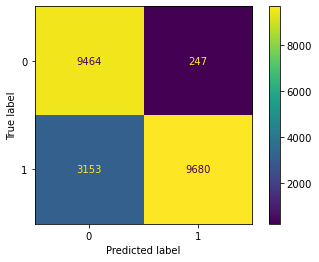

['Catboost_SC.sav']

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
param_grid = { 
    'n_estimators': [1500],
    
    'learning_rate':[0.1,0.2,0.09,0.9,0.01,0.02,1.1],
    #'iterations':[100],
    
    'depth':[7],
    
    
}
cat = CatBoostClassifier(random_state=500)

CV_cat = GridSearchCV(estimator=cat, param_grid=param_grid,\
                      
                       cv=3,verbose=2)

CV_cat.fit(X_train, Y_train)

print(CV_cat.best_params_)
print(CV_cat.cv_results_['mean_test_score'])
print(sum(CV_cat.cv_results_['mean_test_score'])/ len(CV_cat.cv_results_['mean_test_score']))


Y_predict = CV_cat.predict(X_test)

#ada=AdaBoostClassifier(n_estimators=72,algorithm='SAMME',learning_rate=1.1)
#ada.fit(X_train,Y_train)
#Y_pred_train=ada.predict(X_train)

    
  # test the model So give on known data (X_test)
    #model_dt_test, Y_test
    
#Y_predict = ada.predict(model_dt_test)
f1,prec,recall, acc = eval_model(Y_test,Y_predict)

print("F1 Score :",f1)
print("Precision : ",prec)
print("Recall : ",recall)
print("Accuracy : ",acc)
plot_confusion_matrix(CV_cat, X_test, Y_test)  
plt.show()
joblib.dump(CV_cat,"Catboost_SC.sav")

## Finetuning XGBOOSt

Fitting 3 folds for each of 90 candidates, totalling 270 fits
[09:50:36] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=100; total time=   5.4s
[09:50:41] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=100; total time=   4.9s
[09:50:46] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=100; total time=   4.9s
[09:50:51] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=150; total time=   7.3s
[09:50:59] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=150; total time=   7.3s
[09:51:06] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=150; total time=   7.7s
[09:51:14] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=100; total time=   5.5s
[09:51:19] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=100; total time=   5.3s
[09:51:25] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=100; total time=   5.5s
[09:51:30] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=150; total time=   8.1s
[09:51:39] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=150; total time=   8.0s
[09:51:47] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=150; total time=   8.2s
[09:51:55] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=8, n_estimators=100; total time=   6.1s
[09:52:01] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=8, n_estimators=100; total time=   5.9s
[09:52:07] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=8, n_estimators=100; total time=   6.0s
[09:52:13] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=8, n_estimators=150; total time=   9.1s
[09:52:22] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=8, n_estimators=150; total time=   9.0s
[09:52:32] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=8, n_estimators=150; total time=   8.8s
[09:52:40] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=100; total time=   6.6s
[09:52:47] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=100; total time=   6.6s
[09:52:54] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=100; total time=   6.6s
[09:53:01] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=150; total time=   9.8s
[09:53:10] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=150; total time=   9.7s
[09:53:20] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=150; total time=   9.5s
[09:53:30] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.01, max_depth=10, n_estimators=100; total time=   7.1s
[09:53:37] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.01, max_depth=10, n_estimators=100; total time=   6.9s
[09:53:44] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.01, max_depth=10, n_estimators=100; total time=   7.3s
[09:53:51] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



[CV] END .learning_rate=0.01, max_depth=10, n_estimators=150; total time=  11.4s
[09:54:03] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.01, max_depth=10, n_estimators=150; total time=  10.7s
[09:54:14] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.01, max_depth=10, n_estimators=150; total time=  10.9s
[09:54:25] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.001, max_depth=6, n_estimators=100; total time=   5.0s
[09:54:30] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.001, max_depth=6, n_estimators=100; total time=   4.8s
[09:54:35] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.001, max_depth=6, n_estimators=100; total time=   4.8s
[09:54:40] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.001, max_depth=6, n_estimators=150; total time=   7.2s
[09:54:47] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.001, max_depth=6, n_estimators=150; total time=   7.4s
[09:54:55] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.001, max_depth=6, n_estimators=150; total time=   8.1s
[09:55:03] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.001, max_depth=7, n_estimators=100; total time=   6.2s
[09:55:09] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.001, max_depth=7, n_estimators=100; total time=   6.1s
[09:55:15] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.001, max_depth=7, n_estimators=100; total time=   5.7s
[09:55:21] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.001, max_depth=7, n_estimators=150; total time=  10.1s


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[09:55:31] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .learning_rate=0.001, max_depth=7, n_estimators=150; total time=  14.1s
[09:55:46] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.001, max_depth=7, n_estimators=150; total time=  12.8s


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[09:55:58] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .learning_rate=0.001, max_depth=8, n_estimators=100; total time=   7.3s
[09:56:06] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.001, max_depth=8, n_estimators=100; total time=   6.4s
[09:56:12] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.001, max_depth=8, n_estimators=100; total time=   5.9s
[09:56:18] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.001, max_depth=8, n_estimators=150; total time=  11.7s
[09:56:30] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.001, max_depth=8, n_estimators=150; total time=  10.0s
[09:56:40] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.001, max_depth=8, n_estimators=150; total time=   9.7s


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[09:56:50] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .learning_rate=0.001, max_depth=9, n_estimators=100; total time=  10.0s
[09:57:00] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.001, max_depth=9, n_estimators=100; total time=   7.1s
[09:57:07] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.001, max_depth=9, n_estimators=100; total time=   6.5s
[09:57:14] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.001, max_depth=9, n_estimators=150; total time=  11.4s
[09:57:25] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.001, max_depth=9, n_estimators=150; total time=  10.0s
[09:57:35] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.001, max_depth=9, n_estimators=150; total time=  10.0s


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[09:57:46] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.001, max_depth=10, n_estimators=100; total time=   7.8s
[09:57:53] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.001, max_depth=10, n_estimators=100; total time=   7.1s
[09:58:01] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.001, max_depth=10, n_estimators=100; total time=   9.2s
[09:58:10] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.001, max_depth=10, n_estimators=150; total time=  12.5s


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[09:58:23] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.001, max_depth=10, n_estimators=150; total time=  12.1s
[09:58:35] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.001, max_depth=10, n_estimators=150; total time=   9.5s
[09:58:44] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.009, max_depth=6, n_estimators=100; total time=   4.5s
[09:58:49] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.009, max_depth=6, n_estimators=100; total time=   4.9s


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[09:58:54] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .learning_rate=0.009, max_depth=6, n_estimators=100; total time=   6.3s


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[09:59:00] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .learning_rate=0.009, max_depth=6, n_estimators=150; total time=  10.0s
[09:59:10] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.009, max_depth=6, n_estimators=150; total time=   7.3s
[09:59:18] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.009, max_depth=6, n_estimators=150; total time=   7.5s
[09:59:25] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.009, max_depth=7, n_estimators=100; total time=   5.6s
[09:59:31] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.009, max_depth=7, n_estimators=100; total time=   5.6s
[09:59:37] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.009, max_depth=7, n_estimators=100; total time=   5.7s
[09:59:43] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.009, max_depth=7, n_estimators=150; total time=   8.8s
[09:59:52] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.009, max_depth=7, n_estimators=150; total time=   8.5s
[10:00:00] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.009, max_depth=7, n_estimators=150; total time=   8.2s
[10:00:09] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.009, max_depth=8, n_estimators=100; total time=   6.2s
[10:00:15] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.009, max_depth=8, n_estimators=100; total time=   6.4s
[10:00:21] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.009, max_depth=8, n_estimators=100; total time=   7.3s
[10:00:29] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.009, max_depth=8, n_estimators=150; total time=   9.8s
[10:00:39] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.009, max_depth=8, n_estimators=150; total time=   9.8s
[10:00:49] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.009, max_depth=8, n_estimators=150; total time=   9.8s
[10:00:58] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.009, max_depth=9, n_estimators=100; total time=   6.8s
[10:01:05] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.009, max_depth=9, n_estimators=100; total time=   6.7s
[10:01:12] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.009, max_depth=9, n_estimators=100; total time=   7.1s


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[10:01:19] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .learning_rate=0.009, max_depth=9, n_estimators=150; total time=  11.4s
[10:01:31] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.009, max_depth=9, n_estimators=150; total time=  10.3s
[10:01:41] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.009, max_depth=9, n_estimators=150; total time=  10.4s
[10:01:52] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.009, max_depth=10, n_estimators=100; total time=   7.5s


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[10:02:00] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.009, max_depth=10, n_estimators=100; total time=  12.8s


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[10:02:12] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.009, max_depth=10, n_estimators=100; total time=  10.7s


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[10:02:23] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.009, max_depth=10, n_estimators=150; total time=  17.4s


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[10:02:41] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.009, max_depth=10, n_estimators=150; total time=  15.0s
[10:02:56] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



[CV] END learning_rate=0.009, max_depth=10, n_estimators=150; total time=  16.8s


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[10:03:13] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=100; total time=  14.5s


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[10:03:27] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=100; total time=   6.4s
[10:03:34] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=100; total time=   5.0s
[10:03:39] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=150; total time=   7.9s
[10:03:47] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=150; total time=   7.3s
[10:03:54] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=150; total time=   8.3s
[10:04:03] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=100; total time=   5.4s
[10:04:08] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=100; total time=   5.7s
[10:04:14] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=100; total time=   6.1s
[10:04:20] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=150; total time=  11.6s
[10:04:32] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=150; total time=   9.1s
[10:04:41] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=150; total time=   8.6s
[10:04:50] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=100; total time=   6.2s
[10:04:56] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=100; total time=   6.3s
[10:05:02] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=100; total time=   6.2s
[10:05:09] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=150; total time=  10.5s


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[10:05:19] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=150; total time=  10.1s
[10:05:30] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=150; total time=   8.8s
[10:05:38] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=100; total time=   6.6s
[10:05:45] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=100; total time=   6.4s
[10:05:52] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=100; total time=   6.2s
[10:05:58] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=150; total time=   9.8s
[10:06:08] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=150; total time=  10.3s


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[10:06:18] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=150; total time=  10.1s
[10:06:28] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=100; total time=   6.7s
[10:06:35] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=100; total time=   6.8s
[10:06:42] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=100; total time=   7.1s
[10:06:49] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=150; total time=   9.9s
[10:06:59] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=150; total time=  10.0s
[10:07:09] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=150; total time=  10.0s
[10:07:20] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.2, max_depth=6, n_estimators=100; total time=   4.6s
[10:07:24] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.2, max_depth=6, n_estimators=100; total time=   4.5s
[10:07:29] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.2, max_depth=6, n_estimators=100; total time=   3.9s
[10:07:33] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.2, max_depth=6, n_estimators=150; total time=   6.5s
[10:07:40] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.2, max_depth=6, n_estimators=150; total time=   6.9s
[10:07:47] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.2, max_depth=6, n_estimators=150; total time=   6.9s
[10:07:54] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=100; total time=   5.2s
[10:07:59] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=100; total time=   5.3s
[10:08:04] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=100; total time=   5.9s
[10:08:10] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=150; total time=   7.9s
[10:08:18] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=150; total time=   8.1s
[10:08:27] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=150; total time=   7.8s
[10:08:35] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.2, max_depth=8, n_estimators=100; total time=   5.8s
[10:08:40] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.2, max_depth=8, n_estimators=100; total time=   5.8s
[10:08:46] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.2, max_depth=8, n_estimators=100; total time=   5.8s
[10:08:52] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.2, max_depth=8, n_estimators=150; total time=   8.5s
[10:09:01] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.2, max_depth=8, n_estimators=150; total time=   8.4s
[10:09:09] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.2, max_depth=8, n_estimators=150; total time=   8.8s
[10:09:18] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.2, max_depth=9, n_estimators=100; total time=   6.4s
[10:09:25] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.2, max_depth=9, n_estimators=100; total time=   6.5s
[10:09:31] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.2, max_depth=9, n_estimators=100; total time=   6.1s
[10:09:38] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.2, max_depth=9, n_estimators=150; total time=   9.0s
[10:09:47] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.2, max_depth=9, n_estimators=150; total time=   8.8s
[10:09:56] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.2, max_depth=9, n_estimators=150; total time=   9.5s
[10:10:05] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.2, max_depth=10, n_estimators=100; total time=   6.5s
[10:10:12] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.2, max_depth=10, n_estimators=100; total time=   6.4s
[10:10:18] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.2, max_depth=10, n_estimators=100; total time=   6.9s
[10:10:25] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.2, max_depth=10, n_estimators=150; total time=   9.5s
[10:10:35] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.2, max_depth=10, n_estimators=150; total time=   9.3s
[10:10:44] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.2, max_depth=10, n_estimators=150; total time=   9.2s
[10:10:54] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=6, n_estimators=100; total time=   4.8s
[10:10:59] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=6, n_estimators=100; total time=   4.8s
[10:11:03] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=6, n_estimators=100; total time=   4.8s
[10:11:08] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=6, n_estimators=150; total time=   6.9s
[10:11:15] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=6, n_estimators=150; total time=   7.0s
[10:11:22] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=6, n_estimators=150; total time=   7.1s
[10:11:30] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=7, n_estimators=100; total time=   5.3s
[10:11:35] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=7, n_estimators=100; total time=   5.3s
[10:11:40] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=7, n_estimators=100; total time=   5.4s
[10:11:46] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=7, n_estimators=150; total time=   7.8s
[10:11:54] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=7, n_estimators=150; total time=   8.0s
[10:12:02] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=7, n_estimators=150; total time=   8.5s
[10:12:10] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=8, n_estimators=100; total time=   6.0s
[10:12:17] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=8, n_estimators=100; total time=   5.9s
[10:12:23] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=8, n_estimators=100; total time=   6.3s
[10:12:29] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=8, n_estimators=150; total time=   8.7s
[10:12:38] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=8, n_estimators=150; total time=   8.5s
[10:12:46] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=8, n_estimators=150; total time=   8.6s
[10:12:55] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=9, n_estimators=100; total time=   6.5s
[10:13:02] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=9, n_estimators=100; total time=   6.4s
[10:13:08] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=9, n_estimators=100; total time=   6.3s
[10:13:15] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=9, n_estimators=150; total time=   9.5s
[10:13:24] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=9, n_estimators=150; total time=   9.6s
[10:13:34] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=9, n_estimators=150; total time=   9.3s
[10:13:43] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



[CV] END .learning_rate=0.09, max_depth=10, n_estimators=100; total time=   7.0s
[10:13:50] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.09, max_depth=10, n_estimators=100; total time=   6.8s
[10:13:57] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.09, max_depth=10, n_estimators=100; total time=   6.8s
[10:14:04] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.09, max_depth=10, n_estimators=150; total time=   9.9s
[10:14:14] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.09, max_depth=10, n_estimators=150; total time=  10.0s
[10:14:24] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.09, max_depth=10, n_estimators=150; total time=  10.0s
[10:14:34] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.9, max_depth=6, n_estimators=100; total time=   4.3s
[10:14:39] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.9, max_depth=6, n_estimators=100; total time=   4.3s
[10:14:43] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.9, max_depth=6, n_estimators=100; total time=   4.7s
[10:14:48] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.9, max_depth=6, n_estimators=150; total time=   6.3s
[10:14:54] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.9, max_depth=6, n_estimators=150; total time=   6.3s
[10:15:01] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.9, max_depth=6, n_estimators=150; total time=   6.3s
[10:15:07] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.9, max_depth=7, n_estimators=100; total time=   4.9s
[10:15:12] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.9, max_depth=7, n_estimators=100; total time=   4.7s
[10:15:17] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.9, max_depth=7, n_estimators=100; total time=   4.8s
[10:15:22] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.9, max_depth=7, n_estimators=150; total time=   6.9s
[10:15:29] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.9, max_depth=7, n_estimators=150; total time=   6.9s
[10:15:36] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.9, max_depth=7, n_estimators=150; total time=   6.9s
[10:15:43] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.9, max_depth=8, n_estimators=100; total time=   5.5s
[10:15:48] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.9, max_depth=8, n_estimators=100; total time=   5.2s
[10:15:54] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.9, max_depth=8, n_estimators=100; total time=   5.1s
[10:15:59] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.9, max_depth=8, n_estimators=150; total time=   7.7s
[10:16:07] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.9, max_depth=8, n_estimators=150; total time=   7.2s
[10:16:14] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.9, max_depth=8, n_estimators=150; total time=   7.3s
[10:16:21] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.9, max_depth=9, n_estimators=100; total time=   5.8s
[10:16:27] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.9, max_depth=9, n_estimators=100; total time=   5.2s
[10:16:33] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.9, max_depth=9, n_estimators=100; total time=   5.2s
[10:16:38] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.9, max_depth=9, n_estimators=150; total time=   7.6s
[10:16:46] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.9, max_depth=9, n_estimators=150; total time=   7.3s
[10:16:53] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.9, max_depth=9, n_estimators=150; total time=  11.0s


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[10:17:04] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ..learning_rate=0.9, max_depth=10, n_estimators=100; total time=   8.1s
[10:17:12] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



[CV] END ..learning_rate=0.9, max_depth=10, n_estimators=100; total time=  10.4s


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[10:17:23] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ..learning_rate=0.9, max_depth=10, n_estimators=100; total time=   7.7s
[10:17:31] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



[CV] END ..learning_rate=0.9, max_depth=10, n_estimators=150; total time=   8.1s
[10:17:39] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.9, max_depth=10, n_estimators=150; total time=   8.7s
[10:17:48] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.9, max_depth=10, n_estimators=150; total time=   8.3s
[10:17:56] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.02, max_depth=6, n_estimators=100; total time=   5.5s
[10:18:02] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.02, max_depth=6, n_estimators=100; total time=   6.0s
[10:18:08] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.02, max_depth=6, n_estimators=100; total time=   6.7s
[10:18:15] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.02, max_depth=6, n_estimators=150; total time=   8.1s
[10:18:23] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.02, max_depth=6, n_estimators=150; total time=   8.6s
[10:18:31] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.02, max_depth=6, n_estimators=150; total time=   7.6s
[10:18:39] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.02, max_depth=7, n_estimators=100; total time=   5.9s
[10:18:45] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.02, max_depth=7, n_estimators=100; total time=   5.7s
[10:18:51] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.02, max_depth=7, n_estimators=100; total time=   5.8s
[10:18:57] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.02, max_depth=7, n_estimators=150; total time=   8.7s
[10:19:06] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.02, max_depth=7, n_estimators=150; total time=   8.5s
[10:19:14] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.02, max_depth=7, n_estimators=150; total time=   8.7s
[10:19:23] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.02, max_depth=8, n_estimators=100; total time=   7.8s


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[10:19:31] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ..learning_rate=0.02, max_depth=8, n_estimators=100; total time=   7.1s
[10:19:38] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.02, max_depth=8, n_estimators=100; total time=   6.5s
[10:19:45] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.02, max_depth=8, n_estimators=150; total time=   9.5s
[10:19:54] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.02, max_depth=8, n_estimators=150; total time=   9.3s
[10:20:04] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.02, max_depth=8, n_estimators=150; total time=   9.6s
[10:20:14] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.02, max_depth=9, n_estimators=100; total time=   7.0s
[10:20:21] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.02, max_depth=9, n_estimators=100; total time=   7.6s
[10:20:28] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.02, max_depth=9, n_estimators=100; total time=   7.2s
[10:20:36] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.02, max_depth=9, n_estimators=150; total time=  10.2s
[10:20:46] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.02, max_depth=9, n_estimators=150; total time=  10.4s
[10:20:56] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.02, max_depth=9, n_estimators=150; total time=  10.0s
[10:21:06] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.02, max_depth=10, n_estimators=100; total time=   7.8s
[10:21:14] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.02, max_depth=10, n_estimators=100; total time=   7.4s
[10:21:22] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.02, max_depth=10, n_estimators=100; total time=   7.3s
[10:21:29] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.02, max_depth=10, n_estimators=150; total time=  11.4s
[10:21:41] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.02, max_depth=10, n_estimators=150; total time=  10.9s
[10:21:52] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.02, max_depth=10, n_estimators=150; total time=  11.0s
[10:22:03] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=1.1, max_depth=6, n_estimators=100; total time=   4.3s
[10:22:07] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=1.1, max_depth=6, n_estimators=100; total time=   4.3s
[10:22:11] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=1.1, max_depth=6, n_estimators=100; total time=   4.3s
[10:22:16] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=1.1, max_depth=6, n_estimators=150; total time=   6.2s
[10:22:22] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=1.1, max_depth=6, n_estimators=150; total time=   6.7s
[10:22:29] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=1.1, max_depth=6, n_estimators=150; total time=   6.2s
[10:22:35] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=1.1, max_depth=7, n_estimators=100; total time=   4.7s
[10:22:40] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=1.1, max_depth=7, n_estimators=100; total time=   4.6s
[10:22:45] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=1.1, max_depth=7, n_estimators=100; total time=   4.6s
[10:22:49] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=1.1, max_depth=7, n_estimators=150; total time=   6.8s
[10:22:56] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=1.1, max_depth=7, n_estimators=150; total time=   6.7s
[10:23:03] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=1.1, max_depth=7, n_estimators=150; total time=   6.7s
[10:23:10] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=1.1, max_depth=8, n_estimators=100; total time=   4.9s
[10:23:15] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=1.1, max_depth=8, n_estimators=100; total time=   4.9s
[10:23:20] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=1.1, max_depth=8, n_estimators=100; total time=   5.0s
[10:23:25] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=1.1, max_depth=8, n_estimators=150; total time=   7.9s
[10:23:33] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=1.1, max_depth=8, n_estimators=150; total time=   7.2s
[10:23:40] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=1.1, max_depth=8, n_estimators=150; total time=   7.1s
[10:23:48] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



[CV] END ...learning_rate=1.1, max_depth=9, n_estimators=100; total time=   5.4s
[10:23:53] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



[CV] END ...learning_rate=1.1, max_depth=9, n_estimators=100; total time=   5.0s
[10:23:58] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=1.1, max_depth=9, n_estimators=100; total time=   5.3s


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[10:24:04] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ...learning_rate=1.1, max_depth=9, n_estimators=150; total time=   7.7s
[10:24:11] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=1.1, max_depth=9, n_estimators=150; total time=   7.5s
[10:24:19] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=1.1, max_depth=9, n_estimators=150; total time=   7.6s
[10:24:27] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=1.1, max_depth=10, n_estimators=100; total time=   5.2s
[10:24:32] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=1.1, max_depth=10, n_estimators=100; total time=   5.1s
[10:24:37] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=1.1, max_depth=10, n_estimators=100; total time=   5.3s
[10:24:43] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=1.1, max_depth=10, n_estimators=150; total time=   7.3s
[10:24:50] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=1.1, max_depth=10, n_estimators=150; total time=   7.1s
[10:24:57] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=1.1, max_depth=10, n_estimators=150; total time=   7.4s
[10:25:05] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150}
[0.99438769 0.99464965 0.99587213 0.99635636 0.99710255 0.99783287
 0.99798369 0.99823772 0.99812658 0.99849174 0.99412573 0.99411779
 0.99426861 0.99426861 0.99629286 0.99630873 0.99713431 0.99728513
 0.99775349 0.9977773  0.99438769 0.99449088 0.99579275 0.99637224
 0.99676915 0.99776143 0.99795988 0.99820596 0.9980472  0.99839648
 0.9989204  0.99907917 0.99910298 0.99918236 0.99919824 0.99922206
 0.99919824 0.99922206 0.99919824 0.99915855 0.99911886 0.99918236
 0.99921412 0.99922999 0.99915855 0.99919824 0.99919824 0.99920618
 0.99915855 0.99919824 0.99879339 0.99901566 0.99906329 0.99913474
 0.99920618 0.99919824 0.99919824 0.99919824 0.99915855 0.99916649
 0.99911886 0.99915061 0.99911886 0.9991268  0.99911886 0.99915855
 0.9991268  0.99913474 0.9991903  0.99918236 0.9960309  0.99765823
 0.99751534 0.99809483 0.99800751 0.99835679 0.9983171  0.99868226
 0.99872195 0.99876958 0.99911092 0.99910298 0.99920618 0.99918236
 0

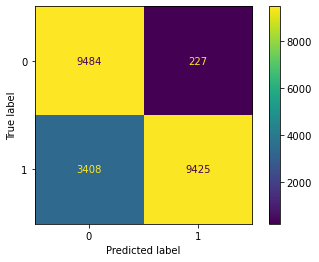

['XGBOOST_FineTuned_SC.sav']

In [50]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = { 
    'n_estimators': [100,150],
    'learning_rate':[0.01,0.001,0.009,0.1,0.2,0.09,0.9,0.02,1.1],
    'max_depth':[6,7,8,9,10]
}
xgb = XGBClassifier(random_state=500)

CV_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid,\
                      
                       cv=3,verbose=2)

CV_xgb.fit(X_train, Y_train)

print(CV_xgb.best_params_)
print(CV_xgb.cv_results_['mean_test_score'])
print(sum(CV_xgb.cv_results_['mean_test_score'])/ len(CV_xgb.cv_results_['mean_test_score']))


Y_predict = CV_xgb.predict(X_test)

    
# test the model  on data (X_test)
 
f1,prec,recall, acc = eval_model(Y_test,Y_predict)
print("F1 Score :",f1)
print("Precision : ",prec)
print("Recall : ",recall)
print("Accuracy : ",acc)
plot_confusion_matrix(CV_xgb,X_test, Y_test)  
plt.show()
joblib.dump(CV_xgb,"XGBOOST_FineTuned_SC.sav")

## Fine Tuning GradientBoost Classifier

Fitting 3 folds for each of 30 candidates, totalling 90 fits


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=100; total time=  28.6s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=100; total time=  28.2s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=100; total time=  29.8s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=150; total time=  45.1s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=150; total time=  38.5s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=150; total time=  36.8s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=8, n_estimators=100; total time=  28.7s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=8, n_estimators=100; total time=  29.3s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=8, n_estimators=100; total time=  26.7s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=8, n_estimators=150; total time=  42.5s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=8, n_estimators=150; total time=  42.5s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=8, n_estimators=150; total time=  38.3s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=100; total time=  29.8s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=100; total time=  31.7s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=100; total time=  28.7s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=150; total time=  40.8s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=150; total time=  47.4s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=150; total time=  42.0s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.001, max_depth=7, n_estimators=100; total time=  25.0s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.001, max_depth=7, n_estimators=100; total time=  25.1s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.001, max_depth=7, n_estimators=100; total time=  24.4s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.001, max_depth=7, n_estimators=150; total time=  41.3s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.001, max_depth=7, n_estimators=150; total time=  39.6s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.001, max_depth=7, n_estimators=150; total time=  39.4s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.001, max_depth=8, n_estimators=100; total time=  30.2s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.001, max_depth=8, n_estimators=100; total time=  30.2s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.001, max_depth=8, n_estimators=100; total time=  25.6s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.001, max_depth=8, n_estimators=150; total time=  48.6s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.001, max_depth=8, n_estimators=150; total time=  54.5s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.001, max_depth=8, n_estimators=150; total time=  51.1s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.001, max_depth=9, n_estimators=100; total time=  37.8s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.001, max_depth=9, n_estimators=100; total time=  39.8s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.001, max_depth=9, n_estimators=100; total time=  34.8s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.001, max_depth=9, n_estimators=150; total time=  54.2s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.001, max_depth=9, n_estimators=150; total time=  57.5s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.001, max_depth=9, n_estimators=150; total time=  50.3s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.009, max_depth=7, n_estimators=100; total time=  30.8s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.009, max_depth=7, n_estimators=100; total time=  31.2s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.009, max_depth=7, n_estimators=100; total time=  29.9s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.009, max_depth=7, n_estimators=150; total time=  45.9s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.009, max_depth=7, n_estimators=150; total time=  42.3s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.009, max_depth=7, n_estimators=150; total time=  44.0s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.009, max_depth=8, n_estimators=100; total time=  33.9s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.009, max_depth=8, n_estimators=100; total time=  34.2s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.009, max_depth=8, n_estimators=100; total time=  31.6s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.009, max_depth=8, n_estimators=150; total time=  51.0s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.009, max_depth=8, n_estimators=150; total time=  52.1s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.009, max_depth=8, n_estimators=150; total time=  49.1s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.009, max_depth=9, n_estimators=100; total time=  36.8s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.009, max_depth=9, n_estimators=100; total time=  39.4s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.009, max_depth=9, n_estimators=100; total time=  35.0s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.009, max_depth=9, n_estimators=150; total time=  55.5s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.009, max_depth=9, n_estimators=150; total time=  57.6s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END .learning_rate=0.009, max_depth=9, n_estimators=150; total time=  53.0s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=100; total time=  32.4s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=100; total time=  32.8s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=100; total time=  33.1s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=150; total time=  51.5s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=150; total time=  50.7s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=150; total time=  48.6s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=100; total time=  35.1s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=100; total time=  37.2s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=100; total time=  37.5s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=150; total time= 1.0min


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=150; total time= 1.1min


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=150; total time= 1.0min


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=100; total time=  45.8s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=100; total time=  43.0s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=100; total time=  38.8s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=150; total time=  58.7s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=150; total time= 1.1min


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=150; total time= 1.0min


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=7, n_estimators=100; total time=  31.8s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=7, n_estimators=100; total time=  31.6s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=7, n_estimators=100; total time=  31.5s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=7, n_estimators=150; total time=  48.5s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=7, n_estimators=150; total time=  49.2s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=7, n_estimators=150; total time=  49.8s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=8, n_estimators=100; total time=  41.8s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=8, n_estimators=100; total time=  42.4s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=8, n_estimators=100; total time=  42.5s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=8, n_estimators=150; total time= 1.1min


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=8, n_estimators=150; total time= 1.0min


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=8, n_estimators=150; total time= 1.1min


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=9, n_estimators=100; total time=  47.5s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=9, n_estimators=100; total time=  47.2s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=9, n_estimators=100; total time=  45.7s


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=9, n_estimators=150; total time= 1.2min


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=9, n_estimators=150; total time= 1.3min


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END ..learning_rate=0.09, max_depth=9, n_estimators=150; total time= 1.2min


C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 150}
[0.99606265 0.99627698 0.99651513 0.9966342  0.99807895 0.99834885
 0.99367325 0.99382407 0.99509419 0.99596739 0.9972375  0.99739627
 0.99578481 0.99625317 0.99652306 0.99669771 0.99811864 0.99830122
 0.99915061 0.99920618 0.99921412 0.9992935  0.9991268  0.99919824
 0.99914267 0.99921412 0.99920618 0.99920618 0.99920618 0.99920618]
0.99757196647959
F1 Score : 0.8398318211993804
Precision :  0.9719319811514034
Recall :  0.7393438790617938
Accuracy :  0.8394694819020582


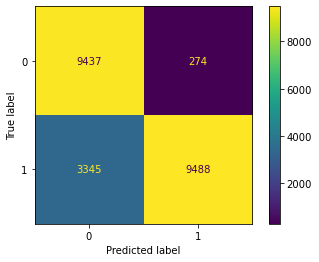

['GradBOOST_FineTuned_SC.sav']

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


param_grid = { 
    'n_estimators': [100,150],
    'learning_rate':[0.01,0.001,0.009,0.1,0.09],
    'max_depth':[7,8,9]
}
gb = GradientBoostingClassifier(random_state=500)

CV_gb = GridSearchCV(estimator=gb, param_grid=param_grid,\
                      
                       cv=3,verbose=2)

CV_gb.fit(X_train, Y_train)

print(CV_gb.best_params_)
print(CV_gb.cv_results_['mean_test_score'])
print(sum(CV_gb.cv_results_['mean_test_score'])/ len(CV_gb.cv_results_['mean_test_score']))


Y_predict = CV_gb.predict(X_test)

#test the model on data X_test

f1,prec,recall, acc = eval_model(Y_test,Y_predict)
print("F1 Score :",f1)
print("Precision : ",prec)
print("Recall : ",recall)
print("Accuracy : ",acc)

#Plotting Confusion Matrix
plot_confusion_matrix(CV_gb, X_test, Y_test)  
plt.show()
joblib.dump(CV_gb,"GradBOOST_FineTuned_SC.sav")

# BASIC FEATURES OF EACH NETWORK CONNECTION Column
##### 1 Duration: Length of time duration of the connection
##### 2 Protocol_type: Protocol used in the connection
##### 3 Service: Destination network service used
##### 4 Flag: Status of the connection – Normal or Error
##### 5 Src_bytes: Number of data bytes transferred from source to destination in single connection
##### 6 Dst_bytes: Number of data bytes transferred from destination to source in single connection
##### 7 Land: if source and destination IP addresses and port numbers are equal then, this variable takes value 1
else 0
##### 8 Wrong_fragment: Total number of wrong fragments in this connection
##### 9 Urgent: Number of urgent packets in this connection. Urgent packets are packets with the urgent bit
Activated





# CONTENT RELATED FEATURES OF EACH NETWORK Columns
##### 10 Hot: Number of „hot‟ indicators in the content such as: entering a system directory, creating programs
and executing programs
##### 11 Num_failed _logins: Count of failed login attempts
##### 12 Logged_in Login Status: 1 if successfully logged in; 0 otherwise
##### 13 Num_compromised: Number of ``compromised' ' conditions
##### 14 Root_shell: 1 if root shell is obtained; 0 otherwise
##### 15 Su_attempted: 1 if ``su root'' command attempted or used; 0 otherwise
##### 16 Num_root: Number of ``root'' accesses or number of operations performed as a root in the connection
##### 17 Num_file_creations: Number of file creation operations in the connection
##### 18 Num_shells: Number of shell prompts
##### 19 Num_access_files: Number of operations on access control files
##### 20 Num_outbound_cmds: Number of outbound commands in an ftp session
##### 21 Is_hot_login: 1 if the login belongs to the ``hot'' list i.e., root or admin; else 0
##### 22 Is_guest_login: 1 if the login is a ``guest'' login; 0 otherwise



# TIME RELATED TRAFFIC FEATURES OF EACH NETWORK CONNECTION VECTOR
##### 23 Count: Number of connections to the same destination host as the current connection in the past two
seconds
##### 24 Srv_count: Number of connections to the same service (port number) as the current connection in th e
past two seconds
##### 25 Serror_rate: The percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the
connections aggregated in count (23)
##### 26 Srv_serror_rate: The percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among
the connections aggregated in srv_count (24)
##### 27 Rerror_rate: The percentage of connections that have activated the flag (4) REJ, among the connections
aggregated in count (23)
##### 28 Srv_rerror_rate: The percentage of connections that have activated the flag (4) REJ, among the
connections aggregated in srv_count (24)
##### 29 Same_srv_rate: The percentage of connections that were to the same service, among the connections
aggregated in count (23)
##### 30 Diff_srv_rate: The percentage of connections that were to different services, among the connections
aggregated in count (23)
##### 31 Srv_diff_host_ rate: The percentage of connections that were to different destination machines among
the connections aggregated in srv_count (24)
